# Parameter guide for fingerprinting
The user uploads their data and sets the target attribute.

Our process gives insights of:
- feature importance for the specified target
- robustness of a fingerprint per se (extraction rate)
- utility loss by change in mean and variance (todo: add more parameters)
- utility loss by loss in performance on ML classifiers 
- robustness against classical attacks 
for different gamma values 

In [1]:
import os
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [2]:
import pickle

## 0. Upload the data 

In [3]:
data_path = "C:/Users/tsarcevic/PycharmProjects/fingerprinting-toolbox/datasets/adult_full.csv"
target = ['income']

In [4]:
from parameter_guidelines.guidelines import *

In [5]:
# todo: get_full_insights <- this fingerprints the 100 datasets and compresses them later together with metadata

In [6]:
#get_insights(data=data_path, target=target, primary_key_attribute=primary_key)

## 1. Robustness

In [5]:
data = pd.read_csv('datasets/adult.csv', na_values='?')
# # to focus on real stuff, let's ignore missing values
data = data.dropna()

#data = Adult().preprocessed()

In [8]:
xi = 1
fplen = 32
numbuyers = 100
gammae = [1,2,3,4,5,6,10,12,15,18,20,25,30,35,40,50,60,70,80,100,200]

In [11]:
# -------------------------------------------------#
            # ROBUSTNESS EVALUATION #
# ------------------------------------------------ #
def robustness_evaluation(attack, data, attack_string, gammae, attack_granularity=0.05, n_experiments=100, confidence_rate=0.9, 
                          target=None):
    try:
        target = data.get_target_attribute()
    except AttributeError:
        pass
    
    xi = 1
    fplen = 32
    numbuyers = 100
    
    if attack_string == 'vertical':
        file_string = 'robustness_{}_universal_c{}_e{}.pickle'.format(attack_string,
                                                                                format(confidence_rate,".2f")[-2:], 
                                                                                n_experiments)
    else:
        file_string = 'robustness_{}_universal_c{}_ag{}_e{}.pickle'.format(attack_string,
                                                                                    format(confidence_rate,".2f")[-2:], 
                                                                                    format(attack_granularity,".2f")[-2:], 
                                                                                    n_experiments)
    # check if results exist
    # ---------------------- #
    if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
        with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            resutls = pickle.load(infile)
    else:
        resutls = {}
    gammae_new = []
    for gamma in gammae:
        if gamma not in resutls.keys():
            gammae_new.append(gamma)
            print('Updating results with gamma={}'.format(gamma))
    # ---------------------- #

    for gamma in gammae_new:
        scheme = Universal(gamma=gamma, 
                            xi=xi, 
                            fingerprint_bit_length=fplen, 
                            number_of_recipients=numbuyers)
        # from how much remaining data can the fingerprint still be extracted?
        remaining = robustness(attack, scheme, exclude=[target], 
                                       attack_granularity=attack_granularity,
                                      n_experiments=n_experiments, 
                                      confidence_rate=confidence_rate)
        resutls[gamma] = remaining
    resutls =  dict(sorted(resutls.items()))
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(resutls, outfile)

### 1.1. Horizontal subset attack

In [12]:
attack = HorizontalSubsetAttack()

In [13]:
robustness_evaluation(attack, data, 'horizontal', gammae, confidence_rate=0.95, n_experiments=100, target='income')

Updating results with gamma=1
Updating results with gamma=2
Updating results with gamma=3
Updating results with gamma=4
Updating results with gamma=5
Updating results with gamma=6
Updating results with gamma=10
Updating results with gamma=12
Updating results with gamma=15
Updating results with gamma=18
Updating results with gamma=20
Updating results with gamma=25
Updating results with gamma=30
Updating results with gamma=35
Updating results with gamma=40
Updating results with gamma=50
Updating results with gamma=60
Updating results with gamma=70
Updating results with gamma=80
Updating results with gamma=100
Updating results with gamma=200
Subset attack runtime on 2261 out of 45222 entries: 0.008173704147338867 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss

Subset attack runtime on 2261 out of 45222 entries: 0.006497859954833984 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 68],
 [48, 0],
 [0, 71],
 [0, 71],
 [70, 0],
 [0, 67],
 [0, 85],
 [72, 0],
 [0, 63],
 [0, 68],
 [0, 75],
 [61, 0],
 [0, 87],
 [0, 69],
 [67, 0],
 [0, 85],
 [0, 85],
 [0, 56],
 [0, 66],
 [67, 0],
 [82, 0],
 [0, 56],
 [62, 0],
 [0, 70],
 [64, 0],
 [0, 67],
 [0, 71],
 [0, 91],
 [0, 72],
 [82, 0],
 [77, 0],
 [66, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.008008956909179688 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.007006168365478516 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[71, 0],
 [0, 74],
 [74, 0],
 [0, 71],
 [0, 68],
 [0, 61],
 [80, 0],
 [0, 73],
 [0, 80],
 [0, 66],
 [74, 0],
 [75, 0],
 [0, 81],
 [78, 0],
 [69, 0],
 [0, 59],
 [0, 65],
 [64, 0],
 [87, 0],
 [0, 70],
 [70, 0],
 [68, 0],
 [0, 79],
 [72, 0],
 [71, 0],
 [65, 0],
 [56, 0],
 [0, 67],
 [62, 0],
 [61, 0],
 [0, 76],
 [0, 74]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.008038520812988281 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.0059947967529296875 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[77, 0],
 [59, 0],
 [0, 72],
 [70, 0],
 [74, 0],
 [79, 0],
 [66, 0],
 [0, 64],
 [0, 73],
 [0, 53],
 [66, 0],
 [0, 70],
 [0, 73],
 [0, 78],
 [0, 70],
 [0, 64],
 [74, 0],
 [0, 77],
 [0, 74],
 [63, 0],
 [0, 48],
 [75, 0],
 [0, 80],
 [0, 75],
 [0, 73],
 [82, 0],
 [75, 0],
 [0, 72],
 [0, 60],
 [73, 0],
 [80, 0],
 [0, 72]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005789756774902344 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecti

Subset attack runtime on 2261 out of 45222 entries: 0.0059931278228759766 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 72],
 [67, 0],
 [0, 85],
 [70, 0],
 [61, 0],
 [75, 0],
 [0, 68],
 [78, 0],
 [0, 69],
 [0, 79],
 [69, 0],
 [0, 67],
 [0, 75],
 [57, 0],
 [69, 0],
 [0, 67],
 [0, 67],
 [65, 0],
 [72, 0],
 [83, 0],
 [0, 63],
 [59, 0],
 [0, 77],
 [0, 70],
 [0, 82],
 [65, 0],
 [84, 0],
 [0, 70],
 [66, 0],
 [0, 74],
 [67, 0],
 [69, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00998997688293457 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.0071544647216796875 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[6, 56],
 [5, 64],
 [64, 7],
 [2, 62],
 [64, 2],
 [77, 9],
 [4, 71],
 [63, 9],
 [78, 6],
 [65, 7],
 [4, 58],
 [72, 5],
 [7, 60],
 [7, 69],
 [56, 2],
 [79, 1],
 [61, 5],
 [53, 2],
 [7, 66],
 [60, 1],
 [51, 9],
 [63, 1],
 [86, 6],
 [58, 2],
 [77, 2],
 [67, 7],
 [66, 6],
 [70, 5],
 [3, 63],
 [69, 5],
 [79, 5],
 [61, 4]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00794672966003418 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.006084918975830078 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[71, 0],
 [84, 0],
 [0, 55],
 [64, 0],
 [70, 0],
 [0, 62],
 [0, 66],
 [70, 0],
 [77, 0],
 [0, 75],
 [63, 0],
 [0, 86],
 [79, 0],
 [0, 72],
 [89, 0],
 [0, 66],
 [54, 0],
 [0, 70],
 [68, 0],
 [0, 68],
 [0, 60],
 [0, 75],
 [0, 77],
 [0, 74],
 [68, 0],
 [0, 69],
 [0, 59],
 [82, 0],
 [67, 0],
 [90, 0],
 [0, 66],
 [0, 65]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.013999700546264648 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.0060100555419921875 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 61],
 [77, 0],
 [0, 62],
 [0, 81],
 [0, 80],
 [65, 0],
 [0, 77],
 [0, 72],
 [74, 0],
 [0, 61],
 [59, 0],
 [86, 0],
 [0, 56],
 [65, 0],
 [87, 0],
 [0, 64],
 [58, 0],
 [0, 64],
 [61, 0],
 [0, 78],
 [0, 68],
 [0, 62],
 [0, 82],
 [79, 0],
 [79, 0],
 [0, 84],
 [65, 0],
 [70, 0],
 [0, 59],
 [0, 68],
 [0, 83],
 [74, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00500035285949707 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.005915403366088867 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 64],
 [0, 84],
 [69, 0],
 [79, 0],
 [0, 73],
 [71, 0],
 [0, 78],
 [0, 80],
 [0, 73],
 [0, 73],
 [0, 71],
 [63, 0],
 [0, 72],
 [0, 71],
 [77, 0],
 [0, 72],
 [57, 0],
 [0, 80],
 [0, 72],
 [69, 0],
 [82, 0],
 [0, 77],
 [0, 75],
 [0, 70],
 [68, 0],
 [65, 0],
 [64, 0],
 [0, 58],
 [65, 0],
 [0, 68],
 [62, 0],
 [59, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.004653453826904297 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.005998134613037109 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[78, 0],
 [83, 0],
 [0, 73],
 [59, 0],
 [0, 78],
 [66, 0],
 [0, 84],
 [67, 0],
 [0, 79],
 [0, 66],
 [63, 0],
 [73, 0],
 [79, 0],
 [0, 63],
 [63, 0],
 [0, 64],
 [61, 0],
 [69, 0],
 [0, 67],
 [0, 61],
 [0, 75],
 [0, 73],
 [0, 92],
 [59, 0],
 [57, 0],
 [75, 0],
 [0, 78],
 [0, 92],
 [0, 63],
 [76, 0],
 [73, 0],
 [52, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.007001399993896484 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.006001710891723633 sec.
Start detection algorithm...
	gamma: 1
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 54],
 [63, 0],
 [0, 70],
 [72, 0],
 [71, 0],
 [76, 0],
 [93, 0],
 [0, 62],
 [75, 0],
 [68, 0],
 [67, 0],
 [73, 0],
 [0, 75],
 [75, 0],
 [0, 72],
 [88, 0],
 [0, 86],
 [0, 67],
 [0, 68],
 [73, 0],
 [61, 0],
 [69, 0],
 [0, 73],
 [65, 0],
 [71, 0],
 [0, 77],
 [68, 0],
 [0, 70],
 [0, 58],
 [0, 72],
 [66, 0],
 [63, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005410194396972656 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.007993936538696289 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 36],
 [27, 0],
 [0, 37],
 [0, 28],
 [42, 0],
 [1, 30],
 [2, 53],
 [33, 4],
 [0, 30],
 [1, 34],
 [0, 43],
 [34, 1],
 [0, 30],
 [0, 35],
 [29, 0],
 [1, 40],
 [0, 35],
 [0, 24],
 [1, 31],
 [36, 0],
 [43, 1],
 [1, 32],
 [30, 0],
 [2, 39],
 [24, 0],
 [3, 32],
 [3, 31],
 [0, 50],
 [3, 36],
 [43, 1],
 [37, 0],
 [35, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006003618240356445 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.007949113845825195 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[42, 0],
 [0, 36],
 [46, 0],
 [0, 30],
 [0, 31],
 [0, 36],
 [42, 0],
 [0, 32],
 [0, 30],
 [0, 25],
 [41, 0],
 [35, 0],
 [0, 43],
 [38, 0],
 [33, 0],
 [0, 27],
 [0, 33],
 [39, 0],
 [48, 0],
 [0, 41],
 [34, 0],
 [39, 0],
 [0, 39],
 [39, 0],
 [38, 0],
 [28, 0],
 [31, 0],
 [0, 34],
 [30, 0],
 [31, 0],
 [0, 37],
 [0, 29]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0060002803802490234 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecti

Subset attack runtime on 2261 out of 45222 entries: 0.006005525588989258 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[31, 0],
 [26, 0],
 [0, 32],
 [34, 0],
 [39, 0],
 [44, 0],
 [30, 0],
 [0, 35],
 [0, 34],
 [0, 28],
 [29, 0],
 [0, 37],
 [0, 37],
 [0, 42],
 [0, 34],
 [0, 30],
 [35, 0],
 [0, 47],
 [0, 35],
 [34, 0],
 [0, 18],
 [30, 0],
 [0, 41],
 [0, 25],
 [0, 31],
 [43, 0],
 [43, 0],
 [0, 38],
 [0, 32],
 [34, 0],
 [51, 0],
 [0, 38]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00700688362121582 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting

Subset attack runtime on 2261 out of 45222 entries: 0.006009817123413086 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[2, 34],
 [26, 3],
 [1, 48],
 [36, 2],
 [24, 1],
 [34, 0],
 [1, 32],
 [43, 1],
 [2, 28],
 [4, 37],
 [32, 2],
 [2, 33],
 [1, 34],
 [29, 2],
 [44, 2],
 [2, 25],
 [1, 33],
 [33, 1],
 [39, 2],
 [41, 1],
 [2, 31],
 [33, 0],
 [1, 36],
 [2, 34],
 [4, 40],
 [31, 2],
 [47, 0],
 [2, 33],
 [27, 0],
 [2, 38],
 [41, 3],
 [38, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006137371063232422 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.010001182556152344 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[3, 26],
 [1, 29],
 [33, 5],
 [0, 33],
 [36, 2],
 [33, 4],
 [3, 42],
 [31, 5],
 [35, 2],
 [35, 5],
 [1, 31],
 [31, 4],
 [3, 32],
 [4, 32],
 [21, 1],
 [42, 1],
 [33, 1],
 [29, 1],
 [3, 32],
 [25, 0],
 [19, 4],
 [34, 1],
 [45, 4],
 [36, 2],
 [43, 2],
 [33, 2],
 [32, 3],
 [37, 2],
 [2, 33],
 [32, 3],
 [45, 3],
 [27, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0073223114013671875 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecti

Subset attack runtime on 2261 out of 45222 entries: 0.008965492248535156 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[41, 0],
 [44, 0],
 [0, 31],
 [35, 0],
 [39, 0],
 [0, 31],
 [0, 31],
 [35, 0],
 [40, 0],
 [0, 35],
 [27, 0],
 [0, 33],
 [43, 0],
 [0, 35],
 [39, 0],
 [0, 26],
 [30, 0],
 [0, 26],
 [34, 0],
 [0, 32],
 [0, 40],
 [0, 37],
 [0, 34],
 [0, 39],
 [33, 0],
 [0, 37],
 [0, 28],
 [40, 0],
 [32, 0],
 [46, 0],
 [0, 28],
 [0, 30]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006266355514526367 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.0060384273529052734 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[2, 27],
 [41, 1],
 [1, 31],
 [2, 39],
 [0, 36],
 [34, 1],
 [1, 34],
 [0, 39],
 [46, 0],
 [2, 34],
 [27, 0],
 [42, 2],
 [1, 27],
 [35, 0],
 [32, 1],
 [1, 27],
 [25, 1],
 [1, 39],
 [29, 2],
 [1, 42],
 [0, 30],
 [0, 28],
 [0, 34],
 [48, 1],
 [36, 0],
 [2, 37],
 [30, 0],
 [39, 2],
 [0, 26],
 [0, 37],
 [0, 37],
 [34, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.015685558319091797 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecti

Subset attack runtime on 2261 out of 45222 entries: 0.00600433349609375 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[1, 29],
 [0, 38],
 [34, 0],
 [42, 3],
 [0, 30],
 [32, 0],
 [1, 42],
 [0, 39],
 [3, 32],
 [0, 37],
 [1, 42],
 [28, 1],
 [1, 33],
 [0, 33],
 [45, 1],
 [1, 28],
 [26, 0],
 [1, 32],
 [1, 35],
 [30, 1],
 [37, 0],
 [1, 43],
 [1, 38],
 [2, 33],
 [37, 1],
 [34, 1],
 [34, 1],
 [1, 31],
 [31, 0],
 [0, 36],
 [28, 0],
 [28, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.007051229476928711 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting

Subset attack runtime on 2261 out of 45222 entries: 0.00887751579284668 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[45, 4],
 [35, 1],
 [4, 33],
 [28, 4],
 [3, 32],
 [32, 3],
 [3, 37],
 [38, 1],
 [2, 32],
 [0, 28],
 [25, 2],
 [30, 1],
 [39, 4],
 [1, 31],
 [32, 2],
 [2, 31],
 [29, 2],
 [30, 5],
 [2, 33],
 [1, 26],
 [6, 33],
 [3, 29],
 [3, 50],
 [32, 2],
 [25, 3],
 [37, 1],
 [2, 32],
 [3, 49],
 [1, 29],
 [35, 3],
 [24, 0],
 [26, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.008008718490600586 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting

Subset attack runtime on 2261 out of 45222 entries: 0.00800633430480957 sec.
Start detection algorithm...
	gamma: 2
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 23],
 [28, 0],
 [1, 35],
 [38, 1],
 [37, 0],
 [35, 1],
 [36, 2],
 [0, 31],
 [35, 0],
 [33, 0],
 [35, 1],
 [45, 1],
 [3, 37],
 [35, 1],
 [1, 40],
 [43, 2],
 [0, 43],
 [1, 44],
 [0, 33],
 [35, 1],
 [34, 0],
 [34, 0],
 [0, 35],
 [29, 1],
 [30, 0],
 [2, 33],
 [35, 1],
 [0, 34],
 [0, 28],
 [2, 32],
 [24, 2],
 [34, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.008001089096069336 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting

Subset attack runtime on 2261 out of 45222 entries: 0.007005453109741211 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 27],
 [11, 0],
 [0, 21],
 [0, 27],
 [29, 0],
 [0, 19],
 [0, 34],
 [23, 0],
 [0, 19],
 [0, 23],
 [0, 18],
 [20, 0],
 [0, 33],
 [0, 21],
 [25, 0],
 [0, 27],
 [0, 30],
 [0, 13],
 [0, 20],
 [21, 0],
 [24, 0],
 [0, 23],
 [24, 0],
 [0, 23],
 [22, 0],
 [0, 14],
 [0, 26],
 [0, 39],
 [0, 29],
 [25, 0],
 [24, 0],
 [22, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0070111751556396484 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecti

Subset attack runtime on 2261 out of 45222 entries: 0.007987737655639648 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[21, 0],
 [0, 27],
 [23, 0],
 [0, 22],
 [0, 21],
 [0, 19],
 [22, 0],
 [1, 28],
 [0, 37],
 [0, 26],
 [23, 0],
 [18, 0],
 [0, 30],
 [29, 0],
 [23, 0],
 [0, 20],
 [0, 17],
 [30, 1],
 [32, 1],
 [0, 21],
 [29, 1],
 [22, 0],
 [0, 21],
 [29, 1],
 [33, 0],
 [25, 0],
 [15, 0],
 [0, 24],
 [26, 0],
 [19, 0],
 [1, 25],
 [0, 22]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006003141403198242 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.008001327514648438 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[25, 1],
 [19, 1],
 [0, 22],
 [21, 1],
 [30, 0],
 [22, 2],
 [24, 0],
 [1, 21],
 [0, 17],
 [0, 23],
 [18, 1],
 [1, 24],
 [0, 28],
 [0, 28],
 [0, 23],
 [1, 15],
 [26, 0],
 [0, 23],
 [0, 26],
 [23, 0],
 [0, 14],
 [23, 0],
 [1, 22],
 [0, 32],
 [1, 22],
 [22, 0],
 [29, 0],
 [0, 24],
 [0, 23],
 [24, 0],
 [27, 0],
 [1, 22]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005922794342041016 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.005037069320678711 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 29],
 [18, 0],
 [0, 26],
 [20, 0],
 [19, 0],
 [31, 0],
 [0, 19],
 [21, 0],
 [0, 31],
 [0, 20],
 [22, 0],
 [0, 17],
 [0, 23],
 [23, 0],
 [26, 0],
 [0, 21],
 [0, 30],
 [23, 0],
 [21, 0],
 [23, 0],
 [0, 20],
 [27, 0],
 [0, 25],
 [0, 17],
 [0, 35],
 [28, 0],
 [34, 0],
 [0, 18],
 [17, 0],
 [0, 30],
 [19, 0],
 [24, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00800466537475586 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting

Subset attack runtime on 2261 out of 45222 entries: 0.004006147384643555 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[1, 23],
 [0, 19],
 [22, 1],
 [0, 16],
 [19, 0],
 [28, 2],
 [0, 25],
 [25, 2],
 [33, 0],
 [22, 1],
 [2, 16],
 [26, 0],
 [0, 20],
 [2, 27],
 [27, 0],
 [30, 0],
 [14, 2],
 [23, 0],
 [1, 24],
 [21, 0],
 [13, 0],
 [19, 0],
 [30, 0],
 [21, 1],
 [22, 1],
 [24, 1],
 [25, 1],
 [22, 1],
 [0, 24],
 [17, 1],
 [33, 0],
 [18, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.009988546371459961 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detectin

Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[21, 4],
 [29, 0],
 [1, 18],
 [14, 3],
 [27, 1],
 [2, 21],
 [2, 26],
 [17, 0],
 [21, 2],
 [2, 19],
 [16, 1],
 [0, 38],
 [25, 3],
 [2, 17],
 [29, 2],
 [3, 24],
 [20, 0],
 [0, 25],
 [21, 1],
 [1, 20],
 [1, 25],
 [2, 22],
 [1, 25],
 [1, 19],
 [26, 1],
 [3, 20],
 [1, 19],
 [27, 1],
 [22, 3],
 [32, 3],
 [2, 17],
 [0, 23]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.004767179489135742 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[2, 17],
 [1, 23],
 [23, 1],
 [30, 0],
 [25, 1],
 [35, 0],
 [0, 28],
 [2, 28

Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 20],
 [20, 0],
 [2, 19],
 [0, 38],
 [2, 27],
 [23, 1],
 [0, 20],
 [1, 23],
 [31, 0],
 [1, 18],
 [20, 0],
 [25, 0],
 [0, 18],
 [17, 0],
 [33, 1],
 [0, 21],
 [12, 0],
 [0, 26],
 [23, 2],
 [0, 21],
 [1, 26],
 [1, 24],
 [1, 31],
 [22, 0],
 [28, 0],
 [1, 36],
 [26, 0],
 [17, 1],
 [0, 22],
 [2, 33],
 [0, 34],
 [26, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0035386085510253906 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[23, 0],
 [28, 0],
 [0, 28],
 [0, 33],
 [0, 21],
 [0, 20],
 [21, 0],
 [16, 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[1, 26],
 [0, 22],
 [21, 2],
 [23, 4],
 [1, 21],
 [26, 1],
 [1, 23],
 [0, 28],
 [2, 23],
 [0, 25],
 [3, 21],
 [18, 2],
 [2, 19],
 [2, 23],
 [28, 2],
 [4, 25],
 [18, 0],
 [2, 22],
 [1, 23],
 [20, 3],
 [28, 1],
 [5, 16],
 [0, 20],
 [1, 24],
 [17, 2],
 [17, 2],
 [20, 2],
 [0, 14],
 [16, 0],
 [0, 21],
 [19, 2],
 [13, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.004003286361694336 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'rela

Subset attack runtime on 2261 out of 45222 entries: 0.006000041961669922 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[30, 0],
 [35, 0],
 [0, 29],
 [22, 0],
 [0, 25],
 [21, 0],
 [0, 24],
 [19, 0],
 [0, 20],
 [0, 29],
 [20, 0],
 [27, 0],
 [27, 0],
 [0, 22],
 [22, 0],
 [0, 17],
 [19, 0],
 [21, 0],
 [0, 25],
 [0, 11],
 [0, 30],
 [0, 27],
 [0, 32],
 [18, 0],
 [15, 0],
 [29, 0],
 [0, 26],
 [0, 31],
 [0, 18],
 [34, 0],
 [22, 0],
 [16, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005001068115234375 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.010003089904785156 sec.
Start detection algorithm...
	gamma: 3
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[1, 18],
 [20, 1],
 [0, 23],
 [17, 1],
 [21, 0],
 [28, 0],
 [28, 1],
 [0, 17],
 [23, 0],
 [19, 0],
 [22, 0],
 [24, 2],
 [0, 18],
 [24, 0],
 [0, 28],
 [27, 1],
 [0, 27],
 [1, 17],
 [0, 31],
 [19, 1],
 [17, 1],
 [23, 2],
 [1, 23],
 [29, 0],
 [23, 0],
 [0, 21],
 [27, 1],
 [0, 23],
 [0, 23],
 [0, 28],
 [25, 0],
 [19, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0073397159576416016 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecti

Subset attack runtime on 2261 out of 45222 entries: 0.008083343505859375 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[1, 19],
 [14, 0],
 [0, 23],
 [0, 10],
 [21, 0],
 [1, 16],
 [1, 29],
 [16, 1],
 [0, 16],
 [1, 15],
 [3, 15],
 [14, 1],
 [1, 16],
 [0, 16],
 [13, 1],
 [1, 14],
 [0, 17],
 [1, 8],
 [0, 19],
 [22, 0],
 [20, 1],
 [0, 17],
 [14, 0],
 [0, 18],
 [10, 1],
 [1, 16],
 [0, 14],
 [0, 23],
 [1, 20],
 [29, 0],
 [21, 1],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.009942770004272461 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting

Subset attack runtime on 2261 out of 45222 entries: 0.009035587310791016 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[21, 1],
 [1, 18],
 [21, 1],
 [1, 11],
 [0, 18],
 [0, 19],
 [11, 0],
 [0, 18],
 [0, 12],
 [0, 12],
 [20, 1],
 [16, 1],
 [1, 14],
 [17, 0],
 [15, 0],
 [0, 17],
 [0, 18],
 [16, 0],
 [20, 0],
 [1, 19],
 [13, 2],
 [21, 0],
 [1, 21],
 [24, 0],
 [17, 1],
 [17, 0],
 [15, 0],
 [1, 18],
 [18, 0],
 [15, 0],
 [0, 11],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006070375442504883 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.008193254470825195 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[13, 2],
 [11, 1],
 [1, 14],
 [20, 2],
 [19, 1],
 [16, 3],
 [12, 1],
 [1, 12],
 [3, 15],
 [0, 14],
 [9, 2],
 [1, 21],
 [2, 13],
 [1, 16],
 [2, 12],
 [1, 12],
 [13, 2],
 [3, 21],
 [1, 17],
 [18, 1],
 [0, 12],
 [7, 1],
 [1, 20],
 [1, 11],
 [2, 11],
 [24, 0],
 [27, 0],
 [0, 18],
 [2, 18],
 [13, 2],
 [17, 3],
 [1, 21]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.008141040802001953 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting 

Subset attack runtime on 2261 out of 45222 entries: 0.007895708084106445 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[1, 13],
 [15, 0],
 [0, 25],
 [19, 1],
 [12, 0],
 [11, 0],
 [0, 18],
 [22, 2],
 [2, 11],
 [3, 20],
 [20, 1],
 [0, 14],
 [0, 13],
 [12, 1],
 [27, 1],
 [2, 12],
 [0, 13],
 [20, 0],
 [15, 0],
 [22, 1],
 [1, 16],
 [15, 0],
 [0, 18],
 [2, 20],
 [1, 18],
 [13, 0],
 [21, 0],
 [1, 18],
 [16, 0],
 [1, 18],
 [27, 0],
 [20, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006267547607421875 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.008603811264038086 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[1, 15],
 [1, 14],
 [18, 0],
 [0, 14],
 [15, 2],
 [19, 2],
 [1, 26],
 [17, 1],
 [24, 0],
 [18, 0],
 [1, 10],
 [17, 0],
 [1, 16],
 [0, 14],
 [8, 0],
 [22, 0],
 [18, 0],
 [16, 0],
 [1, 20],
 [11, 0],
 [8, 1],
 [17, 0],
 [28, 0],
 [20, 1],
 [24, 0],
 [17, 1],
 [17, 1],
 [25, 1],
 [1, 14],
 [23, 0],
 [24, 2],
 [16, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006673097610473633 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting 

Subset attack runtime on 2261 out of 45222 entries: 0.015568971633911133 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[20, 0],
 [26, 0],
 [0, 11],
 [16, 0],
 [22, 0],
 [0, 17],
 [0, 20],
 [14, 0],
 [14, 0],
 [0, 17],
 [20, 0],
 [0, 16],
 [18, 0],
 [0, 19],
 [15, 0],
 [0, 9],
 [12, 0],
 [0, 12],
 [17, 0],
 [0, 16],
 [0, 17],
 [0, 23],
 [0, 16],
 [0, 23],
 [19, 0],
 [0, 17],
 [0, 12],
 [17, 0],
 [17, 0],
 [24, 0],
 [0, 17],
 [0, 19]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006043910980224609 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting

Subset attack runtime on 2261 out of 45222 entries: 0.008996248245239258 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[2, 15],
 [18, 0],
 [3, 15],
 [0, 18],
 [1, 19],
 [11, 1],
 [5, 15],
 [3, 17],
 [20, 1],
 [4, 16],
 [15, 1],
 [22, 0],
 [1, 10],
 [18, 3],
 [18, 1],
 [1, 12],
 [11, 1],
 [2, 22],
 [12, 2],
 [3, 17],
 [3, 12],
 [1, 15],
 [0, 14],
 [21, 1],
 [18, 0],
 [2, 17],
 [18, 1],
 [18, 1],
 [1, 12],
 [2, 22],
 [1, 15],
 [18, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0069921016693115234 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecti

Subset attack runtime on 2261 out of 45222 entries: 0.008998394012451172 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[1, 14],
 [3, 18],
 [15, 2],
 [16, 3],
 [1, 17],
 [14, 1],
 [2, 22],
 [2, 12],
 [1, 22],
 [1, 24],
 [1, 19],
 [10, 1],
 [4, 9],
 [1, 15],
 [16, 2],
 [1, 15],
 [16, 1],
 [3, 13],
 [3, 19],
 [16, 2],
 [16, 2],
 [1, 17],
 [1, 16],
 [4, 14],
 [12, 2],
 [20, 2],
 [17, 0],
 [1, 16],
 [13, 1],
 [0, 21],
 [14, 1],
 [15, 5]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006002902984619141 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting

Subset attack runtime on 2261 out of 45222 entries: 0.0060045719146728516 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[19, 1],
 [20, 1],
 [1, 17],
 [9, 2],
 [2, 14],
 [17, 0],
 [1, 20],
 [22, 0],
 [1, 15],
 [0, 13],
 [10, 2],
 [16, 0],
 [18, 1],
 [0, 18],
 [10, 1],
 [0, 15],
 [20, 0],
 [15, 5],
 [1, 16],
 [0, 14],
 [2, 15],
 [0, 16],
 [1, 27],
 [14, 1],
 [11, 2],
 [22, 1],
 [0, 13],
 [2, 26],
 [0, 20],
 [19, 1],
 [8, 0],
 [10, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006009340286254883 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting

Subset attack runtime on 2261 out of 45222 entries: 0.012989521026611328 sec.
Start detection algorithm...
	gamma: 4
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 14],
 [12, 0],
 [0, 18],
 [18, 1],
 [23, 0],
 [17, 0],
 [21, 1],
 [0, 19],
 [16, 0],
 [19, 0],
 [18, 0],
 [24, 1],
 [1, 19],
 [16, 0],
 [0, 15],
 [25, 2],
 [0, 24],
 [2, 20],
 [0, 18],
 [18, 1],
 [21, 0],
 [19, 2],
 [2, 14],
 [19, 0],
 [16, 1],
 [2, 17],
 [16, 0],
 [0, 13],
 [0, 14],
 [1, 13],
 [11, 0],
 [15, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005987405776977539 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detectin

Subset attack runtime on 2261 out of 45222 entries: 0.006037712097167969 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[1, 11],
 [7, 0],
 [0, 9],
 [0, 21],
 [8, 1],
 [0, 8],
 [1, 13],
 [13, 1],
 [0, 12],
 [0, 13],
 [1, 11],
 [10, 0],
 [0, 16],
 [1, 11],
 [13, 0],
 [0, 11],
 [0, 21],
 [0, 15],
 [1, 11],
 [7, 1],
 [22, 1],
 [1, 6],
 [13, 2],
 [0, 12],
 [11, 1],
 [0, 20],
 [1, 5],
 [0, 23],
 [0, 17],
 [16, 1],
 [14, 0],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005853414535522461 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fing

Subset attack runtime on 2261 out of 45222 entries: 0.00800180435180664 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[12, 0],
 [0, 16],
 [20, 0],
 [0, 13],
 [0, 13],
 [0, 8],
 [14, 1],
 [0, 17],
 [0, 18],
 [0, 8],
 [13, 0],
 [12, 0],
 [0, 19],
 [16, 0],
 [8, 0],
 [0, 17],
 [0, 12],
 [10, 0],
 [13, 0],
 [0, 14],
 [6, 0],
 [10, 0],
 [0, 13],
 [16, 1],
 [11, 0],
 [13, 0],
 [15, 0],
 [0, 11],
 [10, 0],
 [12, 1],
 [1, 11],
 [0, 13]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.010049104690551758 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a f

Subset attack runtime on 2261 out of 45222 entries: 0.010896444320678711 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[13, 0],
 [12, 0],
 [2, 11],
 [11, 1],
 [13, 0],
 [16, 4],
 [14, 0],
 [2, 13],
 [2, 17],
 [1, 10],
 [16, 2],
 [1, 12],
 [2, 16],
 [2, 17],
 [3, 18],
 [2, 12],
 [16, 3],
 [1, 14],
 [0, 9],
 [12, 1],
 [0, 13],
 [13, 0],
 [1, 19],
 [0, 15],
 [0, 10],
 [14, 0],
 [17, 0],
 [1, 11],
 [0, 9],
 [13, 2],
 [14, 1],
 [2, 13]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.009337663650512695 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting 

Subset attack runtime on 2261 out of 45222 entries: 0.006317853927612305 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 13],
 [14, 0],
 [0, 15],
 [19, 0],
 [9, 0],
 [14, 0],
 [0, 9],
 [12, 0],
 [0, 14],
 [0, 16],
 [16, 0],
 [0, 15],
 [0, 22],
 [18, 0],
 [15, 0],
 [0, 14],
 [0, 18],
 [12, 0],
 [14, 0],
 [16, 0],
 [0, 12],
 [14, 0],
 [0, 9],
 [0, 12],
 [0, 15],
 [13, 0],
 [9, 0],
 [0, 7],
 [16, 0],
 [0, 21],
 [8, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0069370269775390625 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fi

Subset attack runtime on 2261 out of 45222 entries: 0.005992889404296875 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[2, 8],
 [1, 13],
 [10, 2],
 [0, 17],
 [10, 0],
 [16, 4],
 [0, 15],
 [18, 1],
 [14, 2],
 [9, 3],
 [0, 12],
 [14, 0],
 [2, 6],
 [1, 17],
 [7, 2],
 [16, 6],
 [12, 1],
 [8, 2],
 [2, 16],
 [10, 1],
 [8, 3],
 [8, 1],
 [19, 2],
 [13, 0],
 [7, 1],
 [17, 3],
 [16, 1],
 [8, 2],
 [0, 17],
 [12, 4],
 [14, 3],
 [11, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.008094072341918945 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a finge

Subset attack runtime on 2261 out of 45222 entries: 0.006943464279174805 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[13, 1],
 [15, 1],
 [0, 10],
 [11, 0],
 [12, 0],
 [1, 9],
 [0, 14],
 [16, 0],
 [12, 2],
 [1, 13],
 [13, 0],
 [0, 19],
 [17, 0],
 [0, 17],
 [19, 1],
 [1, 9],
 [10, 0],
 [2, 12],
 [14, 2],
 [0, 14],
 [1, 8],
 [0, 18],
 [0, 11],
 [2, 14],
 [16, 0],
 [0, 10],
 [1, 10],
 [13, 3],
 [12, 1],
 [16, 1],
 [0, 11],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006999969482421875 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a

Subset attack runtime on 2261 out of 45222 entries: 0.008008956909179688 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 12],
 [19, 0],
 [0, 13],
 [0, 20],
 [0, 9],
 [9, 0],
 [0, 15],
 [0, 17],
 [16, 0],
 [0, 11],
 [17, 0],
 [18, 0],
 [0, 8],
 [12, 0],
 [16, 0],
 [0, 14],
 [8, 0],
 [0, 20],
 [10, 1],
 [0, 10],
 [0, 9],
 [0, 9],
 [0, 11],
 [15, 0],
 [20, 0],
 [0, 15],
 [14, 0],
 [17, 0],
 [0, 10],
 [0, 11],
 [0, 12],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.007603168487548828 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fi

Subset attack runtime on 2261 out of 45222 entries: 0.005934715270996094 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 12],
 [0, 13],
 [11, 2],
 [16, 1],
 [0, 11],
 [12, 0],
 [1, 16],
 [1, 12],
 [1, 11],
 [0, 20],
 [1, 16],
 [6, 0],
 [1, 13],
 [0, 9],
 [17, 0],
 [2, 20],
 [6, 1],
 [2, 13],
 [0, 14],
 [16, 0],
 [16, 2],
 [1, 12],
 [0, 11],
 [0, 12],
 [11, 0],
 [5, 0],
 [15, 0],
 [0, 13],
 [16, 0],
 [1, 13],
 [10, 0],
 [16, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006169557571411133 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a 

Subset attack runtime on 2261 out of 45222 entries: 0.008960247039794922 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[10, 1],
 [14, 2],
 [2, 12],
 [13, 2],
 [2, 11],
 [7, 4],
 [1, 18],
 [16, 0],
 [3, 13],
 [1, 10],
 [11, 4],
 [15, 1],
 [17, 1],
 [0, 14],
 [10, 2],
 [2, 15],
 [15, 1],
 [9, 0],
 [1, 11],
 [2, 11],
 [3, 18],
 [1, 12],
 [3, 17],
 [14, 1],
 [10, 0],
 [13, 0],
 [1, 8],
 [2, 17],
 [2, 10],
 [12, 0],
 [19, 0],
 [2, 1]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0070002079010009766 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a

Subset attack runtime on 2261 out of 45222 entries: 0.007932662963867188 sec.
Start detection algorithm...
	gamma: 5
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 7],
 [16, 3],
 [2, 7],
 [12, 0],
 [13, 0],
 [14, 2],
 [14, 3],
 [1, 6],
 [17, 1],
 [7, 1],
 [12, 2],
 [17, 0],
 [1, 12],
 [13, 3],
 [1, 5],
 [11, 2],
 [0, 15],
 [1, 10],
 [2, 8],
 [12, 1],
 [13, 0],
 [18, 2],
 [0, 20],
 [13, 0],
 [14, 1],
 [2, 14],
 [14, 1],
 [1, 16],
 [0, 17],
 [1, 13],
 [16, 1],
 [9, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0049970149993896484 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fi

Subset attack runtime on 2261 out of 45222 entries: 0.008000373840332031 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 16],
 [5, 0],
 [0, 13],
 [0, 9],
 [14, 1],
 [0, 9],
 [2, 18],
 [9, 2],
 [0, 11],
 [0, 10],
 [1, 12],
 [11, 0],
 [0, 11],
 [0, 8],
 [11, 0],
 [0, 9],
 [0, 12],
 [0, 5],
 [1, 13],
 [10, 0],
 [12, 0],
 [0, 17],
 [11, 1],
 [2, 10],
 [7, 1],
 [1, 6],
 [0, 11],
 [0, 20],
 [2, 18],
 [10, 1],
 [10, 2],
 [12, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006058692932128906 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a finge

Subset attack runtime on 2261 out of 45222 entries: 0.008397102355957031 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[12, 0],
 [0, 14],
 [11, 0],
 [1, 10],
 [0, 7],
 [0, 10],
 [9, 0],
 [0, 14],
 [0, 13],
 [0, 10],
 [16, 1],
 [8, 0],
 [0, 17],
 [14, 0],
 [12, 0],
 [0, 9],
 [0, 8],
 [19, 1],
 [16, 0],
 [0, 15],
 [17, 0],
 [13, 0],
 [1, 10],
 [16, 0],
 [18, 2],
 [8, 0],
 [10, 0],
 [1, 13],
 [14, 0],
 [6, 0],
 [0, 12],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006001472473144531 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fing

Subset attack runtime on 2261 out of 45222 entries: 0.006002664566040039 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[7, 0],
 [10, 0],
 [1, 9],
 [6, 1],
 [18, 0],
 [12, 0],
 [11, 0],
 [0, 12],
 [0, 7],
 [0, 13],
 [6, 0],
 [0, 12],
 [0, 15],
 [0, 17],
 [1, 5],
 [1, 4],
 [15, 0],
 [0, 16],
 [0, 11],
 [11, 0],
 [0, 4],
 [11, 0],
 [1, 13],
 [0, 13],
 [0, 12],
 [11, 0],
 [15, 0],
 [1, 15],
 [0, 11],
 [10, 0],
 [20, 0],
 [1, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006000041961669922 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fing

Subset attack runtime on 2261 out of 45222 entries: 0.006001949310302734 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 13],
 [7, 0],
 [0, 13],
 [11, 0],
 [5, 0],
 [13, 0],
 [0, 9],
 [8, 0],
 [2, 13],
 [1, 7],
 [11, 0],
 [1, 7],
 [0, 9],
 [13, 1],
 [15, 0],
 [1, 8],
 [1, 15],
 [10, 0],
 [16, 0],
 [14, 0],
 [1, 8],
 [16, 0],
 [0, 10],
 [1, 7],
 [2, 18],
 [13, 0],
 [21, 0],
 [0, 12],
 [7, 0],
 [2, 18],
 [10, 1],
 [13, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.005952358245849609 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerp

Subset attack runtime on 2261 out of 45222 entries: 0.006035566329956055 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[1, 9],
 [0, 12],
 [11, 0],
 [0, 6],
 [10, 1],
 [12, 1],
 [0, 14],
 [14, 0],
 [12, 0],
 [6, 1],
 [1, 9],
 [15, 0],
 [0, 11],
 [1, 14],
 [11, 0],
 [18, 0],
 [7, 0],
 [12, 0],
 [0, 12],
 [10, 0],
 [6, 0],
 [10, 0],
 [17, 0],
 [12, 0],
 [11, 0],
 [8, 0],
 [12, 0],
 [12, 0],
 [0, 11],
 [11, 0],
 [15, 1],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.008986949920654297 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fin

Subset attack runtime on 2261 out of 45222 entries: 0.006003379821777344 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[12, 0],
 [17, 1],
 [0, 8],
 [9, 1],
 [14, 1],
 [1, 9],
 [2, 12],
 [7, 1],
 [12, 1],
 [1, 7],
 [6, 0],
 [0, 9],
 [16, 0],
 [1, 9],
 [12, 0],
 [2, 7],
 [11, 1],
 [1, 7],
 [10, 1],
 [0, 10],
 [2, 17],
 [0, 12],
 [1, 11],
 [0, 12],
 [9, 2],
 [0, 8],
 [2, 9],
 [12, 3],
 [11, 5],
 [16, 2],
 [0, 7],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.007953405380249023 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint

Subset attack runtime on 2261 out of 45222 entries: 0.01699542999267578 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 9],
 [10, 0],
 [0, 9],
 [0, 21],
 [1, 15],
 [17, 0],
 [0, 10],
 [0, 14],
 [25, 0],
 [1, 12],
 [11, 0],
 [10, 0],
 [1, 8],
 [7, 0],
 [15, 0],
 [0, 10],
 [4, 0],
 [0, 14],
 [13, 0],
 [1, 12],
 [0, 10],
 [0, 11],
 [0, 15],
 [16, 0],
 [13, 0],
 [0, 15],
 [10, 0],
 [10, 0],
 [0, 9],
 [2, 18],
 [0, 12],
 [17, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00395512580871582 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fing

Subset attack runtime on 2261 out of 45222 entries: 0.006006717681884766 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[1, 12],
 [0, 10],
 [11, 0],
 [9, 3],
 [0, 10],
 [11, 0],
 [0, 13],
 [0, 12],
 [1, 10],
 [0, 13],
 [1, 15],
 [11, 1],
 [0, 10],
 [0, 13],
 [16, 2],
 [1, 12],
 [10, 0],
 [1, 8],
 [0, 13],
 [9, 0],
 [14, 0],
 [1, 10],
 [0, 10],
 [0, 15],
 [8, 1],
 [13, 1],
 [10, 0],
 [0, 7],
 [8, 0],
 [0, 11],
 [8, 1],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006113529205322266 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fing

Subset attack runtime on 2261 out of 45222 entries: 0.007034778594970703 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[15, 1],
 [15, 1],
 [3, 14],
 [12, 0],
 [1, 9],
 [8, 0],
 [1, 10],
 [8, 1],
 [1, 8],
 [0, 9],
 [7, 2],
 [10, 0],
 [17, 2],
 [0, 13],
 [14, 1],
 [1, 8],
 [7, 2],
 [9, 2],
 [1, 11],
 [0, 5],
 [2, 15],
 [1, 10],
 [2, 18],
 [11, 1],
 [8, 1],
 [16, 0],
 [0, 9],
 [0, 19],
 [0, 10],
 [15, 2],
 [8, 0],
 [6, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006000995635986328 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprin

Subset attack runtime on 2261 out of 45222 entries: 0.007004261016845703 sec.
Start detection algorithm...
	gamma: 6
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 10],
 [9, 0],
 [0, 14],
 [10, 0],
 [10, 0],
 [13, 0],
 [12, 0],
 [0, 8],
 [11, 0],
 [13, 0],
 [12, 0],
 [17, 0],
 [0, 10],
 [12, 0],
 [0, 16],
 [12, 0],
 [0, 15],
 [0, 14],
 [0, 12],
 [7, 0],
 [10, 0],
 [11, 0],
 [0, 10],
 [14, 0],
 [11, 0],
 [0, 11],
 [14, 1],
 [0, 12],
 [0, 12],
 [0, 12],
 [10, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006057262420654297 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a

Subset attack runtime on 2261 out of 45222 entries: 0.006017208099365234 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 5],
 [2, 0],
 [0, 4],
 [0, 11],
 [3, 0],
 [0, 4],
 [0, 12],
 [9, 0],
 [0, 9],
 [0, 6],
 [0, 8],
 [5, 0],
 [0, 2],
 [1, 8],
 [6, 0],
 [0, 3],
 [0, 4],
 [1, 5],
 [0, 5],
 [1, 0],
 [14, 1],
 [0, 3],
 [7, 0],
 [0, 7],
 [6, 0],
 [0, 8],
 [1, 2],
 [0, 11],
 [0, 6],
 [9, 1],
 [6, 0],
 [3, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.00499272346496582 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from column

Subset attack runtime on 2261 out of 45222 entries: 0.008049726486206055 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[7, 0],
 [1, 7],
 [16, 0],
 [0, 6],
 [0, 6],
 [0, 6],
 [8, 1],
 [0, 10],
 [0, 7],
 [0, 4],
 [7, 1],
 [3, 0],
 [1, 12],
 [8, 0],
 [1, 0],
 [0, 8],
 [0, 4],
 [5, 1],
 [6, 0],
 [1, 9],
 [2, 0],
 [6, 0],
 [1, 6],
 [11, 0],
 [7, 0],
 [6, 0],
 [6, 1],
 [0, 5],
 [3, 0],
 [6, 0],
 [1, 6],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.004001617431640625 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from colum

Subset attack runtime on 2261 out of 45222 entries: 0.007010936737060547 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[3, 0],
 [7, 0],
 [0, 5],
 [5, 0],
 [8, 0],
 [11, 0],
 [5, 0],
 [0, 10],
 [0, 8],
 [0, 4],
 [10, 0],
 [0, 6],
 [0, 7],
 [0, 10],
 [0, 12],
 [0, 9],
 [10, 0],
 [0, 9],
 [0, 3],
 [8, 1],
 [0, 6],
 [6, 0],
 [0, 13],
 [0, 6],
 [0, 4],
 [9, 0],
 [9, 0],
 [0, 4],
 [0, 7],
 [12, 1],
 [11, 1],
 [1, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.007086753845214844 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from 

Subset attack runtime on 2261 out of 45222 entries: 0.0070056915283203125 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 10],
 [5, 0],
 [0, 9],
 [12, 0],
 [6, 0],
 [6, 0],
 [0, 5],
 [9, 0],
 [0, 5],
 [0, 11],
 [6, 0],
 [0, 9],
 [0, 13],
 [8, 1],
 [11, 1],
 [0, 6],
 [1, 6],
 [6, 0],
 [6, 0],
 [8, 0],
 [1, 5],
 [8, 0],
 [0, 6],
 [1, 8],
 [1, 7],
 [6, 1],
 [4, 0],
 [0, 4],
 [9, 0],
 [0, 12],
 [4, 0],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.006002187728881836 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from co

Subset attack runtime on 2261 out of 45222 entries: 0.006959199905395508 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011100010000000001000
Counts:
[[0, 2],
 [0, 6],
 [8, 1],
 [0, 12],
 [6, 0],
 [7, 1],
 [0, 6],
 [8, 1],
 [6, 1],
 [7, 2],
 [0, 6],
 [6, 0],
 [1, 3],
 [1, 8],
 [2, 3],
 [12, 3],
 [3, 0],
 [4, 2],
 [0, 8],
 [5, 0],
 [3, 1],
 [3, 0],
 [13, 0],
 [11, 0],
 [4, 0],
 [14, 1],
 [8, 0],
 [3, 0],
 [0, 11],
 [8, 2],
 [7, 3],
 [4, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.007857322692871094 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: In

Subset attack runtime on 4522 out of 45222 entries: 0.0069997310638427734 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 16],
 [2, 12],
 [13, 2],
 [10, 2],
 [3, 15],
 [1, 13],
 [14, 0],
 [4, 16],
 [13, 1],
 [0, 14],
 [14, 0],
 [0, 12],
 [0, 24],
 [1, 10],
 [0, 16],
 [16, 0],
 [1, 13],
 [1, 13],
 [17, 0],
 [12, 1],
 [0, 18],
 [16, 1],
 [1, 19],
 [6, 0],
 [16, 1],
 [1, 10],
 [4, 0],
 [0, 16],
 [0, 16],
 [14, 1],
 [0, 18],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.008138179779052734 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detectin

Subset attack runtime on 4522 out of 45222 entries: 0.008008480072021484 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 16],
 [15, 0],
 [0, 15],
 [12, 0],
 [0, 19],
 [8, 0],
 [0, 13],
 [0, 11],
 [9, 0],
 [17, 0],
 [20, 0],
 [0, 11],
 [16, 0],
 [0, 18],
 [0, 19],
 [0, 8],
 [15, 0],
 [7, 0],
 [15, 0],
 [0, 12],
 [16, 0],
 [0, 18],
 [14, 0],
 [23, 0],
 [14, 0],
 [14, 0],
 [0, 16],
 [0, 19],
 [9, 0],
 [16, 0],
 [16, 0],
 [17, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.008153915405273438 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a

Subset attack runtime on 4522 out of 45222 entries: 0.005043506622314453 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 18],
 [1, 12],
 [2, 16],
 [18, 1],
 [4, 13],
 [9, 0],
 [21, 1],
 [0, 12],
 [15, 0],
 [1, 11],
 [0, 13],
 [3, 13],
 [13, 1],
 [11, 1],
 [10, 1],
 [14, 3],
 [9, 2],
 [0, 9],
 [6, 0],
 [0, 16],
 [7, 0],
 [0, 15],
 [9, 0],
 [3, 17],
 [1, 17],
 [11, 0],
 [0, 8],
 [0, 12],
 [1, 9],
 [1, 13],
 [12, 0],
 [1, 16]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.010793924331665039 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fi

Subset attack runtime on 4522 out of 45222 entries: 0.010002374649047852 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[1, 18],
 [12, 1],
 [14, 0],
 [0, 14],
 [16, 0],
 [0, 14],
 [0, 16],
 [1, 17],
 [15, 0],
 [6, 0],
 [0, 13],
 [21, 0],
 [0, 18],
 [9, 0],
 [11, 0],
 [11, 0],
 [1, 16],
 [0, 18],
 [0, 14],
 [0, 16],
 [0, 18],
 [1, 14],
 [1, 12],
 [0, 10],
 [1, 13],
 [0, 17],
 [13, 0],
 [0, 11],
 [15, 0],
 [0, 15],
 [12, 1],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.009998321533203125 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting

Subset attack runtime on 4522 out of 45222 entries: 0.01023244857788086 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 10],
 [1, 11],
 [20, 0],
 [17, 0],
 [0, 19],
 [0, 21],
 [0, 12],
 [17, 0],
 [9, 0],
 [0, 12],
 [14, 1],
 [18, 1],
 [15, 1],
 [0, 16],
 [9, 0],
 [13, 0],
 [0, 12],
 [0, 5],
 [18, 0],
 [12, 0],
 [1, 19],
 [14, 0],
 [18, 0],
 [1, 12],
 [16, 0],
 [0, 12],
 [13, 2],
 [11, 0],
 [0, 8],
 [10, 2],
 [13, 0],
 [1, 12]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.008065462112426758 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a

Subset attack runtime on 4522 out of 45222 entries: 0.0070018768310546875 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 17],
 [0, 14],
 [12, 0],
 [14, 1],
 [0, 14],
 [0, 16],
 [0, 19],
 [0, 13],
 [2, 13],
 [1, 11],
 [0, 13],
 [1, 8],
 [13, 2],
 [0, 12],
 [14, 0],
 [1, 10],
 [0, 7],
 [1, 15],
 [13, 1],
 [18, 0],
 [0, 11],
 [10, 0],
 [12, 1],
 [16, 0],
 [1, 9],
 [13, 0],
 [11, 0],
 [9, 0],
 [2, 10],
 [15, 0],
 [3, 12],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.007309675216674805 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting

Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[0, 15],
 [0, 13],
 [22, 0],
 [23, 0],
 [16, 0],
 [12, 0],
 [0, 16],
 [0, 14],
 [8, 0],
 [0, 15],
 [8, 0],
 [0, 13],
 [11, 0],
 [0, 15],
 [0, 15],
 [12, 0],
 [9, 0],
 [13, 0],
 [12, 0],
 [14, 0],
 [0, 14],
 [11, 0],
 [10, 0],
 [0, 16],
 [12, 0],
 [12, 0],
 [14, 0],
 [15, 0],
 [0, 11],
 [20, 0],
 [13, 0],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003999948501586914 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101000110110111010101110111111
Counts:
[[14, 1],
 [1, 13],
 [0, 11],
 [17, 2],
 [3, 7],
 [8, 1],
 [6, 0],
 [13, 2],
 [

Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[13, 0],
 [13, 0],
 [0, 18],
 [0, 14],
 [0, 10],
 [0, 17],
 [26, 0],
 [11, 0],
 [0, 15],
 [0, 14],
 [0, 7],
 [19, 0],
 [18, 0],
 [13, 0],
 [0, 15],
 [0, 18],
 [15, 0],
 [0, 29],
 [11, 0],
 [12, 0],
 [0, 11],
 [16, 0],
 [17, 0],
 [16, 0],
 [0, 17],
 [0, 16],
 [0, 21],
 [0, 19],
 [0, 13],
 [0, 18],
 [0, 14],
 [15, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.002938508987426758 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[13, 0],
 [0, 15],
 [24, 0],
 [13, 0],
 [16, 0],
 [0, 15],
 [12, 0],
 [12, 0

Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[13, 0],
 [20, 0],
 [0, 10],
 [24, 0],
 [12, 0],
 [0, 10],
 [0, 15],
 [18, 0],
 [13, 0],
 [0, 15],
 [0, 16],
 [20, 1],
 [12, 0],
 [0, 11],
 [0, 21],
 [0, 10],
 [13, 0],
 [17, 0],
 [0, 13],
 [21, 0],
 [14, 0],
 [0, 16],
 [18, 0],
 [0, 13],
 [0, 16],
 [19, 0],
 [15, 0],
 [20, 0],
 [14, 0],
 [0, 19],
 [10, 0],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004034757614135742 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111010000110011001100011011
Counts:
[[0, 10],
 [0, 16],
 [0, 17],
 [8, 0],
 [15, 1],
 [1, 6],
 [1, 16],
 [2, 5],

Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[9, 1],
 [1, 14],
 [16, 0],
 [2, 11],
 [14, 0],
 [10, 1],
 [0, 18],
 [1, 10],
 [0, 14],
 [1, 26],
 [0, 21],
 [15, 0],
 [2, 13],
 [1, 10],
 [0, 11],
 [0, 11],
 [16, 0],
 [14, 1],
 [1, 11],
 [0, 14],
 [20, 0],
 [19, 1],
 [1, 13],
 [12, 1],
 [12, 0],
 [1, 15],
 [1, 13],
 [0, 13],
 [15, 0],
 [0, 12],
 [0, 11],
 [14, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0029382705688476562 sec.
Start detection algorithm...
	gamma: 10
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[0, 16],
 [11, 0],
 [11, 0],
 [12, 0],
 [10, 0],
 [15, 0],
 [0, 13],
 [18, 

Potential fingerprint detected: 11002201010111101100101001011010
Counts:
[[1, 7],
 [0, 13],
 [5, 0],
 [2, 0],
 [1, 1],
 [1, 1],
 [7, 1],
 [2, 3],
 [6, 1],
 [0, 7],
 [11, 0],
 [0, 6],
 [0, 13],
 [0, 6],
 [0, 8],
 [7, 0],
 [0, 7],
 [3, 5],
 [5, 2],
 [4, 0],
 [3, 5],
 [6, 0],
 [0, 6],
 [9, 1],
 [6, 0],
 [1, 6],
 [3, 0],
 [1, 11],
 [1, 8],
 [4, 0],
 [1, 7],
 [6, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.002582550048828125 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 7],
 [0, 3],
 [0, 8],
 [7, 0],
 [8, 0],
 [5, 0],
 [0, 8],
 [4, 0],
 [4, 0],
 [0, 7],
 [0, 6],
 [6, 0],
 [6,

Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[4, 0],
 [1, 5],
 [4, 0],
 [8, 2],
 [4, 0],
 [4, 1],
 [7, 0],
 [0, 10],
 [0, 5],
 [0, 5],
 [5, 0],
 [0, 9],
 [2, 0],
 [0, 5],
 [0, 6],
 [5, 0],
 [4, 0],
 [0, 4],
 [0, 3],
 [6, 0],
 [0, 4],
 [1, 0],
 [4, 0],
 [7, 0],
 [9, 0],
 [0, 5],
 [0, 6],
 [8, 0],
 [9, 1],
 [1, 4],
 [0, 4],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0021529197692871094 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[6, 0],
 [6, 0],
 [4, 0],
 [3, 0],
 [0, 5],
 [6, 0],
 [0, 2],
 [0, 8],
 [0, 7],
 [1, 3],
 [7, 0],
 [0, 5]

Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[8, 0],
 [6, 0],
 [0, 7],
 [6, 0],
 [7, 0],
 [0, 4],
 [0, 3],
 [0, 2],
 [9, 0],
 [0, 9],
 [0, 4],
 [0, 4],
 [4, 0],
 [6, 0],
 [0, 10],
 [3, 0],
 [0, 5],
 [9, 0],
 [0, 6],
 [0, 4],
 [0, 4],
 [0, 9],
 [0, 5],
 [6, 0],
 [7, 0],
 [0, 8],
 [0, 15],
 [0, 9],
 [0, 6],
 [4, 0],
 [0, 10],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0019826889038085938 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011101001110011020001011110001
Counts:
[[1, 6],
 [0, 7],
 [3, 0],
 [0, 2],
 [0, 11],
 [0, 8],
 [8, 0],
 [0, 7],
 [4, 0],
 [5, 0],
 [1, 6],
 [0,

Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[9, 0],
 [9, 0],
 [0, 8],
 [0, 14],
 [0, 16],
 [18, 0],
 [15, 0],
 [17, 0],
 [18, 0],
 [0, 13],
 [12, 0],
 [0, 13],
 [13, 0],
 [13, 0],
 [10, 0],
 [9, 0],
 [13, 0],
 [9, 0],
 [10, 0],
 [16, 0],
 [10, 0],
 [0, 8],
 [13, 0],
 [0, 14],
 [0, 11],
 [7, 0],
 [0, 8],
 [0, 8],
 [0, 11],
 [0, 10],
 [0, 15],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0050334930419921875 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 12],
 [8, 0],
 [0, 15],
 [0, 8],
 [18, 0],
 [0, 12],
 [0, 17],
 [12, 0],
 [0, 9

Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[0, 16],
 [1, 14],
 [0, 15],
 [0, 8],
 [0, 14],
 [9, 2],
 [0, 10],
 [9, 0],
 [10, 1],
 [11, 0],
 [9, 0],
 [1, 11],
 [9, 1],
 [12, 1],
 [0, 8],
 [10, 1],
 [2, 10],
 [10, 2],
 [0, 12],
 [0, 14],
 [14, 0],
 [9, 0],
 [9, 0],
 [1, 17],
 [0, 13],
 [12, 1],
 [16, 0],
 [0, 14],
 [2, 8],
 [8, 1],
 [12, 0],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004752159118652344 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[8, 0],
 [0, 15],
 [11, 0],
 [0, 10],
 [0, 7],
 [0, 12],
 [5, 0],
 [0, 13],
 [0, 11],

Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[1, 9],
 [9, 0],
 [2, 13],
 [1, 16],
 [2, 15],
 [0, 8],
 [8, 1],
 [2, 12],
 [3, 10],
 [6, 1],
 [3, 11],
 [9, 3],
 [8, 1],
 [1, 5],
 [1, 11],
 [9, 0],
 [15, 0],
 [0, 9],
 [0, 9],
 [1, 18],
 [11, 0],
 [14, 1],
 [12, 1],
 [12, 1],
 [0, 12],
 [1, 6],
 [13, 2],
 [2, 13],
 [1, 12],
 [4, 14],
 [10, 1],
 [11, 1]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.008950471878051758 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[15, 0],
 [12, 0],
 [0, 9],
 [12, 0],
 [12, 0],
 [9, 0],
 [10, 0],
 [0, 10],
 [0, 4],
 

Potential fingerprint detected: 01000010111000100000110100100000
Counts:
[[16, 0],
 [0, 12],
 [6, 1],
 [16, 1],
 [9, 0],
 [13, 0],
 [0, 13],
 [14, 0],
 [0, 13],
 [1, 18],
 [0, 12],
 [15, 0],
 [7, 0],
 [12, 1],
 [1, 10],
 [7, 0],
 [14, 2],
 [12, 1],
 [13, 1],
 [7, 0],
 [0, 17],
 [0, 8],
 [10, 0],
 [3, 10],
 [11, 1],
 [11, 0],
 [0, 3],
 [10, 1],
 [11, 1],
 [7, 0],
 [9, 1],
 [14, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.008005619049072266 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 13],
 [8, 0],
 [0, 14],
 [15, 0],
 [7, 0],
 [9, 0],
 [0, 9],
 [11, 0],
 [0, 18],

Potential fingerprint detected: 10100100111110110011101000001101
Counts:
[[0, 15],
 [7, 0],
 [0, 8],
 [8, 0],
 [7, 0],
 [0, 8],
 [12, 0],
 [9, 0],
 [0, 10],
 [0, 12],
 [0, 13],
 [0, 13],
 [0, 19],
 [12, 0],
 [0, 5],
 [0, 9],
 [11, 0],
 [19, 0],
 [1, 10],
 [0, 13],
 [0, 15],
 [13, 0],
 [0, 8],
 [11, 0],
 [8, 0],
 [14, 0],
 [11, 0],
 [18, 0],
 [0, 6],
 [0, 9],
 [15, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.00400090217590332 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[1, 9],
 [1, 13],
 [9, 1],
 [0, 6],
 [12, 2],
 [13, 3],
 [0, 13],
 [12, 1],
 [16, 0],
 [

Potential fingerprint detected: 01000101010011101111010111010010
Counts:
[[9, 0],
 [0, 15],
 [6, 0],
 [10, 0],
 [15, 0],
 [0, 13],
 [12, 0],
 [1, 16],
 [11, 1],
 [0, 12],
 [9, 0],
 [12, 0],
 [0, 6],
 [0, 17],
 [0, 11],
 [11, 0],
 [0, 15],
 [0, 11],
 [0, 9],
 [0, 10],
 [9, 0],
 [0, 18],
 [12, 0],
 [0, 13],
 [0, 13],
 [0, 9],
 [12, 0],
 [1, 9],
 [7, 0],
 [11, 0],
 [0, 10],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004035234451293945 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[12, 2],
 [14, 2],
 [2, 9],
 [7, 1],
 [16, 0],
 [1, 13],
 [1, 13],
 [17, 0],
 [11, 0

Potential fingerprint detected: 00111101101101010000100001111101
Counts:
[[8, 1],
 [9, 0],
 [3, 9],
 [3, 5],
 [0, 13],
 [1, 13],
 [6, 1],
 [0, 12],
 [2, 7],
 [7, 0],
 [0, 8],
 [1, 9],
 [9, 1],
 [1, 15],
 [7, 2],
 [0, 14],
 [11, 1],
 [12, 0],
 [10, 1],
 [14, 1],
 [0, 11],
 [14, 1],
 [11, 1],
 [6, 0],
 [9, 0],
 [0, 10],
 [0, 13],
 [0, 12],
 [0, 9],
 [0, 9],
 [12, 0],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004006862640380859 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[1, 8],
 [6, 0],
 [1, 13],
 [0, 20],
 [2, 11],
 [10, 0],
 [0, 7],
 [0, 14],
 [13, 2],
 [3, 

Potential fingerprint detected: 10011000100111010101010000100101
Counts:
[[0, 9],
 [11, 0],
 [9, 0],
 [0, 18],
 [0, 13],
 [14, 0],
 [12, 0],
 [15, 0],
 [0, 10],
 [14, 0],
 [10, 0],
 [0, 11],
 [0, 15],
 [0, 9],
 [14, 0],
 [0, 18],
 [13, 0],
 [0, 8],
 [16, 0],
 [0, 11],
 [11, 0],
 [0, 9],
 [21, 0],
 [10, 0],
 [14, 0],
 [14, 0],
 [0, 13],
 [12, 0],
 [9, 0],
 [0, 13],
 [11, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004002809524536133 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[2, 10],
 [0, 10],
 [9, 1],
 [11, 1],
 [0, 12],
 [8, 0],
 [0, 14],
 [0, 12],
 [0,

Potential fingerprint detected: 01100000001011011110010001101010
Counts:
[[9, 0],
 [0, 12],
 [0, 8],
 [12, 0],
 [11, 0],
 [11, 0],
 [14, 0],
 [12, 0],
 [9, 0],
 [16, 0],
 [0, 7],
 [13, 0],
 [0, 15],
 [0, 12],
 [6, 0],
 [0, 10],
 [0, 4],
 [0, 12],
 [0, 17],
 [7, 0],
 [18, 0],
 [0, 15],
 [12, 0],
 [13, 0],
 [16, 0],
 [0, 6],
 [0, 10],
 [14, 0],
 [0, 14],
 [19, 0],
 [0, 8],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004998207092285156 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[12, 0],
 [18, 0],
 [0, 13],
 [11, 0],
 [0, 15],
 [10, 0],
 [0, 12],
 [11, 0],
 [0, 

Potential fingerprint detected: 10001101010111011010101101101101
Counts:
[[0, 14],
 [11, 0],
 [4, 1],
 [10, 0],
 [1, 12],
 [2, 10],
 [10, 0],
 [1, 11],
 [15, 0],
 [0, 7],
 [16, 0],
 [1, 6],
 [0, 8],
 [2, 12],
 [11, 0],
 [0, 19],
 [1, 7],
 [12, 0],
 [1, 11],
 [15, 0],
 [1, 7],
 [11, 0],
 [1, 17],
 [2, 10],
 [16, 2],
 [0, 18],
 [0, 15],
 [8, 0],
 [0, 10],
 [0, 13],
 [9, 0],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.007003068923950195 sec.
Start detection algorithm...
	gamma: 12
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 12],
 [9, 3],
 [0, 15],
 [8, 2],
 [13, 0],
 [15, 0],
 [12, 1],
 [0, 10],
 [14, 

Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[6, 0],
 [8, 0],
 [1, 4],
 [0, 4],
 [0, 3],
 [2, 0],
 [7, 2],
 [4, 0],
 [3, 0],
 [0, 4],
 [4, 1],
 [0, 6],
 [4, 0],
 [6, 1],
 [10, 0],
 [6, 0],
 [6, 0],
 [5, 0],
 [2, 0],
 [6, 0],
 [4, 1],
 [0, 4],
 [4, 1],
 [0, 6],
 [0, 3],
 [2, 0],
 [1, 3],
 [0, 5],
 [0, 4],
 [0, 3],
 [0, 2],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.004984617233276367 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 6],
 [3, 0],
 [0, 2],
 [0, 9],
 [3, 0],
 [0, 3],
 [0, 4],
 [3, 0],
 [0, 3],
 [0, 6],
 [0, 3],
 [5, 0],

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[9, 0],
 [0, 9],
 [0, 8],
 [5, 2],
 [0, 12],
 [0, 12],
 [0, 9],
 [0, 5],
 [4, 0],
 [12, 0],
 [11, 0],
 [18, 0],
 [13, 2],
 [0, 10],
 [9, 1],
 [0, 9],
 [6, 0],
 [8, 0],
 [9, 1],
 [10, 1],
 [0, 10],
 [9, 0],
 [0, 3],
 [1, 4],
 [0, 6],
 [0, 17],
 [9, 1],
 [0, 8],
 [0, 8],
 [13, 1],
 [0, 14],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004029512405395508 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race',

Potential fingerprint detected: 10000110001010101110010011000001
Counts:
[[0, 8],
 [8, 0],
 [6, 0],
 [10, 0],
 [10, 0],
 [0, 16],
 [0, 6],
 [7, 0],
 [11, 0],
 [13, 0],
 [0, 10],
 [9, 1],
 [0, 6],
 [9, 0],
 [0, 6],
 [13, 0],
 [0, 11],
 [0, 9],
 [0, 7],
 [16, 0],
 [2, 0],
 [0, 9],
 [9, 0],
 [8, 0],
 [0, 5],
 [0, 10],
 [11, 0],
 [10, 0],
 [6, 0],
 [9, 0],
 [8, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.007988214492797852 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 7],
 [0, 7],
 [5, 0],
 [0, 13],
 [0, 11],
 [12, 0],
 [10, 0],
 [9, 0],
 [7, 0],
 [0, 5],
 

Potential fingerprint detected: 10111001110000000111001101000000
Counts:
[[0, 11],
 [7, 1],
 [1, 10],
 [2, 11],
 [0, 7],
 [8, 0],
 [7, 0],
 [0, 9],
 [1, 6],
 [1, 5],
 [13, 2],
 [13, 0],
 [9, 2],
 [9, 0],
 [9, 1],
 [7, 1],
 [7, 0],
 [0, 17],
 [3, 10],
 [0, 9],
 [12, 0],
 [11, 0],
 [1, 6],
 [1, 10],
 [11, 0],
 [0, 11],
 [13, 0],
 [9, 3],
 [12, 0],
 [15, 0],
 [4, 2],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003999233245849609 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[14, 0],
 [0, 9],
 [0, 9],
 [0, 11],
 [0, 5],
 [9, 0],
 [0, 22],
 [9, 0],
 [12, 0],
 [0, 5]

Potential fingerprint detected: 01101100101001110010010101011111
Counts:
[[5, 0],
 [1, 7],
 [0, 4],
 [10, 0],
 [1, 9],
 [1, 9],
 [12, 0],
 [8, 0],
 [0, 7],
 [11, 0],
 [2, 8],
 [15, 0],
 [5, 2],
 [1, 12],
 [1, 14],
 [0, 9],
 [8, 0],
 [12, 0],
 [0, 15],
 [7, 1],
 [14, 2],
 [0, 9],
 [5, 1],
 [0, 10],
 [6, 0],
 [0, 10],
 [14, 1],
 [0, 14],
 [1, 2],
 [0, 9],
 [0, 10],
 [1, 8]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.005026817321777344 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[9, 0],
 [8, 0],
 [0, 5],
 [17, 0],
 [0, 9],
 [9, 0],
 [1, 5],
 [8, 0],
 [6, 0],
 [0, 15],
 [6, 1],
 

Potential fingerprint detected: 11011111000100100011101111011011
Counts:
[[1, 9],
 [0, 9],
 [4, 2],
 [0, 9],
 [0, 11],
 [0, 10],
 [2, 5],
 [1, 10],
 [6, 1],
 [9, 2],
 [10, 0],
 [0, 6],
 [6, 1],
 [6, 0],
 [0, 4],
 [11, 0],
 [4, 0],
 [11, 0],
 [0, 10],
 [0, 8],
 [0, 10],
 [7, 0],
 [1, 13],
 [0, 6],
 [0, 7],
 [1, 4],
 [6, 2],
 [1, 6],
 [1, 5],
 [5, 0],
 [0, 10],
 [1, 9]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004036426544189453 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[0, 12],
 [12, 0],
 [5, 0],
 [0, 8],
 [0, 10],
 [11, 0],
 [12, 0],
 [10, 0],
 [0, 11],
 [0, 6],
 

Potential fingerprint detected: 10011101100011110101110110011010
Counts:
[[0, 7],
 [10, 0],
 [9, 0],
 [0, 10],
 [0, 14],
 [0, 12],
 [11, 0],
 [0, 7],
 [0, 7],
 [10, 0],
 [11, 0],
 [8, 0],
 [0, 7],
 [0, 11],
 [0, 11],
 [0, 5],
 [7, 0],
 [0, 8],
 [2, 0],
 [0, 13],
 [0, 8],
 [0, 10],
 [16, 0],
 [0, 11],
 [0, 17],
 [14, 0],
 [9, 0],
 [0, 5],
 [0, 14],
 [8, 0],
 [0, 13],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0029997825622558594 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111101011000011011011000110111
Counts:
[[10, 0],
 [1, 10],
 [1, 5],
 [1, 5],
 [1, 9],
 [0, 10],
 [9, 1],
 [0, 5],
 [10, 0],
 [0,

Potential fingerprint detected: 11111100011011110111110101010011
Counts:
[[0, 9],
 [0, 10],
 [0, 11],
 [0, 9],
 [0, 11],
 [0, 11],
 [13, 0],
 [5, 0],
 [6, 0],
 [0, 10],
 [0, 10],
 [11, 0],
 [0, 4],
 [0, 16],
 [0, 7],
 [0, 5],
 [7, 0],
 [0, 6],
 [0, 10],
 [0, 8],
 [0, 8],
 [0, 12],
 [8, 0],
 [0, 6],
 [6, 0],
 [0, 10],
 [7, 0],
 [0, 12],
 [8, 0],
 [3, 0],
 [0, 6],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004002094268798828 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00011011111010010100001010101101
Counts:
[[9, 0],
 [18, 0],
 [16, 0],
 [0, 9],
 [0, 7],
 [8, 0],
 [0, 7],
 [0, 8],
 [0, 5],
 [0, 6],
 [

Potential fingerprint detected: 00111111101001101111011011001100
Counts:
[[14, 1],
 [10, 0],
 [1, 8],
 [0, 7],
 [0, 6],
 [1, 8],
 [2, 9],
 [0, 6],
 [0, 9],
 [9, 0],
 [0, 14],
 [13, 0],
 [8, 0],
 [0, 5],
 [0, 11],
 [9, 0],
 [1, 11],
 [0, 9],
 [0, 8],
 [2, 4],
 [13, 1],
 [0, 9],
 [0, 8],
 [6, 1],
 [0, 7],
 [0, 6],
 [10, 1],
 [7, 0],
 [0, 23],
 [0, 7],
 [7, 2],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004003763198852539 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111100000000101010000100111111
Counts:
[[15, 2],
 [0, 8],
 [0, 11],
 [1, 5],
 [0, 14],
 [0, 8],
 [10, 0],
 [12, 0],
 [8, 1],
 [10, 0],
 [

Potential fingerprint detected: 01011001111001110010010110011110
Counts:
[[16, 0],
 [0, 17],
 [12, 0],
 [0, 15],
 [0, 10],
 [10, 0],
 [10, 0],
 [2, 9],
 [0, 6],
 [0, 14],
 [1, 9],
 [10, 0],
 [10, 0],
 [0, 13],
 [0, 12],
 [0, 6],
 [11, 0],
 [4, 0],
 [0, 7],
 [9, 0],
 [11, 0],
 [0, 10],
 [9, 0],
 [0, 7],
 [0, 8],
 [9, 0],
 [8, 0],
 [0, 5],
 [0, 14],
 [0, 17],
 [0, 3],
 [11, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003995418548583984 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011001011001110010010100001101
Counts:
[[11, 0],
 [0, 7],
 [8, 0],
 [0, 10],
 [0, 7],
 [8, 0],
 [11, 0],
 [0, 9],
 [4, 0],
 [0, 6

Potential fingerprint detected: 11101000010101010010101001100000
Counts:
[[0, 12],
 [0, 9],
 [0, 9],
 [10, 0],
 [0, 14],
 [8, 0],
 [11, 0],
 [11, 0],
 [9, 0],
 [0, 9],
 [13, 0],
 [0, 13],
 [9, 0],
 [0, 9],
 [5, 0],
 [0, 14],
 [17, 0],
 [13, 0],
 [0, 10],
 [7, 0],
 [0, 10],
 [2, 0],
 [0, 8],
 [11, 0],
 [10, 0],
 [0, 12],
 [0, 7],
 [13, 0],
 [8, 0],
 [15, 0],
 [7, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003999233245849609 sec.
Start detection algorithm...
	gamma: 15
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101100101011001000101010010011
Counts:
[[0, 9],
 [9, 0],
 [1, 13],
 [8, 0],
 [0, 7],
 [0, 11],
 [11, 0],
 [3, 0],
 [1, 7],
 [9, 0]

Potential fingerprint detected: 01101111000002010000101111011011
Counts:
[[4, 0],
 [0, 7],
 [0, 2],
 [4, 0],
 [0, 5],
 [0, 2],
 [0, 3],
 [1, 3],
 [4, 0],
 [4, 0],
 [3, 1],
 [5, 0],
 [2, 0],
 [1, 1],
 [4, 0],
 [0, 3],
 [5, 0],
 [2, 0],
 [6, 0],
 [4, 0],
 [1, 3],
 [6, 0],
 [0, 3],
 [0, 2],
 [0, 4],
 [1, 6],
 [7, 0],
 [0, 1],
 [0, 5],
 [3, 0],
 [0, 5],
 [0, 2]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029973983764648438 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011200000121101020111210000
Counts:
[[0, 8],
 [1, 7],
 [6, 0],
 [1, 8],
 [0, 2],
 [2, 0],
 [0, 3],
 [0, 1],
 [0, 0],
 [5, 0],
 [6, 0],
 [3, 0],
 [2, 0]

Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[9, 0],
 [0, 4],
 [7, 0],
 [9, 0],
 [0, 10],
 [10, 0],
 [0, 13],
 [10, 0],
 [11, 0],
 [5, 0],
 [0, 4],
 [5, 0],
 [0, 5],
 [0, 7],
 [0, 8],
 [8, 0],
 [7, 0],
 [7, 0],
 [0, 14],
 [0, 13],
 [0, 11],
 [7, 0],
 [4, 0],
 [13, 0],
 [0, 5],
 [0, 4],
 [0, 14],
 [0, 5],
 [0, 2],
 [8, 0],
 [6, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.002971172332763672 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[10, 0],
 [8, 0],
 [0, 10],
 [0, 6],
 [0, 6],
 [10, 0],
 [10, 0],
 [6, 0],
 [8, 0],
 [0, 6],
 [9,

Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[0, 9],
 [0, 9],
 [8, 0],
 [5, 0],
 [0, 7],
 [4, 0],
 [0, 7],
 [0, 5],
 [4, 0],
 [10, 0],
 [8, 0],
 [0, 8],
 [6, 0],
 [0, 10],
 [0, 13],
 [8, 0],
 [0, 4],
 [0, 2],
 [9, 0],
 [10, 0],
 [9, 0],
 [0, 6],
 [0, 4],
 [0, 9],
 [10, 0],
 [5, 0],
 [11, 1],
 [5, 0],
 [0, 7],
 [8, 0],
 [4, 0],
 [0, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004996538162231445 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[0, 16],
 [0, 12],
 [0, 6],
 [0, 4],
 [0, 9],
 [2, 0],
 [0, 4],
 [5, 2],
 [7, 0],
 [6, 0],
 [10, 0],


Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[0, 6],
 [7, 0],
 [8, 0],
 [0, 6],
 [0, 11],
 [7, 0],
 [11, 1],
 [6, 0],
 [6, 1],
 [8, 0],
 [3, 0],
 [12, 0],
 [0, 4],
 [0, 10],
 [7, 0],
 [0, 6],
 [10, 2],
 [0, 8],
 [11, 0],
 [0, 6],
 [8, 1],
 [7, 0],
 [6, 2],
 [9, 1],
 [4, 2],
 [1, 6],
 [1, 6],
 [0, 9],
 [10, 0],
 [5, 0],
 [3, 0],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.005002260208129883 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[0, 3],
 [8, 1],
 [0, 6],
 [0, 10],
 [2, 8],
 [1, 5],
 [6, 1],
 [0, 8],
 [2, 5],
 [5, 1],
 [1, 5],
 

Potential fingerprint detected: 00001000100111001200011101000111
Counts:
[[6, 0],
 [11, 1],
 [12, 0],
 [7, 0],
 [1, 7],
 [7, 1],
 [7, 0],
 [2, 0],
 [0, 4],
 [14, 2],
 [8, 0],
 [1, 7],
 [1, 6],
 [0, 15],
 [7, 3],
 [10, 1],
 [0, 6],
 [1, 1],
 [5, 0],
 [6, 2],
 [9, 0],
 [1, 7],
 [2, 5],
 [0, 6],
 [4, 0],
 [0, 7],
 [6, 0],
 [4, 0],
 [6, 0],
 [0, 7],
 [0, 6],
 [1, 7]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004012107849121094 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000010111000100000110100100000
Counts:
[[11, 0],
 [0, 5],
 [7, 1],
 [11, 1],
 [8, 1],
 [4, 0],
 [0, 10],
 [8, 0],
 [1, 10],
 [0, 11],
 [0, 8],
 [9, 1]

Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[0, 5],
 [0, 17],
 [0, 8],
 [0, 9],
 [0, 7],
 [0, 8],
 [7, 0],
 [0, 4],
 [0, 9],
 [10, 0],
 [0, 5],
 [4, 0],
 [8, 0],
 [10, 0],
 [9, 0],
 [0, 6],
 [7, 0],
 [0, 8],
 [0, 5],
 [5, 0],
 [0, 8],
 [0, 12],
 [15, 0],
 [9, 0],
 [8, 0],
 [0, 4],
 [0, 8],
 [9, 0],
 [6, 0],
 [0, 10],
 [7, 0],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0030341148376464844 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100100111110110011101000001101
Counts:
[[0, 6],
 [9, 0],
 [1, 6],
 [8, 0],
 [7, 0],
 [0, 9],
 [11, 1],
 [7, 0],
 [0, 6],
 [0, 7],
 [0, 9],
 

Potential fingerprint detected: 00110111011101010111110110011101
Counts:
[[5, 0],
 [8, 0],
 [0, 7],
 [0, 9],
 [5, 0],
 [0, 8],
 [0, 6],
 [0, 7],
 [9, 0],
 [0, 11],
 [0, 12],
 [1, 6],
 [14, 0],
 [0, 6],
 [6, 0],
 [0, 9],
 [1, 0],
 [0, 7],
 [0, 4],
 [0, 4],
 [0, 13],
 [0, 6],
 [6, 0],
 [0, 9],
 [0, 3],
 [4, 0],
 [11, 0],
 [0, 7],
 [0, 5],
 [0, 13],
 [8, 0],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0039997100830078125 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101010011101111010111010010
Counts:
[[9, 0],
 [0, 9],
 [4, 0],
 [5, 0],
 [5, 0],
 [0, 15],
 [10, 0],
 [1, 11],
 [11, 1],
 [0, 6],
 [3, 0]

Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[0, 9],
 [2, 0],
 [0, 10],
 [7, 0],
 [0, 10],
 [9, 0],
 [11, 0],
 [9, 0],
 [4, 0],
 [8, 0],
 [0, 10],
 [0, 6],
 [5, 0],
 [0, 9],
 [0, 9],
 [7, 0],
 [0, 10],
 [5, 0],
 [14, 0],
 [1, 10],
 [1, 11],
 [10, 0],
 [4, 0],
 [0, 7],
 [1, 7],
 [0, 10],
 [10, 0],
 [10, 0],
 [4, 0],
 [0, 12],
 [11, 0],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003003358840942383 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111101101101010000100001111101
Counts:
[[5, 0],
 [9, 0],
 [2, 9],
 [2, 3],
 [0, 7],
 [1, 7],
 [5, 1],
 [0, 8],
 [0, 4],
 [11, 0],
 [0

Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 8],
 [0, 4],
 [0, 19],
 [6, 0],
 [11, 0],
 [0, 10],
 [0, 8],
 [0, 5],
 [14, 0],
 [8, 0],
 [8, 0],
 [15, 0],
 [0, 9],
 [0, 15],
 [0, 13],
 [8, 0],
 [0, 17],
 [14, 0],
 [7, 0],
 [0, 16],
 [9, 0],
 [0, 10],
 [16, 0],
 [11, 0],
 [0, 7],
 [16, 0],
 [0, 9],
 [0, 14],
 [12, 0],
 [13, 0],
 [0, 15],
 [0, 16]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004000186920166016 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[16, 0],
 [0, 7],
 [11, 0],
 [13, 0],
 [0, 15],
 [14, 0],
 [0, 14],
 [12, 0],
 [19, 0],


Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[19, 0],
 [12, 2],
 [13, 2],
 [22, 0],
 [13, 1],
 [0, 15],
 [16, 2],
 [0, 11],
 [8, 0],
 [8, 0],
 [0, 11],
 [12, 1],
 [1, 18],
 [0, 11],
 [0, 12],
 [0, 7],
 [12, 1],
 [0, 13],
 [14, 1],
 [0, 17],
 [12, 1],
 [1, 11],
 [0, 10],
 [0, 11],
 [0, 7],
 [10, 0],
 [10, 0],
 [13, 1],
 [1, 11],
 [1, 14],
 [10, 1],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003999471664428711 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[0, 12],
 [0, 13],
 [10, 1],
 [9, 1],
 [1, 10],
 [7, 0],
 [0, 12],
 [0, 7],
 [10

Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[0, 10],
 [0, 11],
 [10, 0],
 [0, 21],
 [0, 14],
 [7, 0],
 [11, 0],
 [0, 15],
 [11, 0],
 [8, 0],
 [11, 0],
 [0, 10],
 [0, 20],
 [11, 0],
 [4, 0],
 [13, 0],
 [0, 14],
 [0, 12],
 [0, 11],
 [7, 0],
 [7, 0],
 [15, 0],
 [0, 12],
 [6, 0],
 [0, 11],
 [12, 0],
 [11, 0],
 [11, 0],
 [13, 0],
 [15, 0],
 [0, 13],
 [0, 17]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004997730255126953 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[0, 9],
 [8, 0],
 [11, 0],
 [0, 13],
 [0, 13],
 [7, 0],
 [14, 1],
 [8, 0],
 [9, 1

Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[12, 0],
 [0, 15],
 [0, 7],
 [16, 0],
 [17, 0],
 [11, 0],
 [0, 15],
 [4, 0],
 [0, 6],
 [0, 10],
 [15, 0],
 [10, 0],
 [0, 8],
 [0, 7],
 [0, 10],
 [0, 13],
 [0, 16],
 [13, 0],
 [11, 0],
 [11, 0],
 [0, 8],
 [9, 0],
 [0, 7],
 [9, 0],
 [11, 0],
 [0, 14],
 [10, 0],
 [17, 0],
 [10, 0],
 [0, 6],
 [0, 13],
 [13, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0040013790130615234 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[11, 0],
 [16, 1],
 [21, 0],
 [9, 0],
 [1, 10],
 [9, 1],
 [9, 0],
 [4, 0],
 [1, 7],


Potential fingerprint detected: 11000101110010000001000001101110
Counts:
[[0, 7],
 [0, 15],
 [9, 0],
 [11, 0],
 [6, 0],
 [0, 16],
 [9, 0],
 [0, 16],
 [0, 17],
 [0, 6],
 [10, 0],
 [13, 0],
 [0, 13],
 [7, 0],
 [11, 0],
 [7, 0],
 [15, 0],
 [14, 0],
 [11, 0],
 [0, 16],
 [14, 0],
 [8, 0],
 [10, 0],
 [11, 0],
 [11, 0],
 [0, 11],
 [0, 10],
 [10, 0],
 [0, 16],
 [0, 18],
 [0, 11],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.00500178337097168 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[0, 5],
 [0, 20],
 [0, 15],
 [0, 9],
 [0, 10],
 [0, 11],
 [11, 0],
 [0, 7],
 [0, 10]

Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[0, 10],
 [0, 17],
 [0, 6],
 [0, 14],
 [12, 0],
 [13, 0],
 [0, 12],
 [7, 0],
 [12, 0],
 [0, 9],
 [0, 6],
 [10, 0],
 [16, 0],
 [0, 11],
 [18, 0],
 [0, 12],
 [11, 0],
 [0, 8],
 [9, 0],
 [11, 0],
 [9, 0],
 [14, 0],
 [11, 0],
 [11, 0],
 [16, 0],
 [9, 0],
 [6, 0],
 [12, 0],
 [0, 9],
 [13, 0],
 [0, 12],
 [0, 18]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004000663757324219 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110111011101010111110110011101
Counts:
[[6, 0],
 [15, 0],
 [0, 11],
 [0, 11],
 [11, 0],
 [0, 11],
 [0, 11],
 [0, 11],
 [16, 0

Potential fingerprint detected: 01011010011001101001010111101111
Counts:
[[12, 0],
 [0, 8],
 [17, 0],
 [0, 14],
 [0, 13],
 [10, 0],
 [0, 13],
 [10, 0],
 [10, 0],
 [0, 6],
 [0, 6],
 [18, 0],
 [8, 0],
 [0, 16],
 [0, 13],
 [11, 0],
 [0, 15],
 [9, 0],
 [11, 0],
 [0, 12],
 [8, 0],
 [0, 9],
 [11, 0],
 [0, 13],
 [0, 7],
 [0, 11],
 [0, 15],
 [15, 0],
 [0, 13],
 [0, 14],
 [0, 20],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004033803939819336 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[0, 14],
 [2, 0],
 [0, 10],
 [10, 0],
 [0, 15],
 [13, 0],
 [17, 0],
 [13, 0],
 [5, 

Potential fingerprint detected: 11101000101100011100101011000010
Counts:
[[0, 12],
 [0, 13],
 [0, 19],
 [12, 0],
 [0, 9],
 [12, 0],
 [14, 2],
 [15, 0],
 [0, 11],
 [12, 1],
 [0, 9],
 [2, 6],
 [16, 1],
 [10, 1],
 [10, 0],
 [1, 13],
 [1, 6],
 [0, 9],
 [10, 0],
 [7, 0],
 [1, 12],
 [8, 0],
 [0, 15],
 [11, 1],
 [0, 15],
 [0, 16],
 [15, 1],
 [8, 0],
 [8, 1],
 [14, 1],
 [2, 12],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004002571105957031 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101111101110100101110010100001
Counts:
[[14, 1],
 [11, 2],
 [1, 14],
 [15, 2],
 [0, 8],
 [0, 9],
 [0, 16],
 [1, 8],
 [1, 6],


Potential fingerprint detected: 11100001010000010011110100001110
Counts:
[[0, 10],
 [0, 14],
 [0, 11],
 [13, 0],
 [14, 0],
 [12, 0],
 [13, 0],
 [0, 10],
 [17, 0],
 [1, 15],
 [20, 0],
 [7, 1],
 [13, 0],
 [13, 0],
 [13, 0],
 [1, 16],
 [15, 0],
 [13, 0],
 [0, 10],
 [0, 9],
 [0, 11],
 [1, 24],
 [12, 0],
 [0, 8],
 [13, 0],
 [13, 0],
 [9, 1],
 [12, 0],
 [2, 14],
 [0, 7],
 [0, 16],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003004312515258789 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100100100000110000011001101
Counts:
[[19, 1],
 [12, 0],
 [0, 13],
 [0, 7],
 [12, 0],
 [0, 11],
 [7, 0],
 [8, 0],
 [1,

Potential fingerprint detected: 00000110100111100100101101111101
Counts:
[[7, 0],
 [10, 0],
 [14, 2],
 [15, 0],
 [7, 4],
 [0, 9],
 [3, 16],
 [7, 0],
 [0, 21],
 [12, 0],
 [6, 0],
 [0, 18],
 [0, 11],
 [0, 17],
 [0, 6],
 [10, 0],
 [14, 1],
 [0, 12],
 [13, 1],
 [13, 1],
 [0, 9],
 [9, 0],
 [0, 10],
 [1, 17],
 [12, 0],
 [0, 16],
 [1, 15],
 [0, 13],
 [1, 17],
 [0, 12],
 [15, 0],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.00400996208190918 sec.
Start detection algorithm...
	gamma: 18
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011001010011000101111100101100
Counts:
[[0, 9],
 [10, 0],
 [9, 0],
 [0, 7],
 [0, 6],
 [9, 0],
 [11, 0],
 [0, 10],
 [12, 0],


Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 7],
 [0, 7],
 [8, 0],
 [9, 0],
 [0, 14],
 [0, 4],
 [6, 0],
 [0, 13],
 [5, 0],
 [0, 8],
 [8, 0],
 [0, 9],
 [0, 11],
 [0, 6],
 [0, 10],
 [5, 0],
 [0, 8],
 [0, 4],
 [9, 0],
 [5, 0],
 [0, 8],
 [11, 0],
 [0, 12],
 [3, 0],
 [6, 0],
 [0, 6],
 [2, 0],
 [0, 7],
 [0, 9],
 [9, 0],
 [0, 10],
 [3, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003997802734375 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100210011001101001011101001110
Counts:
[[0, 7],
 [0, 10],
 [0, 5],
 [6, 0],
 [10, 0],
 [0, 0],
 [0, 5],
 [8, 0],
 [5, 0],
 [0, 2],
 [0, 9],
 [5

Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 7],
 [5, 0],
 [0, 11],
 [2, 0],
 [0, 10],
 [3, 0],
 [0, 3],
 [0, 6],
 [4, 0],
 [10, 0],
 [8, 0],
 [0, 5],
 [12, 0],
 [0, 7],
 [0, 8],
 [0, 3],
 [9, 0],
 [2, 0],
 [6, 0],
 [0, 8],
 [5, 0],
 [0, 10],
 [6, 0],
 [14, 0],
 [6, 0],
 [5, 0],
 [0, 11],
 [0, 9],
 [7, 0],
 [7, 0],
 [5, 0],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0030329227447509766 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[5, 0],
 [1, 10],
 [10, 1],
 [3, 0],
 [5, 1],
 [8, 0],
 [5, 1],
 [1, 9],
 [0, 5],
 [0, 6],
 [10, 0]

Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 12],
 [0, 6],
 [0, 13],
 [11, 1],
 [1, 6],
 [2, 0],
 [9, 1],
 [0, 6],
 [8, 0],
 [0, 7],
 [0, 8],
 [1, 9],
 [8, 0],
 [3, 0],
 [9, 0],
 [10, 0],
 [8, 1],
 [0, 4],
 [2, 0],
 [0, 9],
 [3, 0],
 [0, 8],
 [5, 0],
 [2, 12],
 [0, 8],
 [5, 0],
 [0, 5],
 [0, 7],
 [1, 3],
 [0, 7],
 [3, 0],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0029976367950439453 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[6, 0],
 [6, 0],
 [0, 5],
 [12, 0],
 [11, 0],
 [0, 9],
 [0, 2],
 [0, 3],
 [8, 0],
 [0, 6],
 [0, 9],
 

Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 5],
 [6, 1],
 [9, 0],
 [0, 6],
 [10, 0],
 [0, 10],
 [0, 8],
 [0, 12],
 [3, 0],
 [4, 0],
 [0, 4],
 [9, 0],
 [0, 9],
 [5, 0],
 [7, 0],
 [5, 0],
 [1, 7],
 [0, 8],
 [0, 6],
 [0, 10],
 [0, 9],
 [0, 8],
 [0, 5],
 [0, 4],
 [0, 6],
 [0, 6],
 [6, 0],
 [0, 7],
 [9, 0],
 [0, 7],
 [3, 1],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.00401616096496582 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010012010001110001100011101110
Counts:
[[4, 0],
 [4, 0],
 [14, 0],
 [0, 4],
 [17, 0],
 [5, 1],
 [1, 11],
 [1, 1],
 [7, 0],
 [0, 6],
 [10, 1],
 [

Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 6],
 [10, 1],
 [0, 11],
 [1, 7],
 [0, 12],
 [12, 1],
 [11, 2],
 [0, 10],
 [1, 8],
 [13, 1],
 [0, 10],
 [6, 1],
 [11, 1],
 [9, 2],
 [8, 0],
 [0, 3],
 [14, 2],
 [10, 3],
 [12, 0],
 [11, 0],
 [12, 0],
 [9, 1],
 [0, 11],
 [11, 0],
 [8, 0],
 [5, 1],
 [0, 9],
 [0, 11],
 [9, 3],
 [10, 0],
 [0, 10],
 [5, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003000020980834961 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[12, 0],
 [9, 1],
 [0, 11],
 [0, 7],
 [0, 9],
 [8, 0],
 [0, 14],
 [9, 1],
 [0, 12],
 [0,

Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[5, 0],
 [15, 0],
 [15, 0],
 [16, 0],
 [0, 16],
 [11, 0],
 [0, 10],
 [0, 8],
 [0, 9],
 [0, 17],
 [8, 0],
 [0, 7],
 [0, 7],
 [0, 12],
 [9, 0],
 [0, 8],
 [0, 21],
 [0, 13],
 [0, 9],
 [0, 8],
 [0, 10],
 [0, 10],
 [0, 8],
 [14, 0],
 [12, 0],
 [0, 13],
 [0, 10],
 [7, 0],
 [12, 0],
 [0, 5],
 [0, 13],
 [0, 15]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004008769989013672 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[11, 0],
 [1, 13],
 [9, 0],
 [5, 0],
 [16, 0],
 [0, 11],
 [9, 1],
 [0, 15],
 [0, 11],
 [

Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[1, 13],
 [0, 12],
 [9, 0],
 [1, 8],
 [1, 13],
 [0, 9],
 [13, 0],
 [2, 5],
 [15, 0],
 [11, 0],
 [1, 10],
 [0, 11],
 [3, 7],
 [7, 0],
 [13, 0],
 [0, 11],
 [0, 7],
 [6, 0],
 [8, 0],
 [12, 1],
 [11, 3],
 [10, 0],
 [2, 5],
 [6, 0],
 [1, 8],
 [1, 8],
 [0, 11],
 [0, 13],
 [11, 1],
 [11, 0],
 [7, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003999233245849609 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[10, 0],
 [8, 0],
 [5, 0],
 [12, 0],
 [0, 7],
 [9, 0],
 [0, 10],
 [13, 0],
 [0, 14],
 [0,

Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[13, 1],
 [10, 0],
 [13, 0],
 [9, 1],
 [0, 6],
 [1, 12],
 [0, 11],
 [1, 10],
 [9, 0],
 [13, 0],
 [0, 8],
 [0, 7],
 [11, 0],
 [11, 0],
 [5, 0],
 [10, 1],
 [8, 0],
 [11, 0],
 [12, 0],
 [2, 11],
 [13, 0],
 [11, 0],
 [1, 13],
 [1, 14],
 [0, 6],
 [1, 7],
 [12, 0],
 [0, 14],
 [1, 12],
 [10, 0],
 [8, 1],
 [0, 15]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004050493240356445 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010000101000110010010111010010
Counts:
[[12, 0],
 [0, 12],
 [7, 0],
 [0, 8],
 [10, 0],
 [11, 0],
 [9, 0],
 [13, 0],
 [0, 15],

Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[12, 0],
 [12, 0],
 [2, 10],
 [3, 20],
 [2, 11],
 [0, 11],
 [0, 13],
 [7, 1],
 [0, 11],
 [0, 8],
 [1, 7],
 [8, 0],
 [0, 12],
 [1, 9],
 [7, 0],
 [3, 1],
 [0, 17],
 [11, 0],
 [11, 0],
 [1, 8],
 [0, 11],
 [0, 11],
 [11, 0],
 [9, 0],
 [0, 14],
 [2, 1],
 [10, 0],
 [14, 1],
 [1, 6],
 [0, 12],
 [1, 6],
 [11, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.005998134613037109 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[1, 10],
 [10, 0],
 [13, 0],
 [0, 14],
 [9, 2],
 [10, 0],
 [0, 10],
 [9, 1],
 [0, 8],
 

Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[0, 6],
 [0, 10],
 [0, 5],
 [11, 0],
 [0, 15],
 [14, 0],
 [0, 6],
 [0, 14],
 [0, 6],
 [0, 15],
 [10, 0],
 [0, 12],
 [0, 8],
 [12, 0],
 [6, 0],
 [0, 5],
 [0, 8],
 [0, 14],
 [0, 13],
 [10, 0],
 [0, 4],
 [0, 10],
 [9, 0],
 [13, 0],
 [14, 0],
 [0, 8],
 [7, 0],
 [11, 0],
 [15, 0],
 [0, 7],
 [11, 0],
 [18, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004001140594482422 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010101001000001011100000100
Counts:
[[0, 13],
 [15, 0],
 [15, 0],
 [7, 0],
 [12, 0],
 [11, 0],
 [0, 13],
 [15, 0],
 [0, 5],
 

Potential fingerprint detected: 10110001101101110110000100010100
Counts:
[[0, 8],
 [8, 1],
 [0, 12],
 [3, 14],
 [11, 0],
 [13, 0],
 [15, 1],
 [0, 10],
 [0, 5],
 [19, 2],
 [1, 7],
 [3, 7],
 [10, 1],
 [1, 9],
 [0, 10],
 [1, 10],
 [10, 0],
 [1, 10],
 [0, 11],
 [10, 1],
 [7, 1],
 [7, 0],
 [12, 0],
 [0, 11],
 [13, 1],
 [11, 0],
 [7, 2],
 [0, 15],
 [6, 0],
 [1, 12],
 [12, 0],
 [16, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003999233245849609 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100111000011111101101011011
Counts:
[[7, 1],
 [9, 1],
 [1, 5],
 [0, 12],
 [11, 0],
 [0, 12],
 [10, 4],
 [12, 2],
 [0, 11],

Potential fingerprint detected: 00010010011011101000000001111000
Counts:
[[4, 1],
 [7, 1],
 [12, 1],
 [1, 9],
 [12, 0],
 [7, 1],
 [2, 15],
 [11, 0],
 [6, 0],
 [0, 11],
 [0, 10],
 [9, 0],
 [1, 12],
 [0, 17],
 [0, 9],
 [10, 0],
 [2, 14],
 [6, 1],
 [10, 0],
 [8, 0],
 [8, 0],
 [15, 0],
 [10, 1],
 [4, 0],
 [15, 0],
 [1, 9],
 [0, 10],
 [0, 9],
 [0, 17],
 [11, 2],
 [12, 2],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003000497817993164 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010110101111100000101101011000
Counts:
[[0, 10],
 [0, 9],
 [10, 0],
 [0, 9],
 [15, 0],
 [0, 10],
 [0, 10],
 [8, 0],
 [0, 8],
 [1

      dtype='object')
Potential fingerprint detected: 10100100100110111000010001011001
Counts:
[[0, 9],
 [11, 0],
 [0, 12],
 [13, 0],
 [11, 0],
 [0, 11],
 [8, 0],
 [7, 0],
 [0, 7],
 [9, 0],
 [10, 0],
 [0, 13],
 [0, 9],
 [8, 0],
 [0, 12],
 [0, 15],
 [0, 12],
 [14, 0],
 [13, 0],
 [8, 0],
 [12, 0],
 [0, 12],
 [17, 0],
 [13, 0],
 [10, 0],
 [0, 13],
 [7, 0],
 [0, 11],
 [0, 12],
 [11, 0],
 [9, 0],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004036426544189453 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110101000010000110011101110
Counts:
[[17, 0],
 [13, 0],
 [0, 6],
 [0, 15],
 [0, 8],
 [0, 14],
 [0, 1

Potential fingerprint detected: 00010110100110001010001000100000
Counts:
[[12, 0],
 [16, 0],
 [7, 0],
 [0, 8],
 [8, 0],
 [0, 9],
 [0, 10],
 [9, 0],
 [0, 10],
 [9, 0],
 [8, 0],
 [0, 8],
 [0, 7],
 [17, 0],
 [7, 0],
 [11, 0],
 [0, 17],
 [11, 0],
 [0, 15],
 [7, 0],
 [10, 0],
 [13, 0],
 [0, 10],
 [14, 0],
 [13, 0],
 [13, 0],
 [0, 3],
 [5, 0],
 [5, 0],
 [12, 0],
 [10, 0],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004027843475341797 sec.
Start detection algorithm...
	gamma: 20
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010001001110101111010001
Counts:
[[8, 0],
 [8, 0],
 [0, 13],
 [13, 0],
 [0, 14],
 [6, 0],
 [1, 11],
 [12, 0],
 [7, 1],
 [0, 

Potential fingerprint detected: 10121001101000010000001000110020
Counts:
[[0, 4],
 [2, 0],
 [0, 1],
 [0, 0],
 [0, 1],
 [2, 0],
 [1, 0],
 [0, 1],
 [0, 2],
 [1, 0],
 [0, 1],
 [4, 0],
 [2, 0],
 [4, 0],
 [3, 0],
 [0, 3],
 [6, 1],
 [1, 0],
 [4, 0],
 [2, 0],
 [2, 0],
 [3, 0],
 [0, 7],
 [4, 0],
 [2, 0],
 [3, 0],
 [0, 3],
 [0, 3],
 [2, 0],
 [4, 0],
 [0, 0],
 [1, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0030012130737304688 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110200110001101
Counts:
[[2, 0],
 [5, 1],
 [0, 3],
 [0, 4],
 [0, 1],
 [5, 0],
 [0, 1],
 [1, 0],
 [1, 3],
 [1, 2],
 [4, 0],
 [1, 0],
 [1, 0]

Potential fingerprint detected: 11011022000000111101010111010000
Counts:
[[0, 6],
 [2, 4],
 [5, 0],
 [0, 4],
 [1, 6],
 [6, 0],
 [2, 2],
 [2, 2],
 [4, 0],
 [6, 1],
 [1, 0],
 [5, 0],
 [4, 1],
 [4, 0],
 [0, 5],
 [0, 6],
 [1, 2],
 [1, 5],
 [7, 1],
 [2, 3],
 [6, 1],
 [1, 2],
 [3, 0],
 [0, 5],
 [2, 5],
 [0, 7],
 [4, 1],
 [0, 6],
 [1, 0],
 [4, 0],
 [10, 1],
 [7, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0040090084075927734 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11120111000011101001010010110011
Counts:
[[0, 8],
 [0, 7],
 [0, 4],
 [0, 0],
 [6, 0],
 [0, 4],
 [0, 7],
 [0, 7],
 [11, 0],
 [3, 0],
 [9, 0],
 [5, 0],
 [0, 

Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[5, 1],
 [4, 0],
 [10, 0],
 [4, 0],
 [8, 1],
 [1, 11],
 [6, 0],
 [0, 1],
 [3, 0],
 [5, 0],
 [0, 6],
 [5, 0],
 [2, 6],
 [0, 3],
 [0, 14],
 [0, 8],
 [6, 0],
 [0, 6],
 [3, 0],
 [0, 11],
 [5, 0],
 [0, 5],
 [0, 7],
 [0, 8],
 [2, 8],
 [4, 1],
 [5, 0],
 [4, 1],
 [1, 9],
 [0, 5],
 [4, 0],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.0030012130737304688 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[0, 8],
 [0, 1],
 [7, 0],
 [4, 0],
 [0, 2],
 [6, 0],
 [0, 6],
 [0, 6],
 [8, 1],
 [5, 0],
 [3, 0],
 [0,

Potential fingerprint detected: 11011011000000111101020111010000
Counts:
[[0, 6],
 [3, 6],
 [9, 1],
 [1, 7],
 [2, 10],
 [8, 1],
 [2, 4],
 [2, 9],
 [7, 0],
 [10, 1],
 [3, 0],
 [9, 1],
 [8, 2],
 [4, 1],
 [1, 8],
 [1, 8],
 [1, 5],
 [1, 8],
 [11, 1],
 [2, 7],
 [9, 1],
 [2, 2],
 [7, 1],
 [1, 7],
 [3, 6],
 [0, 11],
 [10, 1],
 [1, 12],
 [5, 0],
 [8, 1],
 [11, 1],
 [9, 1]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003034353256225586 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 10],
 [0, 8],
 [1, 5],
 [3, 0],
 [6, 0],
 [0, 5],
 [4, 5],
 [0, 8],
 [12, 1],
 [5, 0],
 [12, 0],
 [6, 1]

Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 8],
 [0, 11],
 [5, 0],
 [0, 2],
 [0, 6],
 [8, 0],
 [6, 0],
 [13, 0],
 [7, 0],
 [0, 10],
 [9, 0],
 [5, 0],
 [0, 12],
 [4, 0],
 [0, 8],
 [8, 0],
 [10, 0],
 [0, 8],
 [0, 14],
 [0, 7],
 [9, 0],
 [0, 5],
 [0, 12],
 [0, 7],
 [0, 9],
 [7, 0],
 [0, 7],
 [6, 0],
 [9, 0],
 [0, 7],
 [0, 13],
 [0, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.005039691925048828 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[9, 1],
 [5, 0],
 [14, 0],
 [10, 0],
 [13, 2],
 [1, 11],
 [13, 0],
 [0, 3],
 [7, 0],
 [11, 0],
 [0,

Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[5, 0],
 [0, 9],
 [0, 7],
 [0, 9],
 [0, 10],
 [4, 0],
 [0, 17],
 [7, 0],
 [6, 0],
 [0, 10],
 [0, 7],
 [0, 6],
 [10, 0],
 [5, 0],
 [0, 10],
 [16, 0],
 [0, 9],
 [12, 0],
 [0, 5],
 [9, 0],
 [7, 0],
 [5, 0],
 [12, 0],
 [11, 0],
 [6, 0],
 [11, 0],
 [7, 0],
 [12, 0],
 [5, 0],
 [6, 0],
 [0, 9],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0030362606048583984 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011021000110001110001010000011
Counts:
[[1, 6],
 [1, 6],
 [4, 0],
 [0, 8],
 [1, 6],
 [7, 0],
 [4, 4],
 [0, 12],
 [10, 1],
 [5, 0],
 [5

Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[9, 0],
 [9, 0],
 [0, 7],
 [8, 0],
 [0, 4],
 [9, 0],
 [0, 4],
 [9, 0],
 [6, 0],
 [0, 7],
 [9, 0],
 [0, 11],
 [0, 11],
 [0, 9],
 [0, 8],
 [13, 0],
 [10, 0],
 [0, 7],
 [0, 16],
 [0, 16],
 [0, 8],
 [8, 0],
 [6, 0],
 [0, 11],
 [0, 9],
 [0, 8],
 [0, 15],
 [7, 0],
 [8, 0],
 [0, 7],
 [7, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004033088684082031 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[13, 0],
 [0, 11],
 [0, 15],
 [10, 0],
 [8, 0],
 [8, 0],
 [0, 6],
 [4, 0],
 [0, 7],
 [0, 14],
 [3, 

Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[0, 8],
 [10, 0],
 [9, 0],
 [0, 6],
 [0, 7],
 [9, 0],
 [14, 0],
 [4, 0],
 [0, 8],
 [0, 8],
 [0, 5],
 [9, 0],
 [0, 11],
 [0, 11],
 [0, 9],
 [0, 14],
 [11, 0],
 [0, 10],
 [0, 6],
 [0, 11],
 [8, 0],
 [9, 0],
 [8, 0],
 [0, 8],
 [10, 0],
 [0, 11],
 [0, 6],
 [8, 0],
 [11, 0],
 [0, 11],
 [0, 11],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003998279571533203 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000101110010000001000001101110
Counts:
[[0, 6],
 [0, 8],
 [11, 0],
 [5, 0],
 [13, 0],
 [0, 6],
 [10, 0],
 [0, 7],
 [0, 7],
 [0, 6],
 

Potential fingerprint detected: 01111101011000011011011000110111
Counts:
[[8, 0],
 [1, 4],
 [1, 4],
 [1, 7],
 [1, 9],
 [0, 6],
 [6, 1],
 [0, 10],
 [7, 0],
 [0, 4],
 [0, 7],
 [10, 0],
 [10, 1],
 [6, 0],
 [7, 1],
 [0, 6],
 [0, 7],
 [5, 0],
 [0, 8],
 [3, 10],
 [7, 2],
 [0, 6],
 [1, 8],
 [7, 0],
 [7, 1],
 [15, 0],
 [0, 6],
 [1, 11],
 [7, 0],
 [0, 7],
 [0, 5],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0030367374420166016 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[0, 7],
 [0, 13],
 [0, 6],
 [0, 7],
 [10, 0],
 [6, 0],
 [0, 5],
 [12, 0],
 [5, 0],
 [0, 9],
 [0, 12]

Potential fingerprint detected: 00011011111010010100001010101101
Counts:
[[7, 0],
 [9, 1],
 [9, 0],
 [1, 8],
 [0, 8],
 [8, 0],
 [0, 6],
 [0, 7],
 [0, 4],
 [1, 7],
 [0, 12],
 [5, 4],
 [1, 7],
 [6, 0],
 [5, 1],
 [0, 5],
 [9, 0],
 [0, 12],
 [11, 0],
 [8, 1],
 [12, 0],
 [7, 0],
 [0, 2],
 [9, 0],
 [0, 8],
 [9, 1],
 [0, 9],
 [9, 0],
 [2, 5],
 [0, 7],
 [6, 0],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0040132999420166016 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011010011001101001010111101111
Counts:
[[7, 0],
 [0, 6],
 [5, 0],
 [0, 6],
 [1, 9],
 [9, 0],
 [0, 9],
 [11, 2],
 [10, 1],
 [0, 2],
 [1, 10],
 

Potential fingerprint detected: 01111100000000101010000100111111
Counts:
[[10, 0],
 [0, 16],
 [0, 4],
 [0, 5],
 [0, 14],
 [0, 7],
 [8, 0],
 [11, 0],
 [10, 0],
 [11, 0],
 [9, 0],
 [14, 0],
 [14, 0],
 [2, 0],
 [0, 6],
 [10, 0],
 [0, 12],
 [6, 0],
 [0, 8],
 [10, 0],
 [13, 0],
 [10, 0],
 [7, 0],
 [0, 9],
 [8, 0],
 [11, 0],
 [0, 10],
 [0, 10],
 [0, 6],
 [0, 9],
 [0, 6],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.00400090217590332 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101000101100011100101011000010
Counts:
[[0, 12],
 [0, 11],
 [0, 9],
 [6, 0],
 [0, 7],
 [8, 0],
 [11, 0],
 [5, 0],
 [0, 10],
 [9, 0],

Potential fingerprint detected: 01011001011001110010010100001101
Counts:
[[8, 1],
 [1, 8],
 [5, 1],
 [2, 8],
 [0, 4],
 [4, 0],
 [8, 0],
 [0, 5],
 [12, 0],
 [1, 7],
 [0, 10],
 [8, 0],
 [8, 2],
 [0, 11],
 [1, 4],
 [1, 9],
 [5, 1],
 [9, 2],
 [0, 8],
 [8, 0],
 [6, 0],
 [0, 7],
 [9, 0],
 [0, 4],
 [9, 0],
 [10, 1],
 [12, 0],
 [10, 0],
 [3, 7],
 [2, 6],
 [6, 0],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004035234451293945 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100001010000010011110100001110
Counts:
[[0, 7],
 [0, 6],
 [0, 6],
 [7, 0],
 [9, 2],
 [3, 1],
 [6, 0],
 [0, 8],
 [9, 1],
 [0, 9],
 [5, 0],
 [

Potential fingerprint detected: 10101100101011001000101010010011
Counts:
[[0, 7],
 [10, 0],
 [0, 5],
 [6, 0],
 [0, 3],
 [0, 9],
 [10, 0],
 [9, 0],
 [0, 4],
 [7, 0],
 [0, 9],
 [4, 0],
 [0, 5],
 [0, 5],
 [8, 0],
 [6, 0],
 [0, 12],
 [11, 0],
 [7, 0],
 [4, 0],
 [0, 9],
 [9, 0],
 [0, 11],
 [9, 0],
 [0, 6],
 [12, 0],
 [14, 0],
 [0, 7],
 [13, 0],
 [15, 0],
 [0, 7],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.006001472473144531 sec.
Start detection algorithm...
	gamma: 25
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000110100111100100101101111101
Counts:
[[7, 0],
 [8, 0],
 [12, 0],
 [11, 0],
 [13, 0],
 [0, 10],
 [0, 8],
 [10, 0],
 [0, 9],
 [5, 0],
 [9,

Potential fingerprint detected: 11011012000000112101000112012000
Counts:
[[0, 1],
 [0, 5],
 [1, 0],
 [0, 5],
 [0, 3],
 [2, 0],
 [0, 1],
 [0, 0],
 [3, 0],
 [1, 0],
 [3, 0],
 [5, 0],
 [3, 0],
 [3, 1],
 [0, 1],
 [0, 3],
 [0, 0],
 [0, 4],
 [3, 0],
 [0, 2],
 [4, 0],
 [2, 0],
 [1, 0],
 [1, 2],
 [0, 4],
 [0, 0],
 [3, 0],
 [0, 5],
 [0, 0],
 [1, 0],
 [10, 0],
 [2, 0]]
No one suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack with strength 0.95 is too strong. Halting after 5 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Subset attack runtime on 4522 out of 45222 entries: 0.002962827682495117 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 5],
 [3, 0],
 [0, 5],
 [0, 8],
 [3, 0],
 [0, 4],
 [1, 4],
 [4, 0],
 [0, 5],
 [0, 4],
 [2, 4],
 [4, 0],
 [0, 1],
 [0, 7],
 [6, 0],
 [0, 2],
 [1, 3],
 [0, 5],
 [0, 2],
 [4, 0],
 [3, 0],
 [0, 2],
 [5, 0],
 [0, 2],
 [5, 1],
 [1, 5],
 [0, 4],
 [0, 7],
 [0, 4],
 [7, 1],
 [2, 0],
 [3, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004003286361694336 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10121011000101110001010000110000
Counts:
[[0, 5],
 [7, 0],
 [0, 7],
 [0, 0],
 [0, 8],
 [2, 0],
 [0, 3],
 [0, 2],
 [2, 0],
 [4, 0],
 [6, 0],
 [0, 4],


Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 8],
 [2, 7],
 [4, 1],
 [5, 0],
 [0, 6],
 [0, 6],
 [11, 0],
 [3, 10],
 [6, 1],
 [1, 7],
 [9, 0],
 [0, 8],
 [0, 10],
 [1, 6],
 [0, 4],
 [7, 0],
 [1, 8],
 [1, 8],
 [10, 0],
 [8, 0],
 [0, 11],
 [13, 0],
 [1, 13],
 [4, 0],
 [9, 1],
 [0, 11],
 [2, 0],
 [0, 14],
 [1, 8],
 [7, 1],
 [0, 5],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004000186920166016 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 2],
 [1, 10],
 [0, 4],
 [7, 1],
 [7, 0],
 [8, 1],
 [0, 5],
 [5, 0],
 [4, 0],
 [0, 2],
 [0, 8],

Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 7],
 [10, 0],
 [0, 10],
 [4, 0],
 [0, 9],
 [3, 0],
 [0, 6],
 [0, 7],
 [4, 0],
 [6, 0],
 [8, 0],
 [0, 7],
 [7, 0],
 [0, 8],
 [0, 8],
 [0, 2],
 [14, 0],
 [6, 0],
 [6, 0],
 [0, 5],
 [5, 0],
 [0, 8],
 [2, 0],
 [13, 0],
 [7, 0],
 [5, 0],
 [0, 6],
 [0, 5],
 [4, 0],
 [4, 0],
 [4, 0],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003957509994506836 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[5, 0],
 [0, 9],
 [9, 0],
 [5, 0],
 [4, 1],
 [7, 0],
 [7, 0],
 [0, 9],
 [0, 7],
 [0, 9],
 [8, 0],
 [1, 

Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 7],
 [0, 1],
 [1, 8],
 [5, 0],
 [2, 8],
 [4, 0],
 [8, 1],
 [0, 5],
 [8, 0],
 [0, 8],
 [0, 7],
 [2, 7],
 [7, 0],
 [7, 0],
 [9, 0],
 [8, 1],
 [6, 0],
 [1, 4],
 [4, 0],
 [1, 6],
 [6, 0],
 [0, 8],
 [7, 0],
 [0, 11],
 [0, 11],
 [7, 0],
 [0, 1],
 [1, 4],
 [0, 3],
 [0, 4],
 [7, 2],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.005003690719604492 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[8, 0],
 [5, 0],
 [0, 3],
 [5, 0],
 [6, 0],
 [0, 8],
 [0, 6],
 [0, 1],
 [10, 0],
 [0, 10],
 [0, 6],
 [0, 

Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 10],
 [10, 0],
 [7, 0],
 [0, 12],
 [10, 0],
 [0, 2],
 [0, 14],
 [0, 10],
 [11, 0],
 [5, 0],
 [0, 9],
 [7, 0],
 [0, 9],
 [6, 0],
 [4, 1],
 [4, 0],
 [1, 6],
 [0, 5],
 [0, 8],
 [0, 8],
 [0, 11],
 [0, 6],
 [1, 6],
 [0, 3],
 [0, 5],
 [0, 4],
 [8, 0],
 [0, 9],
 [8, 0],
 [1, 5],
 [3, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004002809524536133 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[4, 1],
 [5, 0],
 [6, 1],
 [0, 2],
 [10, 1],
 [8, 0],
 [0, 11],
 [4, 1],
 [5, 0],
 [0, 9],
 [7, 0],

Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 8],
 [1, 2],
 [11, 0],
 [12, 0],
 [0, 7],
 [0, 10],
 [0, 7],
 [3, 0],
 [4, 0],
 [0, 9],
 [11, 0],
 [10, 0],
 [12, 0],
 [0, 6],
 [6, 0],
 [8, 0],
 [0, 7],
 [0, 3],
 [8, 0],
 [6, 0],
 [0, 12],
 [3, 0],
 [10, 0],
 [0, 7],
 [13, 0],
 [0, 6],
 [7, 0],
 [8, 0],
 [0, 4],
 [6, 0],
 [4, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003991365432739258 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100110101100001001011010100100
Counts:
[[0, 7],
 [7, 0],
 [0, 8],
 [10, 0],
 [5, 0],
 [0, 7],
 [0, 11],
 [5, 0],
 [0, 7],
 [5, 0],
 [0, 6

Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 8],
 [0, 3],
 [4, 0],
 [4, 0],
 [0, 6],
 [0, 9],
 [0, 10],
 [0, 10],
 [0, 8],
 [0, 4],
 [0, 5],
 [0, 7],
 [11, 0],
 [0, 5],
 [10, 0],
 [0, 7],
 [0, 4],
 [0, 9],
 [10, 0],
 [8, 0],
 [0, 6],
 [4, 0],
 [7, 0],
 [6, 0],
 [0, 6],
 [6, 0],
 [5, 0],
 [4, 0],
 [0, 4],
 [9, 0],
 [0, 10],
 [0, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004001140594482422 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010001000010000111101100101001
Counts:
[[8, 1],
 [0, 6],
 [4, 0],
 [1, 4],
 [5, 1],
 [6, 0],
 [7, 0],
 [0, 6],
 [7, 1],
 [10, 0],
 [12, 0],
 

Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[0, 7],
 [0, 7],
 [8, 0],
 [11, 0],
 [11, 0],
 [9, 0],
 [0, 8],
 [0, 6],
 [2, 1],
 [0, 6],
 [4, 0],
 [0, 7],
 [8, 0],
 [1, 5],
 [0, 8],
 [6, 0],
 [5, 0],
 [6, 0],
 [3, 0],
 [4, 0],
 [0, 6],
 [9, 1],
 [2, 1],
 [0, 3],
 [4, 0],
 [6, 0],
 [8, 0],
 [8, 0],
 [0, 8],
 [2, 1],
 [8, 0],
 [0, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0030007362365722656 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101000110110111010101110111111
Counts:
[[6, 1],
 [0, 6],
 [0, 7],
 [9, 0],
 [0, 5],
 [4, 0],
 [2, 0],
 [4, 1],
 [0, 8],
 [0, 4],
 [6, 0],
 [0, 7

Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[1, 0],
 [6, 1],
 [1, 12],
 [0, 6],
 [0, 5],
 [0, 7],
 [8, 2],
 [3, 0],
 [1, 11],
 [0, 8],
 [0, 5],
 [2, 1],
 [9, 1],
 [7, 0],
 [0, 8],
 [1, 7],
 [8, 0],
 [1, 8],
 [4, 1],
 [4, 0],
 [0, 4],
 [8, 0],
 [11, 0],
 [10, 0],
 [1, 5],
 [0, 6],
 [1, 9],
 [0, 3],
 [0, 8],
 [0, 8],
 [0, 10],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0040056705474853516 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[8, 0],
 [0, 8],
 [10, 0],
 [4, 0],
 [11, 0],
 [0, 5],
 [9, 0],
 [7, 0],
 [0, 8],
 [7, 0],
 [7, 0],
 

Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[7, 0],
 [8, 3],
 [0, 8],
 [7, 0],
 [7, 0],
 [1, 5],
 [0, 7],
 [7, 0],
 [8, 1],
 [1, 7],
 [0, 8],
 [7, 0],
 [3, 0],
 [1, 4],
 [0, 11],
 [0, 5],
 [11, 0],
 [6, 0],
 [0, 4],
 [10, 1],
 [5, 0],
 [0, 9],
 [7, 0],
 [0, 6],
 [0, 10],
 [7, 0],
 [7, 0],
 [7, 0],
 [8, 1],
 [0, 5],
 [7, 0],
 [0, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0040361881256103516 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111010000110011001100011011
Counts:
[[0, 4],
 [0, 9],
 [0, 8],
 [7, 0],
 [7, 0],
 [0, 2],
 [0, 4],
 [0, 3],
 [9, 0],
 [1, 6],
 [8, 1],
 [7,

Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[2, 0],
 [0, 5],
 [9, 1],
 [0, 4],
 [10, 0],
 [5, 0],
 [0, 4],
 [0, 4],
 [0, 6],
 [0, 13],
 [1, 5],
 [6, 0],
 [1, 6],
 [0, 7],
 [0, 7],
 [0, 6],
 [9, 0],
 [8, 0],
 [1, 9],
 [0, 8],
 [9, 0],
 [12, 0],
 [1, 7],
 [7, 0],
 [3, 0],
 [0, 9],
 [1, 7],
 [0, 6],
 [7, 0],
 [0, 4],
 [0, 5],
 [5, 1]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004037618637084961 sec.
Start detection algorithm...
	gamma: 30
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[0, 9],
 [7, 0],
 [6, 0],
 [5, 0],
 [9, 0],
 [9, 0],
 [0, 6],
 [6, 0],
 [0, 4],
 [11, 0],
 [8, 0],
 [0, 

Potential fingerprint detected: 11002201010211121102101201011010
Counts:
[[0, 3],
 [0, 5],
 [1, 0],
 [2, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 2],
 [4, 0],
 [0, 4],
 [3, 0],
 [0, 0],
 [0, 8],
 [0, 1],
 [0, 2],
 [0, 0],
 [0, 4],
 [0, 3],
 [4, 0],
 [0, 0],
 [0, 2],
 [5, 0],
 [0, 1],
 [0, 0],
 [1, 0],
 [0, 2],
 [1, 0],
 [0, 5],
 [0, 3],
 [2, 1],
 [0, 1],
 [6, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.002999544143676758 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 12200210022221101001012101001112
Counts:
[[1, 3],
 [1, 1],
 [0, 0],
 [5, 0],
 [4, 0],
 [0, 0],
 [0, 2],
 [2, 1],
 [2, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 0],

Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[3, 0],
 [0, 5],
 [0, 3],
 [3, 0],
 [0, 3],
 [0, 3],
 [0, 4],
 [0, 3],
 [3, 0],
 [5, 0],
 [4, 0],
 [4, 0],
 [1, 0],
 [0, 5],
 [7, 0],
 [0, 2],
 [4, 0],
 [4, 0],
 [3, 0],
 [3, 0],
 [0, 5],
 [4, 0],
 [0, 5],
 [0, 5],
 [0, 3],
 [0, 5],
 [2, 0],
 [0, 4],
 [0, 3],
 [5, 0],
 [0, 5],
 [0, 3]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.004002571105957031 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11012022000000111101000111020000
Counts:
[[0, 7],
 [1, 3],
 [4, 1],
 [2, 3],
 [0, 0],
 [3, 0],
 [0, 0],
 [1, 1],
 [4, 0],
 [2, 1],
 [2, 0],
 [3, 1],


Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[3, 0],
 [0, 8],
 [0, 5],
 [5, 0],
 [0, 4],
 [0, 6],
 [0, 5],
 [0, 6],
 [3, 0],
 [6, 0],
 [5, 0],
 [5, 0],
 [3, 0],
 [0, 9],
 [10, 0],
 [0, 3],
 [6, 0],
 [5, 0],
 [4, 0],
 [3, 0],
 [0, 7],
 [4, 1],
 [0, 7],
 [0, 7],
 [0, 4],
 [0, 6],
 [2, 0],
 [0, 6],
 [0, 5],
 [7, 0],
 [0, 7],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.003002643585205078 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011021000000111101000111010000
Counts:
[[0, 10],
 [2, 7],
 [6, 1],
 [2, 5],
 [0, 1],
 [4, 1],
 [0, 0],
 [1, 4],
 [6, 0],
 [4, 2],
 [2, 0],
 [5, 1]

Potential fingerprint detected: 10000110001010201110010011000001
Counts:
[[0, 6],
 [6, 0],
 [5, 0],
 [6, 0],
 [4, 0],
 [1, 7],
 [1, 3],
 [7, 1],
 [7, 1],
 [4, 0],
 [0, 7],
 [9, 0],
 [0, 2],
 [8, 0],
 [2, 2],
 [6, 2],
 [0, 6],
 [0, 6],
 [1, 5],
 [9, 0],
 [3, 1],
 [0, 6],
 [5, 2],
 [5, 0],
 [0, 3],
 [0, 5],
 [5, 0],
 [6, 1],
 [6, 1],
 [6, 1],
 [5, 0],
 [0, 6]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004033565521240234 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100211
Counts:
[[0, 4],
 [1, 4],
 [5, 0],
 [0, 13],
 [1, 3],
 [8, 1],
 [5, 0],
 [5, 0],
 [6, 0],
 [0, 3],
 [9, 1],
 [5, 0],
 [0, 7]

Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[5, 0],
 [0, 9],
 [0, 10],
 [0, 6],
 [0, 6],
 [9, 0],
 [0, 10],
 [7, 0],
 [9, 0],
 [0, 6],
 [0, 6],
 [0, 4],
 [4, 0],
 [4, 0],
 [0, 3],
 [10, 0],
 [0, 3],
 [6, 0],
 [0, 2],
 [7, 0],
 [6, 0],
 [7, 0],
 [2, 0],
 [2, 0],
 [7, 0],
 [6, 0],
 [11, 0],
 [7, 0],
 [5, 0],
 [4, 0],
 [0, 4],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.005033254623413086 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011021000110001110001010000011
Counts:
[[0, 9],
 [0, 4],
 [2, 0],
 [0, 3],
 [0, 11],
 [3, 0],
 [1, 1],
 [1, 7],
 [4, 0],
 [4, 0],
 [15, 1],
 [0

Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[9, 0],
 [7, 0],
 [0, 10],
 [0, 6],
 [0, 8],
 [4, 0],
 [11, 0],
 [8, 0],
 [14, 0],
 [0, 10],
 [15, 0],
 [0, 8],
 [4, 0],
 [8, 0],
 [9, 0],
 [7, 0],
 [7, 0],
 [11, 0],
 [10, 0],
 [6, 0],
 [7, 0],
 [0, 7],
 [3, 0],
 [0, 8],
 [0, 12],
 [3, 0],
 [0, 7],
 [0, 7],
 [0, 7],
 [0, 10],
 [0, 4],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.003996849060058594 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 10],
 [11, 1],
 [0, 5],
 [0, 13],
 [7, 0],
 [0, 8],
 [0, 5],
 [4, 0],
 [0, 5],
 [1, 5],
 [1, 

Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[1, 8],
 [0, 8],
 [0, 3],
 [0, 8],
 [0, 11],
 [4, 0],
 [1, 12],
 [3, 0],
 [4, 0],
 [8, 1],
 [6, 0],
 [1, 5],
 [12, 0],
 [9, 0],
 [0, 10],
 [11, 0],
 [1, 12],
 [4, 1],
 [0, 7],
 [0, 8],
 [4, 0],
 [15, 0],
 [9, 0],
 [0, 9],
 [0, 6],
 [8, 1],
 [9, 1],
 [0, 8],
 [0, 9],
 [14, 0],
 [7, 1],
 [1, 11]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004035472869873047 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[6, 0],
 [0, 6],
 [8, 0],
 [0, 12],
 [0, 8],
 [0, 7],
 [7, 0],
 [0, 7],
 [0, 11],
 [0, 10],
 [3, 0

Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[0, 9],
 [5, 0],
 [0, 9],
 [0, 11],
 [0, 9],
 [0, 7],
 [7, 0],
 [0, 9],
 [0, 14],
 [7, 0],
 [0, 9],
 [13, 0],
 [11, 0],
 [0, 7],
 [0, 8],
 [12, 0],
 [5, 0],
 [0, 4],
 [0, 10],
 [0, 9],
 [11, 0],
 [8, 0],
 [10, 0],
 [9, 0],
 [0, 6],
 [0, 13],
 [6, 0],
 [0, 6],
 [0, 11],
 [0, 9],
 [12, 0],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004000663757324219 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[8, 0],
 [5, 0],
 [0, 4],
 [7, 0],
 [5, 0],
 [11, 0],
 [6, 0],
 [0, 4],
 [0, 15],
 [0, 8],
 [5,

      dtype='object')
Potential fingerprint detected: 01000010111000100000110100100000
Counts:
[[7, 0],
 [0, 10],
 [7, 0],
 [8, 0],
 [9, 0],
 [12, 0],
 [0, 8],
 [4, 0],
 [0, 10],
 [0, 7],
 [0, 7],
 [8, 0],
 [7, 0],
 [16, 0],
 [0, 5],
 [5, 0],
 [9, 0],
 [9, 0],
 [8, 0],
 [6, 0],
 [0, 10],
 [0, 4],
 [12, 0],
 [0, 8],
 [9, 0],
 [8, 0],
 [0, 11],
 [8, 0],
 [9, 0],
 [8, 0],
 [8, 0],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005037069320678711 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 9],
 [3, 0],
 [0, 15],
 [13, 0],
 [9, 1],
 [5, 1],
 [2, 8],
 [6, 0],
 [0, 

Potential fingerprint detected: 10100100111110110011101000001101
Counts:
[[0, 5],
 [5, 0],
 [0, 9],
 [3, 0],
 [7, 0],
 [0, 8],
 [6, 0],
 [5, 0],
 [0, 6],
 [0, 13],
 [0, 4],
 [0, 12],
 [0, 7],
 [6, 0],
 [0, 7],
 [0, 6],
 [7, 0],
 [6, 0],
 [0, 10],
 [0, 10],
 [0, 11],
 [10, 0],
 [0, 6],
 [6, 0],
 [9, 0],
 [15, 0],
 [8, 0],
 [9, 0],
 [0, 9],
 [0, 9],
 [5, 0],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004004001617431641 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[0, 9],
 [0, 13],
 [4, 1],
 [0, 5],
 [7, 1],
 [14, 0],
 [0, 9],
 [7, 1],
 [9, 0],
 [7, 1],
 [0, 9],


Potential fingerprint detected: 01000101010011101111010111010010
Counts:
[[14, 0],
 [0, 4],
 [12, 0],
 [9, 0],
 [6, 0],
 [0, 10],
 [9, 0],
 [0, 16],
 [4, 0],
 [0, 9],
 [5, 0],
 [7, 0],
 [0, 4],
 [0, 7],
 [0, 5],
 [9, 0],
 [0, 7],
 [0, 11],
 [0, 6],
 [0, 13],
 [7, 0],
 [0, 8],
 [12, 0],
 [0, 7],
 [0, 6],
 [0, 11],
 [3, 0],
 [0, 7],
 [10, 0],
 [2, 0],
 [0, 7],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.0039975643157958984 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101111101100011
Counts:
[[14, 0],
 [8, 0],
 [0, 9],
 [4, 0],
 [5, 0],
 [0, 11],
 [0, 9],
 [7, 0],
 [9, 0],
 [0, 13],
 [4,

Potential fingerprint detected: 00111101101101010000100001111101
Counts:
[[3, 0],
 [4, 0],
 [0, 6],
 [0, 9],
 [0, 8],
 [0, 5],
 [9, 0],
 [0, 11],
 [0, 6],
 [5, 0],
 [0, 2],
 [0, 11],
 [6, 0],
 [0, 9],
 [4, 0],
 [0, 12],
 [9, 0],
 [12, 0],
 [7, 0],
 [10, 0],
 [0, 13],
 [7, 0],
 [6, 0],
 [6, 0],
 [8, 0],
 [0, 8],
 [0, 5],
 [0, 10],
 [0, 8],
 [0, 10],
 [11, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.005954265594482422 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 5],
 [6, 0],
 [0, 6],
 [0, 8],
 [0, 6],
 [4, 0],
 [0, 9],
 [0, 10],
 [11, 0],
 [0, 9],
 [7, 0]

      dtype='object')
Potential fingerprint detected: 10011000100111010101010000100101
Counts:
[[0, 8],
 [8, 0],
 [8, 0],
 [0, 9],
 [0, 6],
 [5, 0],
 [6, 0],
 [7, 0],
 [0, 6],
 [5, 0],
 [9, 0],
 [0, 9],
 [0, 15],
 [0, 7],
 [14, 0],
 [0, 5],
 [8, 0],
 [0, 8],
 [6, 0],
 [0, 11],
 [10, 0],
 [0, 10],
 [5, 0],
 [7, 0],
 [8, 0],
 [5, 0],
 [0, 10],
 [5, 0],
 [7, 0],
 [0, 8],
 [9, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.0040433406829833984 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011111011010110011100010100
Counts:
[[0, 5],
 [0, 9],
 [6, 0],
 [5, 0],
 [0, 7],
 [6, 0],
 [0, 8],
 [0, 6],
 [0, 7]

Potential fingerprint detected: 01100000001011011110010001101010
Counts:
[[15, 0],
 [0, 4],
 [0, 8],
 [7, 0],
 [11, 0],
 [6, 0],
 [7, 0],
 [6, 0],
 [6, 0],
 [6, 0],
 [0, 12],
 [5, 0],
 [0, 11],
 [0, 7],
 [8, 0],
 [0, 9],
 [0, 9],
 [0, 11],
 [0, 3],
 [11, 0],
 [11, 0],
 [0, 6],
 [5, 0],
 [13, 0],
 [11, 0],
 [0, 5],
 [0, 10],
 [10, 0],
 [0, 6],
 [11, 0],
 [0, 6],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004034757614135742 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010110001010011111000111000
Counts:
[[7, 0],
 [10, 0],
 [0, 8],
 [9, 0],
 [0, 6],
 [7, 0],
 [0, 12],
 [7, 0],
 [0, 4],
 [0, 7],
 [1

Potential fingerprint detected: 10001101010111011010101101101101
Counts:
[[0, 4],
 [14, 0],
 [10, 1],
 [5, 1],
 [0, 8],
 [2, 10],
 [10, 0],
 [3, 9],
 [13, 1],
 [0, 7],
 [3, 0],
 [0, 4],
 [0, 11],
 [0, 8],
 [10, 1],
 [1, 6],
 [0, 14],
 [7, 0],
 [0, 4],
 [6, 0],
 [0, 4],
 [4, 0],
 [0, 9],
 [0, 7],
 [4, 0],
 [1, 6],
 [0, 8],
 [7, 0],
 [0, 6],
 [0, 7],
 [11, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.00400233268737793 sec.
Start detection algorithm...
	gamma: 35
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100001000010101110001001011100
Counts:
[[0, 7],
 [7, 0],
 [0, 10],
 [8, 0],
 [9, 0],
 [6, 0],
 [8, 0],
 [0, 9],
 [10, 0],
 [4, 0],
 [6, 0],

Potential fingerprint detected: 10111001101200020000001000110020
Counts:
[[0, 2],
 [2, 1],
 [0, 3],
 [0, 1],
 [0, 4],
 [7, 0],
 [5, 1],
 [0, 2],
 [0, 3],
 [7, 0],
 [0, 2],
 [0, 0],
 [5, 1],
 [4, 0],
 [3, 0],
 [0, 0],
 [7, 1],
 [3, 1],
 [1, 0],
 [5, 0],
 [7, 0],
 [2, 1],
 [0, 4],
 [3, 0],
 [2, 0],
 [1, 0],
 [0, 5],
 [0, 3],
 [3, 2],
 [4, 0],
 [0, 0],
 [3, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003000497817993164 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000102001022
Counts:
[[2, 0],
 [5, 0],
 [0, 1],
 [0, 1],
 [0, 3],
 [3, 0],
 [0, 1],
 [2, 1],
 [0, 6],
 [0, 6],
 [6, 0],
 [6, 1],
 [4, 0],

Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 2],
 [0, 1],
 [0, 4],
 [3, 1],
 [6, 0],
 [0, 3],
 [0, 6],
 [0, 4],
 [3, 1],
 [4, 0],
 [4, 1],
 [7, 1],
 [1, 6],
 [0, 5],
 [0, 8],
 [8, 0],
 [1, 7],
 [4, 0],
 [8, 0],
 [0, 6],
 [1, 0],
 [0, 4],
 [10, 0],
 [2, 0],
 [0, 1],
 [8, 0],
 [1, 5],
 [1, 6],
 [7, 0],
 [1, 0],
 [0, 3],
 [1, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.0040357112884521484 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[8, 0],
 [0, 2],
 [7, 0],
 [3, 0],
 [0, 5],
 [4, 0],
 [0, 8],
 [6, 0],
 [6, 0],
 [5, 0],
 [0, 8],
 [7, 0]

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 7],
 [0, 9],
 [0, 4],
 [7, 0],
 [7, 0],
 [2, 0],
 [0, 8],
 [8, 0],
 [5, 0],
 [0, 2],
 [0, 13],
 [8, 0],
 [7, 0],
 [0, 9],
 [0, 5],
 [8, 0],
 [0, 2],
 [4, 0],
 [9, 0],
 [0, 8],
 [3, 0],
 [0, 9],
 [0, 5],
 [0, 7],
 [5, 0],
 [0, 4],
 [5, 0],
 [7, 0],
 [0, 7],
 [0, 5],
 [0, 5],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004032611846923828 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 6],
 [3, 1],
 [0, 6],
 [0, 2],
 [0, 8],
 [10, 1],
 [6, 1],
 [0, 5],
 [1, 4],
 [12, 0],
 [0, 6],
 [2, 0

Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[3, 0],
 [0, 9],
 [6, 1],
 [2, 0],
 [6, 0],
 [6, 1],
 [8, 1],
 [2, 6],
 [2, 6],
 [0, 3],
 [7, 0],
 [1, 7],
 [4, 0],
 [1, 10],
 [0, 9],
 [12, 1],
 [5, 0],
 [0, 11],
 [1, 2],
 [2, 0],
 [2, 8],
 [5, 1],
 [10, 0],
 [6, 0],
 [8, 3],
 [1, 9],
 [1, 5],
 [2, 0],
 [7, 0],
 [1, 3],
 [0, 7],
 [1, 8]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.003999471664428711 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[2, 0],
 [12, 0],
 [8, 0],
 [11, 0],
 [0, 13],
 [8, 0],
 [0, 9],
 [0, 9],
 [0, 7],
 [0, 10],
 [8, 0],
 

Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[7, 0],
 [6, 0],
 [0, 7],
 [11, 0],
 [11, 0],
 [0, 10],
 [0, 5],
 [0, 5],
 [8, 0],
 [0, 9],
 [0, 2],
 [0, 10],
 [2, 0],
 [8, 0],
 [0, 9],
 [14, 0],
 [0, 7],
 [5, 0],
 [0, 6],
 [0, 10],
 [0, 4],
 [0, 10],
 [0, 8],
 [3, 0],
 [10, 0],
 [0, 8],
 [0, 10],
 [0, 11],
 [0, 7],
 [6, 0],
 [0, 6],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.003998517990112305 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011101001110011000000011110001
Counts:
[[0, 11],
 [0, 7],
 [4, 0],
 [2, 7],
 [1, 8],
 [0, 6],
 [10, 0],
 [1, 5],
 [10, 0],
 [6, 0],
 [0, 

Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[4, 1],
 [4, 0],
 [8, 0],
 [0, 5],
 [12, 0],
 [10, 0],
 [0, 8],
 [5, 1],
 [9, 0],
 [0, 12],
 [6, 1],
 [6, 1],
 [10, 0],
 [0, 9],
 [0, 7],
 [0, 4],
 [7, 0],
 [6, 1],
 [6, 0],
 [1, 11],
 [0, 13],
 [7, 0],
 [4, 0],
 [8, 0],
 [0, 9],
 [1, 3],
 [0, 7],
 [5, 0],
 [0, 7],
 [0, 3],
 [0, 4],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.0049974918365478516 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[10, 0],
 [9, 0],
 [10, 0],
 [4, 0],
 [0, 5],
 [1, 7],
 [1, 6],
 [1, 7],
 [5, 0],
 [12, 0],
 [1, 8],

Potential fingerprint detected: 10100110101100001001011010100100
Counts:
[[0, 5],
 [9, 0],
 [0, 9],
 [11, 0],
 [6, 0],
 [0, 9],
 [0, 6],
 [6, 0],
 [0, 5],
 [6, 0],
 [0, 2],
 [0, 10],
 [13, 0],
 [9, 0],
 [9, 0],
 [10, 0],
 [0, 3],
 [5, 0],
 [8, 0],
 [0, 5],
 [8, 0],
 [0, 1],
 [0, 6],
 [10, 0],
 [0, 7],
 [7, 0],
 [0, 1],
 [3, 0],
 [6, 0],
 [0, 4],
 [5, 0],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.003993034362792969 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[7, 0],
 [8, 0],
 [2, 7],
 [1, 15],
 [1, 11],
 [0, 9],
 [0, 8],
 [3, 1],
 [1, 7],
 [0, 7],
 [0, 6],
 [

Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[5, 0],
 [0, 4],
 [5, 0],
 [0, 4],
 [9, 0],
 [5, 0],
 [13, 0],
 [0, 4],
 [5, 0],
 [14, 0],
 [10, 0],
 [8, 0],
 [0, 4],
 [12, 0],
 [8, 0],
 [6, 0],
 [9, 0],
 [2, 0],
 [0, 10],
 [0, 5],
 [0, 8],
 [8, 0],
 [0, 6],
 [0, 7],
 [7, 0],
 [4, 0],
 [0, 7],
 [8, 0],
 [0, 5],
 [10, 0],
 [8, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.003999948501586914 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[0, 5],
 [0, 5],
 [0, 6],
 [9, 0],
 [0, 5],
 [8, 0],
 [0, 6],
 [0, 6],
 [0, 4],
 [0, 10],
 [2, 0],
 [

Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[5, 0],
 [0, 15],
 [0, 4],
 [12, 0],
 [0, 4],
 [0, 10],
 [0, 6],
 [0, 3],
 [10, 0],
 [9, 0],
 [12, 0],
 [13, 0],
 [5, 0],
 [0, 10],
 [11, 0],
 [0, 7],
 [5, 0],
 [12, 0],
 [13, 0],
 [15, 0],
 [0, 11],
 [13, 0],
 [0, 6],
 [0, 9],
 [0, 8],
 [0, 11],
 [11, 0],
 [0, 11],
 [0, 8],
 [7, 0],
 [0, 15],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005000591278076172 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 5],
 [0, 10],
 [8, 0],
 [0, 4],
 [1, 11],
 [9, 0],
 [1, 5],
 [0, 11],
 [9, 0],
 [11, 

Potential fingerprint detected: 10000110001010101110010011000001
Counts:
[[0, 3],
 [11, 0],
 [11, 0],
 [11, 0],
 [8, 0],
 [0, 7],
 [0, 7],
 [16, 0],
 [8, 0],
 [4, 0],
 [0, 12],
 [15, 0],
 [0, 9],
 [7, 0],
 [0, 12],
 [16, 0],
 [0, 5],
 [0, 5],
 [0, 8],
 [16, 0],
 [7, 0],
 [0, 11],
 [7, 0],
 [8, 0],
 [0, 4],
 [0, 10],
 [11, 0],
 [4, 0],
 [11, 0],
 [8, 0],
 [10, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.004000663757324219 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 11],
 [0, 7],
 [7, 1],
 [0, 12],
 [0, 8],
 [7, 2],
 [16, 1],
 [12, 1],
 [7, 0],
 [1, 9],

Potential fingerprint detected: 10111001110000000111001101000000
Counts:
[[0, 7],
 [8, 0],
 [0, 4],
 [0, 16],
 [0, 8],
 [11, 0],
 [7, 0],
 [0, 11],
 [0, 12],
 [0, 7],
 [8, 0],
 [10, 0],
 [10, 0],
 [12, 0],
 [9, 0],
 [11, 0],
 [8, 0],
 [0, 12],
 [0, 9],
 [0, 11],
 [8, 0],
 [12, 0],
 [0, 11],
 [0, 9],
 [12, 0],
 [0, 8],
 [11, 0],
 [6, 0],
 [14, 0],
 [10, 0],
 [7, 0],
 [13, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.004038572311401367 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[11, 0],
 [0, 9],
 [1, 14],
 [0, 9],
 [0, 7],
 [11, 1],
 [0, 9],
 [8, 0],
 [13, 0],
 [0, 

Potential fingerprint detected: 01101100101001110010010101010111
Counts:
[[7, 0],
 [0, 8],
 [0, 7],
 [16, 0],
 [0, 18],
 [0, 4],
 [3, 0],
 [4, 0],
 [0, 10],
 [10, 1],
 [0, 8],
 [9, 1],
 [9, 1],
 [0, 8],
 [1, 11],
 [1, 9],
 [8, 0],
 [9, 0],
 [1, 16],
 [13, 0],
 [14, 2],
 [1, 5],
 [12, 0],
 [0, 12],
 [10, 2],
 [0, 10],
 [11, 0],
 [0, 6],
 [6, 0],
 [0, 9],
 [1, 9],
 [0, 13]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.0050334930419921875 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[14, 0],
 [6, 0],
 [0, 7],
 [7, 2],
 [0, 7],
 [9, 0],
 [1, 6],
 [9, 1],
 [6, 1],
 [2, 10],


Potential fingerprint detected: 11011111000100100011101111011011
Counts:
[[0, 12],
 [0, 7],
 [12, 0],
 [0, 6],
 [0, 15],
 [0, 8],
 [0, 9],
 [0, 8],
 [5, 0],
 [5, 0],
 [9, 0],
 [0, 14],
 [9, 0],
 [8, 0],
 [0, 5],
 [7, 0],
 [6, 0],
 [5, 0],
 [0, 6],
 [0, 4],
 [0, 11],
 [9, 0],
 [0, 7],
 [0, 9],
 [0, 14],
 [0, 5],
 [6, 0],
 [0, 10],
 [0, 8],
 [11, 0],
 [0, 9],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.004003286361694336 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[0, 5],
 [7, 0],
 [6, 0],
 [0, 3],
 [0, 12],
 [12, 0],
 [3, 0],
 [11, 2],
 [0, 7],
 [1, 7],
 [0, 6

Potential fingerprint detected: 10011101100011110101110110011010
Counts:
[[0, 12],
 [10, 0],
 [11, 0],
 [0, 8],
 [0, 12],
 [0, 7],
 [7, 0],
 [0, 4],
 [0, 11],
 [9, 0],
 [7, 0],
 [12, 0],
 [0, 6],
 [0, 9],
 [0, 15],
 [0, 3],
 [8, 0],
 [0, 9],
 [6, 0],
 [0, 8],
 [0, 9],
 [0, 4],
 [4, 0],
 [0, 15],
 [0, 9],
 [20, 0],
 [9, 0],
 [0, 13],
 [0, 11],
 [12, 0],
 [0, 6],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005052089691162109 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111101011000011011011000110111
Counts:
[[8, 0],
 [0, 4],
 [0, 10],
 [0, 7],
 [0, 12],
 [0, 7],
 [9, 0],
 [0, 7],
 [6, 0],
 [0, 8],
 [0

Potential fingerprint detected: 11111100011011110111110101010011
Counts:
[[0, 8],
 [0, 6],
 [0, 13],
 [0, 8],
 [0, 11],
 [0, 7],
 [18, 0],
 [5, 0],
 [9, 2],
 [0, 7],
 [1, 8],
 [11, 0],
 [0, 12],
 [1, 18],
 [0, 8],
 [2, 10],
 [10, 2],
 [0, 7],
 [0, 8],
 [0, 6],
 [1, 7],
 [0, 8],
 [6, 1],
 [0, 7],
 [10, 0],
 [0, 10],
 [9, 0],
 [0, 13],
 [7, 0],
 [4, 0],
 [0, 8],
 [1, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.00499725341796875 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00011011111010010100001010101101
Counts:
[[10, 0],
 [8, 0],
 [10, 0],
 [0, 8],
 [0, 14],
 [9, 0],
 [0, 5],
 [0, 7],
 [0, 4],
 [0, 3],
 [0,

Potential fingerprint detected: 00111111101001101111011011001100
Counts:
[[3, 0],
 [8, 0],
 [0, 10],
 [0, 9],
 [0, 8],
 [0, 10],
 [0, 7],
 [0, 7],
 [0, 17],
 [8, 0],
 [0, 10],
 [4, 0],
 [9, 0],
 [0, 4],
 [0, 5],
 [9, 0],
 [0, 11],
 [0, 11],
 [0, 5],
 [0, 6],
 [11, 0],
 [0, 6],
 [0, 7],
 [6, 0],
 [0, 12],
 [0, 6],
 [5, 0],
 [10, 0],
 [0, 7],
 [0, 5],
 [7, 0],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.0049991607666015625 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01111100000000101010000100111111
Counts:
[[8, 0],
 [0, 10],
 [0, 12],
 [0, 4],
 [0, 6],
 [0, 6],
 [8, 0],
 [12, 0],
 [6, 0],
 [11, 0],
 [7

Potential fingerprint detected: 01011001111001110010010110011110
Counts:
[[14, 0],
 [0, 11],
 [8, 1],
 [0, 14],
 [0, 11],
 [6, 0],
 [14, 1],
 [1, 10],
 [1, 9],
 [0, 6],
 [0, 9],
 [11, 0],
 [9, 3],
 [0, 14],
 [0, 10],
 [1, 9],
 [3, 0],
 [10, 0],
 [0, 13],
 [8, 0],
 [11, 0],
 [0, 6],
 [8, 1],
 [0, 3],
 [0, 7],
 [10, 1],
 [7, 1],
 [0, 12],
 [0, 13],
 [0, 12],
 [2, 8],
 [5, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.004998922348022461 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011001011001110010010100001101
Counts:
[[11, 0],
 [0, 10],
 [5, 0],
 [0, 10],
 [0, 14],
 [12, 1],
 [12, 0],
 [0, 11],
 [9, 1],
 [0

Potential fingerprint detected: 11101000010101010010101001100000
Counts:
[[0, 5],
 [0, 9],
 [0, 11],
 [4, 0],
 [0, 14],
 [10, 0],
 [6, 0],
 [6, 0],
 [5, 0],
 [0, 7],
 [10, 0],
 [0, 9],
 [8, 0],
 [0, 8],
 [4, 0],
 [0, 14],
 [10, 0],
 [14, 0],
 [0, 10],
 [8, 0],
 [0, 6],
 [8, 0],
 [0, 10],
 [18, 0],
 [4, 0],
 [0, 6],
 [0, 8],
 [8, 0],
 [14, 0],
 [9, 0],
 [10, 0],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.007002830505371094 sec.
Start detection algorithm...
	gamma: 40
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101100101011001000101010010011
Counts:
[[0, 16],
 [9, 0],
 [0, 8],
 [7, 0],
 [0, 7],
 [0, 9],
 [17, 0],
 [9, 0],
 [0, 7],
 [5, 0],
 [

Potential fingerprint detected: 02101221000202020000121111022221
Counts:
[[2, 0],
 [0, 0],
 [0, 1],
 [1, 0],
 [0, 2],
 [0, 0],
 [0, 0],
 [0, 1],
 [1, 0],
 [2, 0],
 [1, 0],
 [1, 1],
 [2, 0],
 [0, 0],
 [1, 0],
 [1, 1],
 [1, 0],
 [4, 0],
 [2, 0],
 [3, 0],
 [0, 1],
 [0, 0],
 [0, 3],
 [0, 1],
 [0, 2],
 [0, 2],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 1]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029990673065185547 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11221022020000111101010211012002
Counts:
[[0, 1],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 1],
 [4, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [1, 0],
 [3, 0],
 [1, 0]

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 6],
 [0, 6],
 [0, 7],
 [7, 0],
 [4, 0],
 [3, 0],
 [0, 4],
 [5, 0],
 [3, 0],
 [0, 2],
 [0, 6],
 [3, 0],
 [5, 0],
 [0, 5],
 [0, 3],
 [7, 0],
 [0, 8],
 [5, 0],
 [3, 0],
 [0, 6],
 [4, 0],
 [0, 6],
 [0, 4],
 [0, 2],
 [6, 0],
 [0, 1],
 [4, 0],
 [3, 0],
 [0, 4],
 [0, 3],
 [0, 5],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004033088684082031 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110012
Counts:
[[0, 5],
 [3, 0],
 [0, 3],
 [0, 5],
 [0, 4],
 [3, 0],
 [2, 0],
 [0, 1],
 [0, 3],
 [3, 0],
 [0, 1],
 [3, 0],


Potential fingerprint detected: 00111010110002101110000110001001
Counts:
[[6, 0],
 [4, 0],
 [0, 8],
 [0, 7],
 [0, 2],
 [6, 0],
 [0, 8],
 [6, 0],
 [0, 8],
 [0, 12],
 [2, 0],
 [6, 0],
 [4, 0],
 [1, 1],
 [0, 5],
 [2, 0],
 [0, 2],
 [0, 4],
 [0, 6],
 [9, 0],
 [4, 0],
 [9, 0],
 [7, 0],
 [1, 4],
 [0, 8],
 [3, 0],
 [11, 0],
 [13, 1],
 [1, 4],
 [3, 1],
 [6, 0],
 [0, 4]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004968404769897461 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000201010000101111011011
Counts:
[[7, 0],
 [0, 3],
 [0, 2],
 [8, 1],
 [0, 9],
 [0, 6],
 [0, 4],
 [0, 3],
 [5, 0],
 [5, 0],
 [6, 1],
 [1, 1],
 [7, 

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 9],
 [0, 9],
 [0, 12],
 [13, 0],
 [7, 0],
 [6, 0],
 [0, 8],
 [6, 0],
 [4, 0],
 [0, 4],
 [0, 7],
 [6, 0],
 [8, 0],
 [0, 12],
 [0, 8],
 [14, 0],
 [0, 11],
 [7, 0],
 [4, 0],
 [0, 6],
 [7, 0],
 [0, 8],
 [0, 9],
 [0, 2],
 [6, 0],
 [0, 5],
 [7, 0],
 [4, 0],
 [0, 7],
 [0, 9],
 [0, 6],
 [12, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005033731460571289 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 10],
 [3, 0],
 [0, 4],
 [0, 5],
 [0, 6],
 [8, 0],
 [7, 0],
 [0, 1],
 [0, 6],
 [4, 0],
 [0, 2],
 

Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[7, 0],
 [0, 5],
 [5, 0],
 [4, 0],
 [5, 1],
 [6, 0],
 [6, 0],
 [0, 6],
 [1, 5],
 [0, 5],
 [8, 0],
 [1, 6],
 [10, 0],
 [0, 6],
 [1, 12],
 [8, 1],
 [5, 1],
 [0, 6],
 [0, 3],
 [1, 0],
 [0, 8],
 [7, 1],
 [8, 0],
 [8, 0],
 [8, 0],
 [0, 7],
 [1, 9],
 [5, 1],
 [8, 0],
 [1, 5],
 [0, 7],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.0040509700775146484 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[4, 0],
 [8, 0],
 [5, 0],
 [10, 0],
 [0, 8],
 [6, 0],
 [0, 7],
 [0, 7],
 [0, 4],
 [0, 5],
 [7, 0],
 [0

Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[4, 0],
 [8, 0],
 [0, 6],
 [4, 0],
 [10, 0],
 [0, 5],
 [0, 5],
 [0, 7],
 [13, 0],
 [0, 6],
 [0, 4],
 [0, 12],
 [6, 0],
 [5, 0],
 [0, 7],
 [9, 0],
 [0, 5],
 [4, 0],
 [0, 7],
 [0, 13],
 [0, 4],
 [0, 4],
 [0, 7],
 [4, 0],
 [8, 0],
 [0, 3],
 [0, 9],
 [0, 8],
 [0, 4],
 [8, 0],
 [0, 6],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.00500035285949707 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 9],
 [0, 6],
 [7, 0],
 [0, 8],
 [0, 4],
 [0, 3],
 [6, 0],
 [0, 4],
 [3, 0],
 [4, 0],
 [0, 5],
 [0, 

Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[8, 1],
 [4, 3],
 [7, 1],
 [0, 2],
 [9, 0],
 [6, 0],
 [1, 9],
 [8, 0],
 [6, 2],
 [1, 8],
 [5, 0],
 [9, 0],
 [5, 0],
 [0, 6],
 [0, 6],
 [0, 4],
 [7, 0],
 [9, 2],
 [9, 0],
 [0, 4],
 [0, 7],
 [4, 0],
 [10, 0],
 [9, 0],
 [0, 9],
 [0, 4],
 [0, 5],
 [7, 0],
 [1, 7],
 [0, 4],
 [0, 4],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005995988845825195 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[7, 0],
 [5, 0],
 [10, 0],
 [11, 1],
 [1, 8],
 [0, 6],
 [0, 4],
 [1, 8],
 [13, 0],
 [10, 0],
 [1, 9],
 [0

Potential fingerprint detected: 10100110101100001001011010100100
Counts:
[[0, 7],
 [4, 0],
 [0, 4],
 [9, 0],
 [13, 0],
 [0, 4],
 [0, 9],
 [6, 0],
 [0, 2],
 [10, 0],
 [0, 7],
 [0, 5],
 [11, 0],
 [11, 0],
 [6, 0],
 [6, 0],
 [0, 6],
 [6, 0],
 [5, 0],
 [0, 7],
 [6, 0],
 [0, 3],
 [0, 6],
 [11, 0],
 [0, 11],
 [12, 0],
 [0, 6],
 [5, 0],
 [6, 0],
 [0, 7],
 [5, 0],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005003213882446289 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[4, 0],
 [6, 0],
 [0, 7],
 [0, 11],
 [0, 7],
 [0, 7],
 [0, 8],
 [3, 0],
 [0, 3],
 [0, 14],
 [0, 9],

Potential fingerprint detected: 01010001000010000211101100101001
Counts:
[[8, 0],
 [0, 10],
 [8, 0],
 [0, 5],
 [8, 0],
 [6, 0],
 [6, 0],
 [0, 6],
 [8, 0],
 [10, 0],
 [8, 0],
 [7, 0],
 [0, 7],
 [12, 0],
 [10, 0],
 [5, 0],
 [9, 0],
 [0, 0],
 [0, 9],
 [0, 10],
 [0, 9],
 [5, 0],
 [0, 11],
 [0, 10],
 [5, 0],
 [5, 0],
 [0, 7],
 [9, 0],
 [0, 11],
 [6, 0],
 [16, 0],
 [0, 5]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.004000663757324219 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[0, 4],
 [0, 7],
 [0, 9],
 [8, 0],
 [2, 7],
 [6, 2],
 [1, 5],
 [0, 9],
 [0, 4],
 [0, 8],
 [4, 0],
 [0, 9]

Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 11],
 [0, 4],
 [0, 11],
 [3, 0],
 [9, 0],
 [0, 3],
 [0, 6],
 [0, 6],
 [6, 0],
 [7, 0],
 [16, 0],
 [5, 0],
 [0, 12],
 [0, 3],
 [0, 7],
 [9, 0],
 [0, 6],
 [10, 0],
 [8, 0],
 [0, 4],
 [7, 0],
 [0, 7],
 [10, 0],
 [8, 0],
 [0, 8],
 [8, 0],
 [0, 7],
 [0, 9],
 [11, 0],
 [9, 0],
 [0, 7],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.004976511001586914 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[8, 0],
 [0, 7],
 [7, 0],
 [8, 0],
 [0, 7],
 [11, 0],
 [0, 16],
 [8, 0],
 [10, 0],
 [2, 0],
 [0, 5

Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[11, 0],
 [6, 0],
 [11, 0],
 [9, 0],
 [11, 0],
 [0, 17],
 [8, 0],
 [0, 2],
 [7, 0],
 [12, 0],
 [0, 9],
 [4, 0],
 [0, 9],
 [0, 8],
 [0, 10],
 [0, 5],
 [11, 0],
 [0, 5],
 [8, 0],
 [0, 7],
 [8, 0],
 [0, 9],
 [0, 6],
 [0, 7],
 [0, 9],
 [11, 0],
 [9, 0],
 [10, 0],
 [0, 10],
 [0, 4],
 [6, 0],
 [13, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.005012989044189453 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[0, 8],
 [0, 8],
 [11, 1],
 [6, 0],
 [0, 6],
 [15, 1],
 [0, 11],
 [0, 8],
 [16, 0],
 [11, 0],
 

Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[0, 11],
 [0, 8],
 [5, 0],
 [0, 11],
 [0, 8],
 [10, 0],
 [3, 0],
 [0, 11],
 [10, 0],
 [4, 0],
 [6, 0],
 [0, 8],
 [0, 4],
 [8, 0],
 [10, 0],
 [4, 0],
 [0, 9],
 [0, 7],
 [0, 10],
 [10, 0],
 [7, 0],
 [3, 0],
 [0, 8],
 [8, 0],
 [0, 8],
 [9, 0],
 [8, 0],
 [9, 0],
 [8, 0],
 [9, 0],
 [0, 11],
 [0, 13]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.009002208709716797 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[0, 10],
 [14, 1],
 [9, 1],
 [0, 13],
 [0, 1],
 [6, 0],
 [7, 1],
 [10, 0],
 [5, 0],
 [5, 0],
 [1

Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[8, 0],
 [0, 8],
 [0, 5],
 [8, 0],
 [6, 0],
 [9, 0],
 [0, 6],
 [12, 0],
 [0, 9],
 [0, 8],
 [7, 0],
 [7, 0],
 [0, 15],
 [0, 7],
 [0, 6],
 [0, 12],
 [0, 12],
 [9, 0],
 [7, 0],
 [5, 0],
 [0, 7],
 [6, 0],
 [0, 9],
 [4, 0],
 [8, 0],
 [0, 8],
 [5, 0],
 [7, 0],
 [7, 0],
 [0, 2],
 [0, 8],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.0059986114501953125 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[9, 0],
 [4, 0],
 [4, 0],
 [8, 0],
 [0, 14],
 [9, 0],
 [3, 0],
 [6, 0],
 [0, 8],
 [8, 0],
 [8, 0],
 

Potential fingerprint detected: 11000101110010000001000001101110
Counts:
[[0, 8],
 [0, 8],
 [12, 0],
 [5, 0],
 [7, 0],
 [0, 6],
 [9, 0],
 [0, 8],
 [0, 10],
 [0, 3],
 [9, 0],
 [7, 0],
 [0, 10],
 [5, 0],
 [7, 0],
 [3, 0],
 [8, 0],
 [9, 0],
 [9, 0],
 [0, 11],
 [13, 0],
 [6, 0],
 [10, 0],
 [10, 0],
 [6, 0],
 [0, 6],
 [0, 6],
 [9, 0],
 [0, 8],
 [0, 6],
 [0, 5],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.004997968673706055 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[1, 6],
 [1, 7],
 [0, 9],
 [0, 3],
 [0, 7],
 [0, 8],
 [8, 0],
 [0, 6],
 [0, 6],
 [8, 0],
 [0, 7],
 

Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[0, 6],
 [0, 11],
 [0, 7],
 [0, 11],
 [6, 0],
 [13, 0],
 [0, 7],
 [8, 0],
 [6, 0],
 [0, 7],
 [0, 9],
 [6, 0],
 [12, 0],
 [0, 9],
 [11, 0],
 [0, 6],
 [10, 0],
 [0, 8],
 [7, 0],
 [10, 0],
 [9, 0],
 [10, 0],
 [6, 0],
 [9, 0],
 [9, 0],
 [9, 0],
 [7, 0],
 [7, 0],
 [0, 7],
 [14, 0],
 [0, 10],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.0050356388092041016 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110111011101010111110110011101
Counts:
[[12, 0],
 [10, 0],
 [0, 9],
 [0, 4],
 [8, 0],
 [0, 7],
 [0, 12],
 [0, 12],
 [12, 0],
 [0, 8],
 

Potential fingerprint detected: 01011010011001101001010111101111
Counts:
[[10, 0],
 [0, 8],
 [11, 0],
 [0, 7],
 [1, 11],
 [8, 0],
 [0, 9],
 [12, 0],
 [6, 0],
 [0, 9],
 [1, 8],
 [15, 0],
 [11, 0],
 [1, 11],
 [0, 6],
 [5, 0],
 [0, 13],
 [15, 0],
 [3, 0],
 [0, 7],
 [10, 0],
 [1, 8],
 [11, 1],
 [0, 11],
 [0, 8],
 [0, 12],
 [1, 12],
 [9, 0],
 [0, 12],
 [0, 7],
 [0, 11],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.004997730255126953 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101000001101101001100111000100
Counts:
[[0, 4],
 [9, 0],
 [0, 7],
 [10, 0],
 [0, 8],
 [12, 0],
 [4, 0],
 [10, 0],
 [7, 0],
 [12, 0

Potential fingerprint detected: 11101000101100011100101011000010
Counts:
[[0, 7],
 [0, 6],
 [0, 13],
 [6, 0],
 [0, 3],
 [9, 0],
 [16, 0],
 [6, 0],
 [0, 8],
 [9, 0],
 [0, 8],
 [0, 4],
 [10, 0],
 [10, 0],
 [10, 0],
 [0, 4],
 [0, 8],
 [0, 14],
 [11, 0],
 [5, 0],
 [0, 11],
 [11, 0],
 [0, 8],
 [9, 0],
 [0, 8],
 [0, 9],
 [10, 0],
 [9, 0],
 [10, 0],
 [9, 0],
 [0, 10],
 [13, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.00500178337097168 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101111101110100101110010100001
Counts:
[[8, 0],
 [7, 0],
 [0, 9],
 [10, 2],
 [0, 10],
 [1, 7],
 [2, 7],
 [1, 5],
 [2, 8],
 [8, 1],
 [1

Potential fingerprint detected: 11100001010000010011110100001110
Counts:
[[0, 4],
 [1, 10],
 [0, 9],
 [8, 0],
 [6, 2],
 [6, 0],
 [4, 2],
 [0, 6],
 [11, 1],
 [3, 10],
 [8, 0],
 [11, 0],
 [14, 0],
 [9, 1],
 [11, 1],
 [1, 4],
 [9, 2],
 [7, 0],
 [0, 10],
 [1, 4],
 [3, 9],
 [1, 13],
 [5, 0],
 [2, 7],
 [2, 0],
 [10, 1],
 [11, 0],
 [3, 0],
 [1, 9],
 [0, 11],
 [0, 16],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.005017518997192383 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100100100000110000011001101
Counts:
[[7, 0],
 [9, 0],
 [0, 8],
 [0, 8],
 [11, 0],
 [0, 5],
 [4, 0],
 [15, 0],
 [0, 7],
 [7, 0],
 [7

Potential fingerprint detected: 00000110100111100100101101111101
Counts:
[[9, 0],
 [5, 0],
 [10, 0],
 [3, 0],
 [14, 0],
 [0, 13],
 [0, 8],
 [7, 0],
 [0, 7],
 [5, 0],
 [8, 0],
 [0, 9],
 [0, 4],
 [0, 17],
 [0, 8],
 [12, 0],
 [8, 0],
 [0, 4],
 [11, 0],
 [12, 0],
 [0, 13],
 [8, 0],
 [0, 7],
 [0, 9],
 [10, 0],
 [0, 9],
 [0, 10],
 [0, 10],
 [0, 13],
 [0, 10],
 [6, 0],
 [0, 12]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.0049991607666015625 sec.
Start detection algorithm...
	gamma: 50
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011001010011000101111100101100
Counts:
[[0, 5],
 [11, 0],
 [12, 0],
 [0, 7],
 [0, 12],
 [8, 0],
 [5, 0],
 [0, 8],
 [6, 0],
 [0, 8],

Potential fingerprint detected: 11001101210111121200101001011012
Counts:
[[0, 2],
 [0, 4],
 [3, 0],
 [1, 0],
 [0, 3],
 [0, 1],
 [1, 0],
 [0, 7],
 [0, 0],
 [0, 3],
 [4, 0],
 [0, 3],
 [0, 4],
 [0, 1],
 [0, 2],
 [0, 0],
 [0, 3],
 [0, 0],
 [3, 0],
 [2, 0],
 [0, 5],
 [6, 0],
 [0, 4],
 [2, 0],
 [1, 0],
 [0, 3],
 [1, 0],
 [0, 7],
 [0, 3],
 [2, 0],
 [0, 1],
 [0, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.00400233268737793 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 21120210211001101001011101021112
Counts:
[[0, 0],
 [0, 3],
 [0, 1],
 [1, 1],
 [5, 0],
 [0, 0],
 [0, 2],
 [2, 0],
 [0, 0],
 [0, 1],
 [0, 3],
 [2, 0],
 [2, 0],


Potential fingerprint detected: 00111010110000101110000112001021
Counts:
[[3, 0],
 [3, 0],
 [0, 4],
 [0, 1],
 [0, 3],
 [4, 0],
 [0, 4],
 [4, 0],
 [0, 4],
 [0, 5],
 [1, 0],
 [5, 0],
 [3, 0],
 [2, 0],
 [0, 4],
 [4, 0],
 [0, 1],
 [0, 1],
 [0, 3],
 [3, 0],
 [2, 0],
 [3, 2],
 [3, 0],
 [0, 5],
 [0, 4],
 [0, 0],
 [6, 0],
 [6, 0],
 [0, 2],
 [2, 0],
 [1, 1],
 [0, 4]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004040718078613281 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000001010020101111011011
Counts:
[[1, 0],
 [0, 9],
 [0, 4],
 [3, 0],
 [0, 5],
 [0, 6],
 [0, 1],
 [0, 2],
 [3, 0],
 [3, 0],
 [2, 0],
 [3, 0],
 [5, 1],

Potential fingerprint detected: 11100111000011101001010110110011
Counts:
[[0, 3],
 [1, 3],
 [0, 7],
 [4, 0],
 [6, 0],
 [1, 2],
 [0, 4],
 [0, 6],
 [2, 1],
 [4, 0],
 [6, 0],
 [2, 1],
 [1, 6],
 [0, 4],
 [0, 3],
 [4, 0],
 [0, 6],
 [5, 0],
 [4, 1],
 [0, 3],
 [1, 0],
 [0, 4],
 [8, 0],
 [0, 1],
 [0, 3],
 [5, 0],
 [0, 5],
 [1, 6],
 [3, 0],
 [5, 0],
 [0, 4],
 [0, 5]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004999637603759766 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[3, 0],
 [0, 2],
 [5, 0],
 [1, 0],
 [0, 2],
 [5, 0],
 [0, 7],
 [6, 0],
 [5, 0],
 [2, 0],
 [0, 6],
 [4, 0],
 [0, 8],

Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 6],
 [0, 6],
 [3, 1],
 [1, 4],
 [0, 7],
 [4, 0],
 [0, 3],
 [1, 8],
 [9, 0],
 [6, 0],
 [4, 0],
 [7, 0],
 [4, 0],
 [9, 2],
 [0, 4],
 [0, 7],
 [0, 3],
 [0, 3],
 [3, 1],
 [0, 7],
 [3, 0],
 [7, 0],
 [7, 0],
 [2, 3],
 [0, 11],
 [0, 5],
 [9, 0],
 [0, 4],
 [4, 0],
 [9, 0],
 [7, 1],
 [1, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005034923553466797 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010210110011
Counts:
[[0, 4],
 [1, 4],
 [0, 10],
 [8, 0],
 [6, 0],
 [1, 2],
 [0, 5],
 [0, 6],
 [4, 1],
 [5, 1],
 [8, 0],
 [4, 1

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[7, 1],
 [4, 1],
 [7, 0],
 [6, 0],
 [8, 1],
 [0, 11],
 [4, 0],
 [0, 7],
 [4, 0],
 [5, 0],
 [0, 2],
 [5, 0],
 [0, 5],
 [0, 7],
 [0, 7],
 [0, 3],
 [8, 0],
 [0, 7],
 [7, 0],
 [0, 6],
 [6, 0],
 [1, 4],
 [0, 10],
 [0, 9],
 [0, 5],
 [6, 0],
 [8, 0],
 [6, 0],
 [0, 5],
 [0, 3],
 [4, 0],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.004004716873168945 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
  

Potential fingerprint detected: 00111010110000101110000112001001
Counts:
[[9, 0],
 [7, 0],
 [0, 7],
 [0, 4],
 [1, 6],
 [8, 0],
 [0, 8],
 [9, 3],
 [0, 7],
 [0, 13],
 [4, 1],
 [6, 0],
 [8, 0],
 [6, 1],
 [0, 10],
 [11, 0],
 [1, 3],
 [0, 4],
 [0, 6],
 [7, 0],
 [4, 0],
 [4, 3],
 [11, 1],
 [0, 7],
 [0, 7],
 [0, 0],
 [10, 0],
 [10, 1],
 [0, 7],
 [5, 0],
 [4, 1],
 [0, 4]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.004999637603759766 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[5, 0],
 [0, 14],
 [0, 8],
 [5, 0],
 [0, 9],
 [0, 9],
 [0, 3],
 [0, 5],
 [7, 0],
 [5, 0],
 [5, 0],
 [6, 0],


Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[9, 0],
 [0, 12],
 [4, 0],
 [6, 0],
 [10, 0],
 [0, 5],
 [8, 2],
 [0, 10],
 [0, 5],
 [0, 7],
 [0, 4],
 [0, 8],
 [0, 6],
 [1, 8],
 [9, 0],
 [0, 4],
 [3, 2],
 [4, 1],
 [0, 9],
 [0, 7],
 [0, 5],
 [6, 2],
 [0, 6],
 [0, 6],
 [5, 0],
 [0, 3],
 [6, 0],
 [0, 11],
 [1, 6],
 [14, 0],
 [0, 9],
 [2, 9]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.006011247634887695 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000110001010101110010011000001
Counts:
[[0, 3],
 [7, 0],
 [6, 1],
 [4, 1],
 [9, 1],
 [1, 8],
 [0, 6],
 [6, 0],
 [3, 0],
 [6, 0],
 [0, 10],
 [

Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[8, 0],
 [7, 0],
 [4, 0],
 [8, 0],
 [0, 5],
 [3, 0],
 [0, 9],
 [10, 0],
 [0, 8],
 [0, 13],
 [8, 0],
 [9, 0],
 [11, 0],
 [0, 9],
 [6, 0],
 [7, 0],
 [4, 0],
 [0, 9],
 [0, 9],
 [0, 8],
 [0, 8],
 [0, 5],
 [0, 3],
 [0, 4],
 [0, 7],
 [0, 5],
 [0, 7],
 [0, 2],
 [10, 0],
 [0, 8],
 [5, 0],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.0049991607666015625 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001110000000111001101000000
Counts:
[[0, 7],
 [6, 0],
 [0, 5],
 [0, 7],
 [0, 6],
 [5, 0],
 [8, 0],
 [0, 8],
 [0, 9],
 [0, 6],
 [7, 0],
 [7

Potential fingerprint detected: 01010000101000110010010111010010
Counts:
[[8, 0],
 [0, 5],
 [8, 0],
 [0, 7],
 [13, 0],
 [8, 0],
 [5, 0],
 [8, 0],
 [0, 8],
 [8, 0],
 [0, 9],
 [10, 0],
 [7, 0],
 [1, 0],
 [0, 7],
 [0, 5],
 [16, 0],
 [3, 0],
 [0, 6],
 [6, 0],
 [9, 0],
 [0, 7],
 [9, 0],
 [0, 10],
 [0, 10],
 [0, 8],
 [5, 0],
 [0, 10],
 [2, 0],
 [7, 0],
 [0, 3],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.005034685134887695 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101100101001110010010101010111
Counts:
[[7, 0],
 [1, 6],
 [0, 8],
 [7, 0],
 [0, 8],
 [0, 4],
 [5, 0],
 [5, 1],
 [0, 6],
 [7, 1],
 [1, 4],
 [

Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 6],
 [5, 1],
 [0, 10],
 [0, 8],
 [0, 11],
 [10, 1],
 [7, 2],
 [0, 6],
 [0, 9],
 [10, 1],
 [0, 9],
 [10, 0],
 [10, 1],
 [8, 1],
 [4, 0],
 [0, 7],
 [10, 1],
 [9, 1],
 [5, 0],
 [9, 0],
 [5, 0],
 [7, 0],
 [0, 10],
 [8, 2],
 [6, 0],
 [7, 0],
 [0, 6],
 [2, 6],
 [8, 0],
 [9, 0],
 [0, 6],
 [8, 1]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005007266998291016 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110000101110000112001001
Counts:
[[11, 0],
 [8, 0],
 [0, 9],
 [0, 6],
 [1, 6],
 [9, 0],
 [0, 8],
 [9, 3],
 [0, 9],
 [0, 13],
 [5, 1]

Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[3, 1],
 [7, 0],
 [5, 1],
 [14, 2],
 [1, 8],
 [9, 1],
 [0, 10],
 [0, 6],
 [0, 6],
 [0, 10],
 [5, 1],
 [0, 3],
 [0, 4],
 [0, 6],
 [8, 1],
 [0, 4],
 [0, 7],
 [0, 10],
 [2, 5],
 [0, 5],
 [0, 10],
 [1, 8],
 [0, 8],
 [9, 0],
 [7, 0],
 [0, 9],
 [0, 8],
 [6, 0],
 [8, 1],
 [0, 6],
 [1, 7],
 [0, 13]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005036115646362305 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[10, 0],
 [0, 13],
 [6, 1],
 [8, 0],
 [11, 0],
 [0, 5],
 [11, 2],
 [0, 10],
 [0, 8],
 [0, 7],
 [0, 5

Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 8],
 [0, 9],
 [4, 0],
 [1, 8],
 [0, 11],
 [0, 6],
 [8, 0],
 [1, 3],
 [11, 1],
 [8, 0],
 [0, 13],
 [0, 7],
 [1, 8],
 [6, 0],
 [9, 1],
 [0, 8],
 [0, 7],
 [5, 1],
 [6, 0],
 [9, 0],
 [8, 2],
 [4, 0],
 [2, 6],
 [6, 0],
 [1, 4],
 [0, 8],
 [0, 4],
 [0, 5],
 [8, 0],
 [10, 0],
 [3, 1],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.00500035285949707 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[9, 0],
 [7, 0],
 [4, 0],
 [9, 0],
 [0, 6],
 [5, 0],
 [0, 10],
 [10, 0],
 [0, 8],
 [0, 14],
 [9, 0],
 [

Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[6, 2],
 [10, 0],
 [5, 1],
 [7, 1],
 [0, 6],
 [0, 15],
 [1, 7],
 [0, 11],
 [4, 0],
 [14, 0],
 [0, 9],
 [0, 6],
 [9, 1],
 [6, 0],
 [8, 1],
 [5, 2],
 [7, 0],
 [6, 0],
 [12, 0],
 [1, 8],
 [8, 0],
 [7, 0],
 [1, 4],
 [1, 11],
 [0, 7],
 [0, 4],
 [9, 0],
 [0, 10],
 [0, 11],
 [10, 0],
 [8, 0],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005005359649658203 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010000101000110010010111010010
Counts:
[[9, 0],
 [0, 7],
 [11, 0],
 [0, 9],
 [13, 0],
 [10, 0],
 [7, 0],
 [8, 0],
 [0, 10],
 [9, 0],
 [0,

Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[10, 0],
 [11, 0],
 [0, 8],
 [0, 9],
 [0, 7],
 [0, 7],
 [0, 5],
 [4, 0],
 [0, 10],
 [0, 5],
 [0, 8],
 [10, 0],
 [0, 6],
 [0, 9],
 [9, 0],
 [5, 0],
 [0, 8],
 [12, 0],
 [9, 0],
 [0, 7],
 [0, 9],
 [0, 6],
 [8, 0],
 [9, 0],
 [0, 13],
 [9, 0],
 [5, 0],
 [8, 0],
 [0, 4],
 [0, 11],
 [0, 8],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.00503849983215332 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[1, 10],
 [8, 1],
 [10, 0],
 [1, 6],
 [5, 1],
 [7, 0],
 [0, 8],
 [10, 0],
 [0, 7],
 [4, 0],
 [8, 0],

Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[0, 4],
 [0, 4],
 [0, 9],
 [8, 0],
 [0, 10],
 [9, 0],
 [0, 6],
 [0, 8],
 [0, 10],
 [0, 11],
 [7, 0],
 [0, 8],
 [0, 11],
 [7, 0],
 [6, 0],
 [0, 3],
 [0, 8],
 [0, 7],
 [0, 9],
 [7, 0],
 [0, 9],
 [0, 8],
 [7, 0],
 [7, 0],
 [9, 0],
 [0, 11],
 [12, 0],
 [9, 0],
 [6, 0],
 [0, 13],
 [10, 0],
 [10, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.006001710891723633 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010101001000001011100000100
Counts:
[[0, 11],
 [12, 0],
 [7, 0],
 [9, 0],
 [7, 0],
 [8, 0],
 [0, 15],
 [17, 0],
 [0, 6],
 [14, 0],
 [0

Potential fingerprint detected: 10110001101101110110000100010100
Counts:
[[0, 5],
 [7, 0],
 [0, 8],
 [0, 10],
 [7, 0],
 [10, 0],
 [9, 0],
 [0, 7],
 [0, 5],
 [8, 0],
 [0, 5],
 [0, 15],
 [10, 0],
 [0, 6],
 [0, 10],
 [0, 7],
 [8, 0],
 [0, 11],
 [0, 7],
 [4, 0],
 [5, 0],
 [7, 0],
 [8, 0],
 [0, 5],
 [8, 0],
 [10, 0],
 [6, 0],
 [0, 6],
 [7, 0],
 [0, 4],
 [5, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.006037235260009766 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00110100111000011111101101011011
Counts:
[[11, 0],
 [16, 0],
 [1, 10],
 [0, 8],
 [8, 0],
 [0, 3],
 [5, 3],
 [6, 0],
 [0, 15],
 [0, 21],
 [0, 

Potential fingerprint detected: 00010010011011101000000001111000
Counts:
[[4, 0],
 [7, 0],
 [9, 0],
 [0, 10],
 [11, 0],
 [2, 0],
 [0, 11],
 [3, 0],
 [10, 0],
 [0, 7],
 [0, 5],
 [9, 0],
 [0, 10],
 [0, 8],
 [0, 3],
 [9, 0],
 [0, 8],
 [5, 0],
 [9, 0],
 [2, 0],
 [6, 0],
 [9, 0],
 [11, 0],
 [6, 0],
 [6, 0],
 [0, 11],
 [0, 5],
 [0, 4],
 [0, 14],
 [8, 0],
 [13, 0],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.004995822906494141 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010110101111100000101101011000
Counts:
[[0, 7],
 [0, 10],
 [7, 0],
 [0, 7],
 [6, 0],
 [0, 12],
 [0, 8],
 [10, 0],
 [0, 8],
 [8, 0],
 [0, 

Potential fingerprint detected: 10100100100110111000010001011001
Counts:
[[0, 6],
 [12, 0],
 [0, 8],
 [6, 0],
 [8, 0],
 [0, 5],
 [7, 0],
 [11, 0],
 [0, 12],
 [7, 0],
 [4, 0],
 [0, 10],
 [0, 9],
 [7, 0],
 [0, 7],
 [0, 5],
 [0, 5],
 [13, 0],
 [10, 0],
 [9, 0],
 [7, 0],
 [0, 5],
 [15, 0],
 [16, 0],
 [7, 0],
 [0, 10],
 [8, 0],
 [0, 7],
 [0, 8],
 [10, 0],
 [13, 0],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.007002115249633789 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110101000010000110011101110
Counts:
[[13, 0],
 [9, 0],
 [0, 5],
 [0, 8],
 [0, 8],
 [0, 5],
 [0, 5],
 [8, 0],
 [0, 8],
 [10, 0],
 [0

Potential fingerprint detected: 00010110100110001010001000100000
Counts:
[[8, 0],
 [13, 0],
 [8, 0],
 [0, 6],
 [7, 0],
 [0, 8],
 [0, 10],
 [10, 0],
 [0, 7],
 [11, 0],
 [7, 0],
 [0, 10],
 [0, 8],
 [13, 0],
 [7, 0],
 [5, 0],
 [0, 6],
 [5, 0],
 [0, 8],
 [14, 0],
 [8, 0],
 [7, 0],
 [0, 4],
 [9, 0],
 [10, 0],
 [7, 0],
 [0, 5],
 [8, 0],
 [7, 0],
 [5, 0],
 [6, 0],
 [1, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.0050318241119384766 sec.
Start detection algorithm...
	gamma: 60
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00101010010001001110101111010001
Counts:
[[6, 0],
 [10, 0],
 [1, 11],
 [7, 0],
 [0, 7],
 [6, 2],
 [2, 5],
 [9, 0],
 [7, 1],
 [1, 8],
 [6, 1

Potential fingerprint detected: 10121002101021220200202220110010
Counts:
[[0, 1],
 [1, 0],
 [0, 2],
 [0, 0],
 [0, 1],
 [1, 0],
 [2, 1],
 [0, 0],
 [0, 1],
 [3, 0],
 [0, 1],
 [2, 0],
 [0, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [2, 0],
 [1, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [2, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 2],
 [2, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.0029993057250976562 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 02121022210002121110002110002202
Counts:
[[1, 0],
 [0, 0],
 [0, 1],
 [0, 0],
 [0, 2],
 [1, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 1],
 [4, 0],
 [4, 1],
 [1, 0]

Potential fingerprint detected: 11001201010111101100101001011010
Counts:
[[0, 6],
 [1, 4],
 [4, 1],
 [3, 0],
 [0, 1],
 [0, 0],
 [3, 0],
 [0, 5],
 [3, 0],
 [1, 4],
 [5, 0],
 [0, 4],
 [1, 9],
 [0, 3],
 [0, 4],
 [2, 0],
 [0, 4],
 [1, 2],
 [6, 0],
 [4, 0],
 [0, 1],
 [4, 0],
 [0, 2],
 [2, 0],
 [4, 0],
 [0, 7],
 [1, 0],
 [0, 5],
 [0, 3],
 [3, 0],
 [0, 4],
 [2, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004053831100463867 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11200010011001101001011101001112
Counts:
[[0, 4],
 [0, 3],
 [0, 0],
 [4, 0],
 [3, 0],
 [3, 0],
 [0, 2],
 [2, 0],
 [4, 0],
 [0, 2],
 [0, 3],
 [1, 0],
 [2, 0],

Potential fingerprint detected: 00121010110000101110000110001001
Counts:
[[3, 0],
 [2, 0],
 [0, 1],
 [0, 0],
 [0, 5],
 [3, 0],
 [0, 6],
 [7, 0],
 [0, 3],
 [0, 6],
 [6, 0],
 [8, 0],
 [3, 0],
 [2, 0],
 [0, 2],
 [4, 0],
 [1, 7],
 [0, 4],
 [0, 5],
 [5, 0],
 [4, 0],
 [7, 0],
 [4, 0],
 [0, 9],
 [0, 6],
 [1, 0],
 [5, 0],
 [4, 1],
 [0, 3],
 [5, 0],
 [3, 0],
 [0, 4]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.004003047943115234 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[3, 0],
 [0, 2],
 [0, 3],
 [6, 0],
 [0, 3],
 [0, 4],
 [0, 2],
 [0, 3],
 [4, 0],
 [5, 0],
 [1, 0],
 [2, 0],
 [2, 0],

Potential fingerprint detected: 11011011000001111101000111010000
Counts:
[[0, 5],
 [2, 4],
 [3, 0],
 [0, 2],
 [0, 2],
 [4, 1],
 [0, 4],
 [0, 4],
 [7, 0],
 [6, 0],
 [6, 0],
 [5, 0],
 [9, 0],
 [2, 3],
 [0, 5],
 [1, 6],
 [0, 6],
 [0, 6],
 [8, 0],
 [0, 6],
 [10, 1],
 [4, 0],
 [4, 0],
 [0, 7],
 [0, 4],
 [0, 3],
 [4, 1],
 [1, 2],
 [4, 0],
 [3, 0],
 [3, 0],
 [8, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.003996372222900391 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 1],
 [1, 4],
 [0, 8],
 [4, 0],
 [4, 0],
 [0, 6],
 [0, 7],
 [1, 3],
 [3, 0],
 [1, 0],
 [9, 0],
 [4, 0],
 [0, 1

Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 4],
 [1, 2],
 [5, 0],
 [0, 10],
 [0, 4],
 [5, 1],
 [3, 0],
 [6, 1],
 [6, 0],
 [1, 2],
 [11, 1],
 [6, 0],
 [0, 6],
 [10, 0],
 [0, 6],
 [6, 0],
 [1, 0],
 [0, 5],
 [0, 9],
 [0, 6],
 [3, 0],
 [0, 2],
 [0, 3],
 [1, 4],
 [1, 2],
 [7, 0],
 [0, 8],
 [5, 0],
 [7, 0],
 [1, 3],
 [1, 6],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.003995418548583984 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110111011110001100
Counts:
[[3, 0],
 [6, 1],
 [6, 0],
 [5, 0],
 [2, 0],
 [0, 5],
 [5, 0],
 [0, 6],
 [3, 0],
 [2, 0],
 [0, 7],
 [7, 

Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[4, 0],
 [0, 6],
 [0, 9],
 [0, 4],
 [0, 4],
 [11, 0],
 [0, 9],
 [5, 0],
 [7, 0],
 [0, 8],
 [0, 6],
 [0, 8],
 [7, 0],
 [5, 0],
 [0, 3],
 [8, 0],
 [0, 2],
 [6, 0],
 [0, 4],
 [7, 0],
 [5, 0],
 [6, 0],
 [8, 0],
 [2, 0],
 [4, 0],
 [2, 0],
 [9, 0],
 [5, 0],
 [7, 0],
 [5, 0],
 [0, 2],
 [0, 2]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.004013776779174805 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[0, 6],
 [1, 4],
 [4, 0],
 [0, 5],
 [0, 8],
 [2, 0],
 [4, 1],
 [1, 7],
 [2, 0],
 [6, 0],
 [7, 0],
 [1, 6]

Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 8],
 [1, 5],
 [6, 1],
 [4, 0],
 [1, 3],
 [0, 2],
 [3, 0],
 [0, 13],
 [6, 0],
 [2, 5],
 [7, 0],
 [0, 8],
 [1, 10],
 [0, 8],
 [0, 6],
 [6, 1],
 [0, 6],
 [1, 6],
 [11, 0],
 [6, 0],
 [1, 2],
 [7, 0],
 [0, 4],
 [3, 0],
 [7, 0],
 [0, 9],
 [4, 0],
 [0, 10],
 [0, 4],
 [3, 0],
 [0, 7],
 [3, 1]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.0060007572174072266 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100010011001101001011101001112
Counts:
[[0, 7],
 [0, 6],
 [0, 4],
 [4, 0],
 [7, 0],
 [4, 0],
 [0, 5],
 [7, 0],
 [6, 0],
 [0, 4],
 [0, 6],
 [6

Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[1, 10],
 [8, 0],
 [1, 5],
 [8, 0],
 [1, 7],
 [7, 1],
 [0, 16],
 [0, 7],
 [4, 1],
 [5, 0],
 [5, 1],
 [1, 5],
 [4, 0],
 [0, 12],
 [0, 5],
 [0, 3],
 [13, 0],
 [8, 0],
 [5, 1],
 [1, 2],
 [4, 2],
 [0, 7],
 [1, 0],
 [8, 0],
 [7, 0],
 [6, 1],
 [0, 3],
 [0, 5],
 [6, 0],
 [3, 1],
 [10, 1],
 [4, 1]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.004955768585205078 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[4, 0],
 [0, 7],
 [6, 0],
 [2, 0],
 [5, 1],
 [7, 0],
 [3, 0],
 [0, 7],
 [1, 4],
 [0, 4],
 [3, 2],
 [1

Potential fingerprint detected: 11101201011100000101010110111101
Counts:
[[0, 5],
 [0, 2],
 [0, 8],
 [9, 0],
 [1, 8],
 [0, 0],
 [8, 0],
 [0, 7],
 [3, 0],
 [0, 4],
 [1, 6],
 [0, 5],
 [4, 0],
 [6, 1],
 [3, 0],
 [8, 0],
 [9, 0],
 [0, 2],
 [5, 1],
 [1, 3],
 [2, 0],
 [0, 5],
 [7, 0],
 [1, 4],
 [1, 3],
 [7, 0],
 [1, 2],
 [1, 7],
 [0, 8],
 [1, 6],
 [5, 1],
 [0, 6]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.0039997100830078125 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[7, 0],
 [4, 0],
 [0, 8],
 [9, 0],
 [8, 0],
 [0, 6],
 [0, 7],
 [0, 7],
 [4, 0],
 [0, 10],
 [0, 7],
 [0, 4],
 [6, 

Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 8],
 [8, 0],
 [8, 0],
 [0, 10],
 [7, 0],
 [0, 5],
 [0, 5],
 [0, 5],
 [3, 0],
 [6, 0],
 [0, 5],
 [9, 0],
 [0, 5],
 [8, 0],
 [9, 0],
 [7, 0],
 [0, 13],
 [0, 6],
 [0, 4],
 [0, 5],
 [0, 8],
 [0, 3],
 [0, 9],
 [0, 5],
 [0, 3],
 [0, 5],
 [8, 0],
 [0, 5],
 [5, 0],
 [0, 10],
 [5, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.00403285026550293 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[7, 0],
 [10, 0],
 [10, 0],
 [0, 4],
 [8, 0],
 [8, 0],
 [0, 7],
 [3, 0],
 [6, 0],
 [0, 8],
 [3, 0],
 [8,

Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 5],
 [1, 5],
 [7, 1],
 [2, 1],
 [0, 6],
 [2, 5],
 [0, 7],
 [6, 0],
 [4, 0],
 [0, 5],
 [9, 0],
 [4, 1],
 [6, 1],
 [0, 5],
 [9, 0],
 [6, 0],
 [1, 4],
 [0, 6],
 [5, 0],
 [3, 1],
 [1, 8],
 [5, 0],
 [6, 2],
 [0, 6],
 [6, 1],
 [0, 3],
 [8, 0],
 [8, 0],
 [0, 14],
 [6, 0],
 [8, 0],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.005002021789550781 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100110101100001001011010100100
Counts:
[[0, 5],
 [8, 1],
 [0, 8],
 [5, 0],
 [5, 0],
 [0, 10],
 [0, 6],
 [6, 0],
 [0, 6],
 [6, 0],
 [0, 9],
 [0, 1

Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 5],
 [0, 7],
 [5, 0],
 [0, 2],
 [0, 2],
 [9, 0],
 [0, 12],
 [0, 5],
 [10, 0],
 [7, 0],
 [9, 0],
 [7, 0],
 [10, 0],
 [8, 0],
 [0, 8],
 [0, 8],
 [0, 6],
 [0, 7],
 [11, 0],
 [0, 9],
 [12, 0],
 [4, 0],
 [11, 0],
 [0, 9],
 [0, 7],
 [0, 4],
 [8, 0],
 [0, 4],
 [6, 0],
 [7, 0],
 [4, 0],
 [11, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005040407180786133 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 4],
 [1, 4],
 [0, 9],
 [5, 0],
 [5, 0],
 [0, 8],
 [0, 8],
 [1, 8],
 [6, 0],
 [7, 0],
 [10, 0],


Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 6],
 [1, 6],
 [6, 0],
 [0, 13],
 [0, 4],
 [5, 1],
 [4, 0],
 [8, 1],
 [8, 0],
 [1, 4],
 [13, 1],
 [8, 0],
 [0, 7],
 [12, 0],
 [0, 7],
 [6, 1],
 [4, 0],
 [1, 6],
 [0, 12],
 [0, 6],
 [5, 0],
 [0, 4],
 [0, 6],
 [1, 5],
 [1, 5],
 [9, 1],
 [0, 11],
 [8, 0],
 [9, 0],
 [1, 3],
 [1, 7],
 [1, 4]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005038022994995117 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110121011110001100
Counts:
[[4, 0],
 [8, 2],
 [6, 1],
 [6, 0],
 [2, 1],
 [0, 8],
 [6, 0],
 [0, 8],
 [3, 0],
 [4, 0],
 [0, 10],
 [

Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[5, 0],
 [0, 7],
 [0, 11],
 [0, 6],
 [0, 5],
 [12, 0],
 [0, 9],
 [10, 0],
 [8, 0],
 [0, 10],
 [0, 7],
 [0, 9],
 [8, 0],
 [7, 0],
 [0, 4],
 [11, 0],
 [0, 5],
 [10, 0],
 [0, 5],
 [9, 0],
 [7, 0],
 [8, 0],
 [10, 0],
 [4, 0],
 [5, 0],
 [5, 0],
 [12, 0],
 [6, 0],
 [10, 0],
 [6, 0],
 [0, 4],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.0050432682037353516 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[0, 6],
 [1, 6],
 [6, 0],
 [1, 7],
 [0, 10],
 [4, 0],
 [6, 1],
 [1, 9],
 [2, 0],
 [10, 0],
 [9, 

Potential fingerprint detected: 00101010010111100111100111100101
Counts:
[[11, 0],
 [10, 0],
 [0, 4],
 [3, 0],
 [1, 7],
 [2, 0],
 [2, 7],
 [5, 0],
 [9, 1],
 [1, 3],
 [3, 2],
 [0, 7],
 [1, 12],
 [1, 7],
 [1, 5],
 [5, 0],
 [10, 0],
 [0, 7],
 [0, 6],
 [0, 3],
 [0, 5],
 [4, 0],
 [4, 1],
 [1, 10],
 [0, 5],
 [0, 7],
 [0, 5],
 [9, 0],
 [3, 1],
 [0, 4],
 [9, 0],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005039215087890625 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[5, 0],
 [0, 6],
 [0, 8],
 [11, 0],
 [4, 0],
 [3, 0],
 [0, 5],
 [6, 0],
 [0, 9],
 [0, 2],
 [4, 0],
 [

Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[0, 9],
 [9, 0],
 [7, 0],
 [0, 8],
 [0, 7],
 [7, 1],
 [5, 0],
 [6, 0],
 [1, 6],
 [3, 6],
 [0, 2],
 [2, 0],
 [0, 10],
 [0, 11],
 [0, 5],
 [0, 3],
 [5, 0],
 [0, 11],
 [0, 8],
 [1, 6],
 [9, 0],
 [10, 0],
 [4, 3],
 [0, 11],
 [6, 0],
 [0, 11],
 [1, 2],
 [4, 0],
 [5, 1],
 [0, 10],
 [0, 5],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.007041215896606445 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000101110010000001000001101110
Counts:
[[1, 6],
 [1, 6],
 [6, 1],
 [4, 1],
 [8, 1],
 [0, 2],
 [5, 0],
 [0, 10],
 [0, 7],
 [0, 9],
 [6, 0],


Potential fingerprint detected: 01111101011000011011011000110111
Counts:
[[9, 0],
 [0, 6],
 [0, 6],
 [0, 5],
 [0, 6],
 [0, 9],
 [4, 0],
 [0, 7],
 [10, 0],
 [0, 12],
 [0, 10],
 [7, 0],
 [11, 0],
 [5, 0],
 [9, 0],
 [0, 7],
 [0, 9],
 [2, 0],
 [0, 8],
 [0, 5],
 [8, 0],
 [0, 7],
 [0, 11],
 [5, 0],
 [2, 0],
 [8, 0],
 [0, 9],
 [0, 7],
 [6, 0],
 [0, 7],
 [0, 7],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005003452301025391 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[0, 10],
 [0, 5],
 [0, 8],
 [0, 8],
 [6, 0],
 [5, 0],
 [0, 9],
 [5, 0],
 [10, 0],
 [0, 4],
 [0, 3],
 

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 9],
 [0, 8],
 [0, 7],
 [7, 0],
 [8, 0],
 [5, 0],
 [0, 8],
 [8, 0],
 [9, 0],
 [0, 7],
 [0, 8],
 [6, 0],
 [5, 0],
 [0, 10],
 [0, 8],
 [16, 0],
 [0, 7],
 [5, 0],
 [12, 0],
 [0, 6],
 [7, 0],
 [0, 10],
 [0, 10],
 [0, 6],
 [11, 0],
 [0, 6],
 [8, 0],
 [9, 0],
 [0, 11],
 [0, 15],
 [0, 11],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.0059986114501953125 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 8],
 [6, 0],
 [0, 6],
 [0, 5],
 [0, 14],
 [11, 0],
 [13, 0],
 [0, 7],
 [0, 6],
 [12, 0],
 [0

Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[7, 0],
 [0, 12],
 [8, 0],
 [6, 0],
 [10, 0],
 [8, 0],
 [7, 0],
 [0, 11],
 [0, 6],
 [0, 6],
 [6, 0],
 [0, 9],
 [6, 0],
 [0, 13],
 [0, 10],
 [8, 0],
 [7, 0],
 [0, 9],
 [0, 8],
 [4, 0],
 [0, 11],
 [9, 0],
 [12, 0],
 [7, 0],
 [5, 0],
 [0, 6],
 [0, 5],
 [5, 0],
 [9, 0],
 [0, 9],
 [0, 4],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.00599217414855957 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[8, 0],
 [14, 0],
 [11, 0],
 [7, 0],
 [0, 8],
 [3, 0],
 [0, 9],
 [0, 7],
 [0, 5],
 [0, 8],
 [9, 0],


Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[9, 0],
 [7, 0],
 [0, 9],
 [15, 0],
 [9, 0],
 [0, 9],
 [0, 10],
 [0, 9],
 [7, 0],
 [0, 15],
 [0, 10],
 [0, 6],
 [7, 0],
 [4, 0],
 [0, 8],
 [6, 0],
 [0, 7],
 [6, 0],
 [0, 3],
 [0, 13],
 [0, 7],
 [0, 11],
 [0, 5],
 [3, 0],
 [13, 0],
 [0, 4],
 [0, 4],
 [0, 9],
 [0, 6],
 [7, 0],
 [0, 13],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.005037784576416016 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 12],
 [0, 5],
 [10, 0],
 [0, 12],
 [0, 14],
 [0, 5],
 [10, 0],
 [0, 11],
 [8, 0],
 [9, 0],
 [0

Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[7, 0],
 [12, 0],
 [11, 0],
 [0, 4],
 [10, 0],
 [9, 0],
 [0, 8],
 [5, 0],
 [7, 0],
 [0, 10],
 [6, 0],
 [10, 0],
 [8, 0],
 [0, 6],
 [0, 5],
 [0, 7],
 [6, 0],
 [6, 0],
 [11, 0],
 [0, 10],
 [0, 7],
 [6, 0],
 [7, 0],
 [10, 0],
 [0, 7],
 [0, 13],
 [0, 8],
 [14, 0],
 [0, 9],
 [0, 6],
 [0, 9],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.0060350894927978516 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[8, 0],
 [12, 0],
 [9, 0],
 [10, 0],
 [1, 9],
 [0, 8],
 [0, 7],
 [1, 7],
 [9, 0],
 [5, 0],
 [0,

Potential fingerprint detected: 10100110101100001001011010100100
Counts:
[[0, 6],
 [12, 1],
 [0, 11],
 [6, 0],
 [6, 0],
 [0, 12],
 [0, 9],
 [7, 0],
 [1, 8],
 [6, 0],
 [0, 13],
 [0, 13],
 [5, 0],
 [9, 0],
 [7, 0],
 [8, 0],
 [1, 9],
 [8, 1],
 [7, 0],
 [0, 7],
 [6, 0],
 [0, 7],
 [1, 7],
 [6, 1],
 [0, 10],
 [7, 1],
 [0, 6],
 [12, 1],
 [7, 1],
 [1, 7],
 [7, 0],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.0059986114501953125 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110111011001001110010001110
Counts:
[[9, 0],
 [8, 0],
 [0, 15],
 [0, 7],
 [0, 7],
 [0, 9],
 [0, 9],
 [6, 0],
 [0, 8],
 [0, 4],
 [0, 8],

Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[12, 0],
 [0, 7],
 [11, 0],
 [0, 8],
 [12, 0],
 [11, 0],
 [6, 0],
 [0, 8],
 [5, 0],
 [8, 0],
 [13, 0],
 [10, 0],
 [0, 7],
 [14, 0],
 [10, 0],
 [4, 0],
 [6, 0],
 [5, 0],
 [0, 5],
 [0, 10],
 [0, 8],
 [9, 0],
 [0, 13],
 [0, 12],
 [4, 0],
 [10, 0],
 [0, 2],
 [7, 0],
 [0, 10],
 [8, 0],
 [6, 0],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.0050013065338134766 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101011110110011110110001000100
Counts:
[[0, 8],
 [0, 9],
 [0, 11],
 [9, 0],
 [0, 6],
 [8, 0],
 [0, 5],
 [0, 9],
 [0, 6],
 [0, 13],
 

Potential fingerprint detected: 01101000110110111010101110111111
Counts:
[[8, 0],
 [0, 3],
 [0, 10],
 [7, 1],
 [0, 6],
 [7, 1],
 [6, 0],
 [4, 1],
 [0, 2],
 [1, 4],
 [5, 0],
 [1, 11],
 [0, 5],
 [6, 0],
 [1, 3],
 [0, 5],
 [0, 9],
 [9, 2],
 [0, 2],
 [4, 0],
 [0, 10],
 [10, 2],
 [1, 3],
 [0, 7],
 [1, 7],
 [11, 0],
 [0, 7],
 [0, 11],
 [1, 6],
 [1, 9],
 [0, 6],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.005006074905395508 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110001101101110110000100010100
Counts:
[[1, 5],
 [10, 0],
 [0, 9],
 [0, 7],
 [11, 0],
 [9, 0],
 [7, 0],
 [1, 4],
 [0, 9],
 [11, 0],
 [0, 6],

Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[11, 0],
 [0, 3],
 [4, 0],
 [12, 0],
 [8, 0],
 [0, 8],
 [6, 0],
 [9, 0],
 [0, 6],
 [9, 0],
 [9, 0],
 [0, 8],
 [0, 10],
 [0, 10],
 [6, 0],
 [0, 7],
 [0, 5],
 [0, 10],
 [11, 0],
 [4, 0],
 [8, 0],
 [0, 7],
 [0, 8],
 [6, 0],
 [0, 7],
 [0, 12],
 [0, 6],
 [0, 4],
 [3, 0],
 [0, 8],
 [8, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.006005525588989258 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010011011101000000001111000
Counts:
[[10, 0],
 [7, 0],
 [8, 0],
 [0, 7],
 [11, 0],
 [8, 0],
 [0, 12],
 [5, 0],
 [12, 0],
 [0, 6],
 [0, 3

Potential fingerprint detected: 11100111010000110011001100011011
Counts:
[[0, 8],
 [0, 12],
 [0, 14],
 [6, 0],
 [6, 0],
 [0, 4],
 [0, 10],
 [0, 3],
 [9, 0],
 [0, 8],
 [10, 0],
 [8, 0],
 [13, 0],
 [13, 0],
 [0, 9],
 [0, 11],
 [4, 0],
 [6, 0],
 [0, 10],
 [0, 13],
 [6, 0],
 [2, 0],
 [0, 9],
 [0, 10],
 [6, 0],
 [8, 0],
 [3, 0],
 [0, 3],
 [0, 9],
 [10, 0],
 [0, 10],
 [0, 11]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.005032777786254883 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100100100110111000010001011001
Counts:
[[0, 9],
 [8, 0],
 [0, 6],
 [6, 0],
 [6, 0],
 [0, 17],
 [9, 0],
 [10, 0],
 [0, 5],
 [5, 0],
 [

Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[0, 7],
 [2, 0],
 [8, 0],
 [15, 0],
 [3, 0],
 [6, 0],
 [0, 8],
 [8, 0],
 [0, 5],
 [15, 0],
 [8, 0],
 [0, 7],
 [0, 6],
 [0, 3],
 [4, 0],
 [0, 9],
 [0, 10],
 [0, 8],
 [6, 0],
 [11, 0],
 [4, 0],
 [14, 0],
 [0, 10],
 [8, 0],
 [9, 0],
 [7, 0],
 [0, 5],
 [11, 0],
 [9, 0],
 [5, 0],
 [9, 0],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.005949497222900391 sec.
Start detection algorithm...
	gamma: 70
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010110100110001010001000100000
Counts:
[[5, 0],
 [6, 0],
 [9, 0],
 [0, 5],
 [6, 0],
 [0, 3],
 [0, 9],
 [8, 0],
 [0, 7],
 [5, 0],
 [4, 0],
 

Potential fingerprint detected: 01202220211221102221012202111222
Counts:
[[1, 0],
 [0, 2],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 1],
 [0, 2],
 [0, 0],
 [0, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 1],
 [1, 0],
 [0, 2],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.002001047134399414 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 22111001202202220020001002110020
Counts:
[[0, 0],
 [0, 0],
 [0, 2],
 [0, 1],
 [0, 1],
 [1, 0],
 [3, 0],
 [0, 1],
 [0, 0],
 [5, 0],
 [0, 0],
 [0, 0],
 [1, 0],

Potential fingerprint detected: 21022211200000211212022012220200
Counts:
[[1, 1],
 [0, 2],
 [3, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 2],
 [0, 1],
 [0, 0],
 [2, 0],
 [1, 0],
 [2, 1],
 [1, 0],
 [1, 0],
 [0, 0],
 [0, 2],
 [0, 1],
 [0, 0],
 [0, 1],
 [1, 1],
 [1, 0],
 [0, 0],
 [0, 0],
 [2, 1],
 [0, 4],
 [0, 0],
 [0, 0],
 [0, 0],
 [2, 0],
 [0, 0],
 [5, 0],
 [5, 0]]
No one suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack with strength 0.8999999999999999 is too strong. Halting after 5 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Subset attack runtime on 6783 out of 45222 entries: 0.0030336380004882812 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
 

Potential fingerprint detected: 00121010110000101110000122001001
Counts:
[[5, 0],
 [6, 0],
 [0, 2],
 [1, 1],
 [0, 2],
 [3, 0],
 [0, 1],
 [2, 0],
 [0, 2],
 [0, 5],
 [4, 0],
 [4, 0],
 [2, 0],
 [2, 0],
 [0, 4],
 [3, 0],
 [1, 2],
 [0, 1],
 [0, 2],
 [1, 0],
 [1, 0],
 [2, 0],
 [4, 0],
 [0, 2],
 [1, 1],
 [0, 0],
 [2, 0],
 [2, 0],
 [0, 1],
 [2, 0],
 [3, 0],
 [0, 1]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.003035306930541992 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000021010000101111011011
Counts:
[[5, 0],
 [0, 5],
 [0, 2],
 [3, 0],
 [0, 2],
 [0, 2],
 [0, 1],
 [0, 3],
 [4, 0],
 [3, 0],
 [4, 0],
 [11, 0],
 [0, 0]

Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 3],
 [0, 3],
 [0, 5],
 [7, 1],
 [5, 0],
 [0, 2],
 [0, 4],
 [0, 1],
 [3, 0],
 [2, 1],
 [5, 0],
 [3, 1],
 [1, 5],
 [0, 5],
 [0, 5],
 [5, 0],
 [0, 2],
 [2, 0],
 [5, 0],
 [0, 6],
 [3, 0],
 [0, 1],
 [8, 0],
 [1, 0],
 [0, 1],
 [2, 0],
 [1, 6],
 [0, 4],
 [2, 0],
 [4, 0],
 [0, 6],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.004032611846923828 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[8, 0],
 [0, 3],
 [7, 0],
 [6, 0],
 [0, 6],
 [5, 0],
 [0, 7],
 [5, 0],
 [5, 0],
 [3, 0],
 [0, 6],
 [3, 0],

Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[5, 0],
 [0, 11],
 [0, 4],
 [5, 0],
 [0, 3],
 [0, 3],
 [0, 2],
 [0, 3],
 [6, 0],
 [7, 0],
 [7, 0],
 [13, 0],
 [4, 0],
 [0, 5],
 [9, 0],
 [0, 3],
 [3, 0],
 [9, 0],
 [6, 0],
 [7, 0],
 [0, 7],
 [11, 0],
 [0, 5],
 [0, 8],
 [0, 4],
 [0, 6],
 [7, 0],
 [0, 9],
 [0, 5],
 [6, 0],
 [0, 8],
 [0, 3]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.0050373077392578125 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000111101000111020000
Counts:
[[0, 5],
 [0, 5],
 [4, 0],
 [0, 5],
 [0, 7],
 [4, 0],
 [0, 4],
 [0, 7],
 [1, 0],
 [7, 0],
 [5, 0],
 [6,

Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 6],
 [0, 5],
 [4, 0],
 [0, 7],
 [0, 3],
 [6, 0],
 [13, 1],
 [7, 1],
 [3, 0],
 [0, 9],
 [5, 0],
 [4, 0],
 [0, 5],
 [9, 0],
 [0, 6],
 [6, 0],
 [6, 0],
 [0, 8],
 [0, 5],
 [1, 3],
 [6, 0],
 [0, 5],
 [0, 1],
 [0, 3],
 [0, 1],
 [5, 0],
 [1, 2],
 [4, 1],
 [3, 0],
 [0, 4],
 [1, 4],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.005035400390625 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110101011210001100
Counts:
[[3, 0],
 [6, 0],
 [3, 0],
 [5, 1],
 [6, 2],
 [0, 10],
 [2, 0],
 [0, 6],
 [6, 0],
 [2, 0],
 [0, 2],
 [5, 0],


Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[5, 0],
 [6, 0],
 [0, 6],
 [0, 4],
 [0, 9],
 [8, 0],
 [5, 0],
 [4, 0],
 [9, 0],
 [0, 8],
 [6, 0],
 [0, 10],
 [5, 0],
 [1, 0],
 [6, 1],
 [5, 1],
 [3, 0],
 [6, 0],
 [5, 0],
 [6, 0],
 [6, 0],
 [1, 4],
 [11, 1],
 [0, 5],
 [0, 6],
 [5, 0],
 [0, 4],
 [0, 4],
 [0, 9],
 [0, 6],
 [1, 3],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.006000995635986328 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 4],
 [6, 0],
 [0, 5],
 [0, 4],
 [10, 0],
 [0, 7],
 [0, 3],
 [7, 0],
 [0, 7],
 [0, 6],
 [0, 5],
 [4, 

Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[0, 5],
 [0, 5],
 [1, 5],
 [0, 2],
 [0, 6],
 [7, 0],
 [0, 7],
 [5, 0],
 [3, 0],
 [5, 0],
 [5, 0],
 [0, 2],
 [12, 0],
 [2, 0],
 [0, 5],
 [3, 0],
 [1, 9],
 [5, 0],
 [0, 3],
 [1, 5],
 [5, 0],
 [7, 0],
 [6, 0],
 [0, 6],
 [0, 10],
 [5, 1],
 [6, 0],
 [0, 3],
 [0, 7],
 [6, 0],
 [10, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.006032705307006836 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[5, 0],
 [0, 7],
 [7, 0],
 [0, 6],
 [0, 5],
 [0, 10],
 [5, 0],
 [0, 1],
 [0, 6],
 [0, 8],
 [5, 0],
 [6,

Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[0, 8],
 [6, 0],
 [0, 7],
 [0, 8],
 [0, 8],
 [0, 1],
 [8, 0],
 [0, 10],
 [0, 7],
 [8, 0],
 [0, 6],
 [4, 0],
 [7, 0],
 [0, 8],
 [0, 3],
 [7, 0],
 [6, 0],
 [0, 4],
 [0, 8],
 [0, 6],
 [6, 0],
 [8, 0],
 [5, 0],
 [3, 0],
 [0, 4],
 [0, 3],
 [7, 0],
 [0, 6],
 [0, 3],
 [0, 4],
 [4, 0],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005997657775878906 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[11, 0],
 [8, 0],
 [0, 9],
 [7, 0],
 [4, 0],
 [10, 0],
 [8, 0],
 [1, 5],
 [0, 5],
 [0, 4],
 [5, 1],
 [0, 

Potential fingerprint detected: 01000010111000100000110100100000
Counts:
[[5, 0],
 [0, 4],
 [3, 0],
 [6, 1],
 [8, 0],
 [4, 0],
 [1, 6],
 [6, 0],
 [0, 3],
 [0, 6],
 [0, 3],
 [7, 0],
 [2, 0],
 [4, 0],
 [1, 7],
 [5, 0],
 [6, 0],
 [5, 0],
 [3, 0],
 [5, 1],
 [0, 11],
 [0, 9],
 [7, 0],
 [0, 7],
 [3, 0],
 [9, 0],
 [1, 3],
 [8, 2],
 [5, 0],
 [4, 0],
 [6, 0],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.005004167556762695 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 7],
 [5, 0],
 [0, 6],
 [11, 0],
 [6, 0],
 [8, 0],
 [0, 7],
 [7, 0],
 [0, 6],
 [0, 7],
 [5, 0],
 [0, 4

Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 6],
 [0, 9],
 [6, 0],
 [0, 8],
 [0, 7],
 [6, 0],
 [0, 5],
 [0, 10],
 [2, 0],
 [7, 0],
 [9, 0],
 [8, 0],
 [7, 0],
 [7, 0],
 [0, 5],
 [0, 4],
 [0, 7],
 [0, 2],
 [10, 0],
 [0, 6],
 [7, 0],
 [8, 0],
 [6, 0],
 [0, 5],
 [0, 6],
 [0, 9],
 [5, 0],
 [0, 1],
 [4, 0],
 [6, 0],
 [9, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.006037235260009766 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 3],
 [0, 5],
 [0, 9],
 [12, 0],
 [9, 0],
 [0, 2],
 [0, 6],
 [0, 2],
 [5, 0],
 [7, 0],
 [8, 0],
 [10,

Potential fingerprint detected: 11011000010010100111011110100111
Counts:
[[0, 8],
 [0, 6],
 [6, 0],
 [0, 7],
 [0, 4],
 [8, 0],
 [14, 1],
 [7, 1],
 [6, 0],
 [0, 9],
 [6, 0],
 [7, 0],
 [0, 6],
 [9, 0],
 [1, 6],
 [8, 0],
 [9, 0],
 [0, 9],
 [0, 5],
 [1, 6],
 [8, 0],
 [0, 5],
 [0, 2],
 [0, 4],
 [0, 2],
 [7, 0],
 [1, 2],
 [7, 1],
 [5, 0],
 [0, 4],
 [1, 6],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.005991935729980469 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[5, 0],
 [8, 1],
 [3, 0],
 [10, 1],
 [10, 2],
 [0, 10],
 [4, 0],
 [0, 8],
 [8, 0],
 [4, 0],
 [0, 3],
 [5,

Potential fingerprint detected: 01111010011100101010000000000011
Counts:
[[10, 0],
 [0, 7],
 [0, 8],
 [0, 4],
 [0, 4],
 [8, 0],
 [0, 2],
 [7, 0],
 [8, 0],
 [0, 11],
 [0, 9],
 [0, 9],
 [9, 0],
 [3, 1],
 [0, 11],
 [8, 0],
 [0, 4],
 [9, 1],
 [1, 8],
 [9, 0],
 [10, 0],
 [6, 0],
 [8, 1],
 [4, 1],
 [5, 0],
 [8, 1],
 [9, 0],
 [3, 2],
 [8, 0],
 [5, 0],
 [0, 9],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.00600123405456543 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[0, 10],
 [0, 8],
 [6, 0],
 [0, 9],
 [0, 10],
 [8, 0],
 [7, 0],
 [0, 13],
 [2, 0],
 [5, 0],
 [7, 0],
 [

Potential fingerprint detected: 00101010010111100111100111100121
Counts:
[[6, 0],
 [9, 0],
 [0, 7],
 [4, 3],
 [0, 2],
 [9, 0],
 [0, 3],
 [11, 1],
 [3, 1],
 [0, 3],
 [6, 1],
 [0, 10],
 [1, 7],
 [1, 11],
 [0, 6],
 [14, 0],
 [8, 0],
 [0, 10],
 [0, 6],
 [0, 8],
 [0, 6],
 [7, 0],
 [7, 0],
 [1, 5],
 [0, 8],
 [1, 7],
 [1, 8],
 [9, 1],
 [8, 0],
 [0, 4],
 [1, 1],
 [0, 8]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.0050373077392578125 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[7, 0],
 [0, 2],
 [0, 8],
 [7, 0],
 [10, 0],
 [3, 0],
 [0, 3],
 [7, 0],
 [0, 7],
 [0, 3],
 [4, 0],
 [9, 0],


Potential fingerprint detected: 10011000111011110111000101100110
Counts:
[[0, 4],
 [5, 0],
 [5, 0],
 [0, 2],
 [1, 7],
 [9, 0],
 [6, 0],
 [6, 0],
 [0, 3],
 [1, 5],
 [0, 3],
 [2, 0],
 [0, 5],
 [0, 5],
 [0, 8],
 [0, 5],
 [5, 1],
 [0, 8],
 [0, 6],
 [1, 5],
 [7, 0],
 [5, 0],
 [5, 0],
 [0, 13],
 [8, 1],
 [0, 8],
 [0, 2],
 [5, 0],
 [7, 1],
 [0, 10],
 [0, 8],
 [6, 1]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.006036281585693359 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11000101110010000001000001101110
Counts:
[[0, 11],
 [0, 7],
 [6, 0],
 [6, 1],
 [5, 0],
 [0, 5],
 [2, 0],
 [0, 6],
 [0, 7],
 [2, 3],
 [6, 0],
 [9, 

Potential fingerprint detected: 01111101011000011011011000110111
Counts:
[[6, 0],
 [0, 3],
 [0, 5],
 [0, 10],
 [0, 9],
 [0, 6],
 [9, 0],
 [0, 8],
 [6, 0],
 [0, 7],
 [0, 9],
 [9, 0],
 [13, 0],
 [6, 0],
 [4, 0],
 [0, 6],
 [0, 6],
 [5, 0],
 [0, 5],
 [0, 5],
 [5, 0],
 [0, 9],
 [0, 3],
 [4, 0],
 [6, 0],
 [9, 0],
 [0, 6],
 [0, 5],
 [5, 0],
 [0, 4],
 [0, 7],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.005959510803222656 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11110010011001010100000000001011
Counts:
[[0, 7],
 [0, 13],
 [0, 4],
 [0, 9],
 [11, 0],
 [5, 0],
 [0, 12],
 [11, 0],
 [5, 0],
 [0, 4],
 [0, 5],
 [

Potential fingerprint detected: 00011011111010010100001010101101
Counts:
[[10, 0],
 [6, 0],
 [6, 0],
 [0, 10],
 [0, 7],
 [4, 0],
 [0, 3],
 [0, 7],
 [0, 4],
 [0, 2],
 [0, 10],
 [7, 0],
 [0, 10],
 [6, 0],
 [6, 0],
 [0, 11],
 [7, 0],
 [0, 6],
 [2, 0],
 [5, 0],
 [10, 0],
 [4, 0],
 [0, 5],
 [11, 0],
 [0, 8],
 [8, 0],
 [0, 13],
 [6, 0],
 [0, 5],
 [0, 2],
 [7, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.012998819351196289 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011010011001101001010111101111
Counts:
[[10, 0],
 [0, 6],
 [3, 0],
 [0, 6],
 [0, 13],
 [7, 0],
 [0, 10],
 [6, 0],
 [7, 0],
 [0, 9],
 [0, 9

Potential fingerprint detected: 01111100000000101010000100111111
Counts:
[[7, 0],
 [0, 6],
 [0, 9],
 [0, 3],
 [0, 6],
 [0, 4],
 [8, 0],
 [4, 0],
 [8, 0],
 [8, 0],
 [3, 0],
 [10, 0],
 [5, 0],
 [4, 0],
 [0, 10],
 [5, 0],
 [0, 10],
 [9, 0],
 [0, 6],
 [2, 0],
 [8, 0],
 [7, 0],
 [10, 0],
 [0, 5],
 [6, 0],
 [2, 0],
 [0, 8],
 [0, 12],
 [0, 11],
 [0, 7],
 [0, 6],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.0059621334075927734 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101000101100011100101011000010
Counts:
[[0, 3],
 [0, 10],
 [0, 7],
 [6, 0],
 [0, 9],
 [9, 0],
 [8, 0],
 [8, 0],
 [1, 3],
 [7, 0],
 [0, 6],


Potential fingerprint detected: 01011001011001110010010100001101
Counts:
[[8, 0],
 [0, 4],
 [3, 0],
 [0, 7],
 [0, 11],
 [5, 0],
 [11, 1],
 [0, 8],
 [7, 0],
 [0, 10],
 [0, 2],
 [4, 1],
 [4, 0],
 [0, 13],
 [1, 9],
 [0, 4],
 [8, 0],
 [6, 0],
 [0, 10],
 [6, 0],
 [6, 0],
 [0, 4],
 [9, 0],
 [2, 8],
 [7, 0],
 [9, 0],
 [11, 0],
 [9, 0],
 [1, 9],
 [0, 7],
 [8, 0],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.006002187728881836 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100001010000010011110100001110
Counts:
[[0, 4],
 [0, 11],
 [0, 9],
 [12, 0],
 [6, 0],
 [9, 0],
 [7, 0],
 [0, 6],
 [4, 0],
 [0, 10],
 [5, 0],

Potential fingerprint detected: 10101100101011001000101010010011
Counts:
[[0, 10],
 [7, 0],
 [0, 5],
 [8, 0],
 [0, 5],
 [0, 4],
 [12, 0],
 [8, 0],
 [0, 9],
 [6, 0],
 [0, 3],
 [8, 0],
 [0, 10],
 [0, 1],
 [6, 0],
 [8, 0],
 [0, 10],
 [12, 0],
 [7, 0],
 [6, 0],
 [0, 8],
 [7, 0],
 [0, 3],
 [9, 0],
 [0, 5],
 [6, 0],
 [8, 0],
 [0, 7],
 [7, 0],
 [10, 0],
 [0, 5],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.0049479007720947266 sec.
Start detection algorithm...
	gamma: 80
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00000110100111100100101101111101
Counts:
[[5, 1],
 [8, 0],
 [6, 0],
 [5, 1],
 [12, 0],
 [2, 5],
 [1, 8],
 [8, 0],
 [0, 6],
 [6, 1],
 [10, 0],

Potential fingerprint detected: 12222022220020121101012212022202
Counts:
[[0, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [2, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [1, 0],
 [0, 0],
 [1, 0],
 [0, 1],
 [0, 0],
 [0, 2],
 [0, 1],
 [2, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 2],
 [0, 0],
 [2, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [2, 0],
 [0, 0]]
No one suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack with strength 0.95 is too strong. Halting after 5 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Subset attack runtime on 4522 out of 45222 entries: 0.0030050277709960938 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marita

Potential fingerprint detected: 00111010110002102110000112001102
Counts:
[[3, 0],
 [1, 0],
 [0, 6],
 [0, 1],
 [0, 1],
 [3, 0],
 [0, 3],
 [2, 0],
 [0, 5],
 [0, 6],
 [1, 0],
 [4, 0],
 [1, 0],
 [0, 0],
 [0, 5],
 [1, 0],
 [0, 0],
 [0, 1],
 [0, 1],
 [2, 0],
 [1, 0],
 [5, 0],
 [5, 0],
 [0, 2],
 [0, 2],
 [0, 0],
 [4, 0],
 [7, 0],
 [0, 1],
 [0, 1],
 [3, 0],
 [0, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 6783 out of 45222 entries: 0.004034996032714844 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101121000202010200121111011011
Counts:
[[3, 0],
 [0, 2],
 [0, 1],
 [2, 0],
 [0, 2],
 [0, 3],
 [0, 0],
 [0, 1],
 [3, 0],
 [2, 0],
 [2, 0],
 [0, 0],
 [4, 0]

Potential fingerprint detected: 11100210011001101001011201001110
Counts:
[[0, 4],
 [0, 6],
 [0, 5],
 [4, 0],
 [5, 0],
 [0, 0],
 [0, 4],
 [4, 0],
 [1, 0],
 [0, 3],
 [0, 6],
 [1, 0],
 [6, 0],
 [0, 6],
 [0, 2],
 [5, 0],
 [0, 5],
 [3, 0],
 [3, 0],
 [0, 2],
 [3, 0],
 [0, 2],
 [0, 6],
 [0, 0],
 [4, 0],
 [0, 3],
 [4, 0],
 [2, 0],
 [0, 3],
 [0, 5],
 [0, 4],
 [5, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 11305 out of 45222 entries: 0.005037784576416016 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10121001101000010000001000110012
Counts:
[[0, 3],
 [1, 0],
 [0, 3],
 [1, 1],
 [0, 4],
 [5, 0],
 [4, 0],
 [0, 1],
 [0, 3],
 [2, 0],
 [0, 2],
 [1, 0],
 [4, 0

Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 5],
 [0, 6],
 [4, 0],
 [0, 1],
 [0, 5],
 [3, 0],
 [0, 5],
 [0, 10],
 [4, 0],
 [4, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [4, 0],
 [0, 3],
 [0, 3],
 [0, 5],
 [0, 3],
 [7, 0],
 [0, 4],
 [2, 0],
 [4, 0],
 [4, 0],
 [0, 2],
 [0, 7],
 [0, 9],
 [8, 0],
 [0, 6],
 [4, 0],
 [4, 0],
 [4, 0],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.004993438720703125 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 5],
 [0, 2],
 [0, 5],
 [2, 0],
 [3, 0],
 [0, 1],
 [0, 3],
 [0, 5],
 [1, 0],
 [2, 0],
 [5, 0],
 [3, 1

Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 5],
 [0, 7],
 [5, 0],
 [0, 2],
 [0, 5],
 [3, 0],
 [0, 6],
 [0, 10],
 [4, 0],
 [4, 0],
 [3, 0],
 [6, 0],
 [6, 0],
 [5, 0],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 4],
 [7, 0],
 [0, 5],
 [2, 0],
 [4, 0],
 [4, 0],
 [0, 3],
 [0, 7],
 [0, 9],
 [8, 0],
 [0, 7],
 [5, 0],
 [5, 0],
 [4, 0],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.004996061325073242 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 5],
 [0, 4],
 [0, 7],
 [4, 0],
 [5, 0],
 [0, 2],
 [0, 3],
 [0, 9],
 [2, 0],
 [2, 0],
 [5, 0],
 [3, 1

Potential fingerprint detected: 11100111000011101001010010110011
Counts:
[[0, 5],
 [0, 5],
 [0, 8],
 [5, 0],
 [9, 0],
 [0, 3],
 [0, 4],
 [0, 9],
 [3, 0],
 [2, 0],
 [6, 0],
 [7, 0],
 [0, 6],
 [0, 1],
 [0, 7],
 [6, 0],
 [0, 5],
 [8, 0],
 [6, 0],
 [0, 3],
 [2, 0],
 [0, 6],
 [8, 0],
 [5, 0],
 [0, 5],
 [5, 0],
 [0, 6],
 [0, 5],
 [8, 0],
 [5, 0],
 [0, 6],
 [0, 13]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.00500178337097168 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[4, 1],
 [0, 7],
 [6, 0],
 [4, 0],
 [0, 6],
 [4, 0],
 [1, 7],
 [9, 0],
 [4, 1],
 [3, 0],
 [0, 3],
 [3, 2]

Potential fingerprint detected: 00000101001011110101011110001100
Counts:
[[8, 1],
 [6, 0],
 [6, 0],
 [8, 0],
 [5, 1],
 [0, 13],
 [6, 0],
 [0, 2],
 [5, 0],
 [11, 0],
 [0, 2],
 [4, 0],
 [0, 4],
 [0, 6],
 [0, 6],
 [0, 4],
 [4, 0],
 [1, 4],
 [4, 0],
 [0, 7],
 [6, 0],
 [0, 6],
 [0, 5],
 [0, 6],
 [0, 6],
 [9, 0],
 [5, 0],
 [2, 0],
 [1, 4],
 [0, 1],
 [6, 0],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.0060062408447265625 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[0, 8],
 [0, 5],
 [10, 0],
 [6, 0],
 [0, 4],
 [10, 0],
 [0, 6],
 [0, 3],
 [9, 0],
 [9, 0],
 [2, 0],
 [

Potential fingerprint detected: 11011001000110001110001010000011
Counts:
[[0, 6],
 [0, 4],
 [5, 0],
 [0, 10],
 [0, 4],
 [7, 0],
 [3, 0],
 [0, 7],
 [4, 0],
 [3, 0],
 [7, 0],
 [0, 3],
 [0, 3],
 [5, 0],
 [7, 0],
 [2, 0],
 [0, 6],
 [0, 4],
 [0, 3],
 [9, 0],
 [9, 0],
 [3, 0],
 [0, 7],
 [6, 0],
 [0, 6],
 [9, 0],
 [8, 0],
 [5, 0],
 [6, 0],
 [7, 0],
 [0, 8],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.006035327911376953 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[0, 6],
 [9, 0],
 [4, 1],
 [0, 7],
 [0, 1],
 [7, 0],
 [4, 1],
 [5, 0],
 [4, 0],
 [4, 0],
 [5, 0],
 [10,

Potential fingerprint detected: 01100010110011111000101001000110
Counts:
[[5, 0],
 [0, 6],
 [0, 2],
 [7, 0],
 [2, 0],
 [4, 0],
 [0, 5],
 [9, 0],
 [0, 6],
 [0, 5],
 [5, 0],
 [7, 0],
 [0, 9],
 [0, 3],
 [0, 5],
 [0, 3],
 [0, 4],
 [6, 0],
 [5, 0],
 [3, 0],
 [0, 8],
 [4, 0],
 [0, 5],
 [2, 0],
 [7, 0],
 [0, 4],
 [6, 0],
 [4, 0],
 [8, 0],
 [0, 2],
 [0, 5],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 18088 out of 45222 entries: 0.005052804946899414 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001000100111001000011101000111
Counts:
[[6, 0],
 [3, 1],
 [1, 0],
 [7, 0],
 [0, 5],
 [5, 0],
 [3, 0],
 [4, 0],
 [0, 5],
 [5, 1],
 [8, 0],
 [0, 4]

Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[4, 1],
 [0, 8],
 [6, 0],
 [5, 0],
 [0, 7],
 [5, 0],
 [1, 7],
 [9, 0],
 [5, 1],
 [4, 0],
 [0, 3],
 [5, 2],
 [0, 7],
 [0, 4],
 [1, 6],
 [5, 1],
 [3, 0],
 [12, 1],
 [0, 11],
 [0, 5],
 [0, 4],
 [5, 0],
 [5, 0],
 [4, 0],
 [0, 8],
 [0, 3],
 [0, 6],
 [0, 5],
 [0, 10],
 [4, 0],
 [5, 0],
 [0, 2]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 20349 out of 45222 entries: 0.006969451904296875 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[5, 0],
 [6, 0],
 [0, 6],
 [0, 5],
 [0, 4],
 [9, 0],
 [5, 0],
 [2, 0],
 [5, 0],
 [0, 5],
 [10, 0],
 [0

Potential fingerprint detected: 11001011000101101100011100001001
Counts:
[[0, 8],
 [0, 5],
 [11, 0],
 [7, 0],
 [0, 5],
 [10, 0],
 [0, 7],
 [0, 3],
 [10, 0],
 [10, 0],
 [4, 0],
 [0, 9],
 [7, 0],
 [0, 2],
 [0, 6],
 [7, 0],
 [0, 8],
 [0, 1],
 [8, 0],
 [10, 0],
 [6, 0],
 [0, 8],
 [0, 12],
 [0, 5],
 [8, 0],
 [6, 0],
 [6, 0],
 [5, 0],
 [0, 8],
 [3, 0],
 [7, 0],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 20349 out of 45222 entries: 0.006000995635986328 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[1, 8],
 [0, 6],
 [1, 3],
 [0, 10],
 [0, 4],
 [6, 0],
 [1, 8],
 [8, 0],
 [4, 1],
 [3, 0],
 [11, 0],

Potential fingerprint detected: 10011000000011010101000001110000
Counts:
[[0, 6],
 [10, 0],
 [5, 1],
 [0, 7],
 [0, 2],
 [8, 0],
 [5, 1],
 [5, 0],
 [6, 0],
 [4, 0],
 [5, 0],
 [13, 1],
 [0, 6],
 [0, 7],
 [2, 0],
 [0, 8],
 [7, 0],
 [0, 8],
 [7, 1],
 [1, 5],
 [1, 0],
 [7, 1],
 [3, 0],
 [8, 0],
 [8, 0],
 [0, 7],
 [1, 10],
 [0, 4],
 [6, 1],
 [6, 0],
 [1, 0],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 20349 out of 45222 entries: 0.005999088287353516 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[0, 13],
 [5, 0],
 [0, 6],
 [0, 8],
 [0, 12],
 [0, 2],
 [9, 0],
 [0, 10],
 [0, 6],
 [7, 0],
 [0, 10],


Potential fingerprint detected: 00201000100111001000011101000111
Counts:
[[6, 0],
 [3, 1],
 [1, 1],
 [8, 0],
 [0, 5],
 [5, 0],
 [3, 0],
 [4, 0],
 [0, 6],
 [5, 1],
 [10, 0],
 [0, 5],
 [0, 2],
 [0, 6],
 [9, 1],
 [4, 0],
 [0, 6],
 [4, 1],
 [8, 0],
 [3, 0],
 [4, 1],
 [0, 3],
 [0, 5],
 [0, 10],
 [6, 0],
 [0, 8],
 [4, 0],
 [10, 1],
 [7, 0],
 [1, 7],
 [0, 4],
 [0, 2]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 20349 out of 45222 entries: 0.006998538970947266 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000010111000200000110100100000
Counts:
[[6, 0],
 [1, 6],
 [12, 0],
 [6, 1],
 [5, 1],
 [10, 0],
 [0, 4],
 [6, 0],
 [0, 7],
 [1, 5],
 [0, 9],
 [11, 0],


      dtype='object')
Potential fingerprint detected: 11111101101000010110110001100100
Counts:
[[0, 5],
 [0, 8],
 [0, 9],
 [0, 5],
 [0, 6],
 [0, 7],
 [7, 0],
 [0, 2],
 [0, 4],
 [5, 0],
 [0, 5],
 [7, 0],
 [6, 0],
 [7, 0],
 [8, 0],
 [0, 2],
 [4, 0],
 [0, 5],
 [0, 6],
 [5, 0],
 [0, 5],
 [0, 6],
 [4, 0],
 [5, 0],
 [2, 0],
 [0, 5],
 [0, 8],
 [8, 0],
 [5, 0],
 [0, 4],
 [8, 0],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 20349 out of 45222 entries: 0.006037473678588867 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100100111110110011101000001101
Counts:
[[0, 6],
 [3, 0],
 [0, 8],
 [2, 0],
 [9, 0],
 [0, 6],
 [9, 0],
 [1, 0],
 [0, 2],
 [0

Potential fingerprint detected: 00111010110000101110000110001001
Counts:
[[10, 0],
 [6, 0],
 [0, 8],
 [0, 6],
 [0, 4],
 [9, 0],
 [1, 5],
 [7, 0],
 [0, 10],
 [0, 12],
 [6, 0],
 [7, 0],
 [2, 0],
 [5, 1],
 [0, 9],
 [6, 0],
 [0, 7],
 [0, 5],
 [0, 11],
 [8, 0],
 [3, 0],
 [10, 0],
 [14, 0],
 [0, 7],
 [2, 6],
 [2, 0],
 [12, 0],
 [14, 1],
 [0, 6],
 [5, 2],
 [7, 0],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.006036043167114258 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101111000001010000101111011011
Counts:
[[9, 0],
 [0, 12],
 [1, 7],
 [9, 0],
 [0, 9],
 [0, 8],
 [0, 2],
 [0, 4],
 [6, 0],
 [7, 1],
 [4, 0]

Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[11, 0],
 [0, 11],
 [3, 0],
 [5, 0],
 [4, 0],
 [0, 7],
 [9, 0],
 [0, 15],
 [0, 7],
 [0, 7],
 [0, 3],
 [0, 5],
 [0, 11],
 [0, 5],
 [7, 0],
 [0, 12],
 [5, 0],
 [7, 0],
 [0, 8],
 [0, 3],
 [0, 3],
 [8, 0],
 [0, 7],
 [0, 4],
 [4, 0],
 [0, 3],
 [7, 0],
 [0, 4],
 [0, 5],
 [7, 0],
 [0, 8],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.00603485107421875 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000110001010101110010011000001
Counts:
[[0, 4],
 [9, 0],
 [7, 0],
 [6, 0],
 [12, 0],
 [0, 4],
 [0, 5],
 [4, 0],
 [6, 0],
 [4, 0],
 [0, 12],
 

Potential fingerprint detected: 00001010110001000111111111110101
Counts:
[[6, 0],
 [8, 0],
 [9, 0],
 [4, 0],
 [0, 4],
 [8, 0],
 [0, 8],
 [12, 0],
 [0, 8],
 [0, 7],
 [7, 0],
 [6, 0],
 [7, 0],
 [0, 12],
 [7, 0],
 [9, 0],
 [5, 0],
 [0, 8],
 [0, 7],
 [0, 7],
 [0, 9],
 [0, 8],
 [0, 6],
 [0, 7],
 [0, 5],
 [0, 3],
 [0, 7],
 [0, 4],
 [10, 0],
 [0, 10],
 [10, 0],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.00599980354309082 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001110000000111001101000000
Counts:
[[0, 9],
 [6, 0],
 [0, 7],
 [0, 6],
 [0, 7],
 [7, 0],
 [5, 0],
 [0, 5],
 [0, 9],
 [0, 7],
 [5, 0],
 [9

Potential fingerprint detected: 01010000101000110010010111010010
Counts:
[[6, 0],
 [0, 11],
 [8, 0],
 [0, 4],
 [8, 0],
 [3, 0],
 [6, 0],
 [10, 0],
 [0, 7],
 [6, 0],
 [0, 8],
 [6, 0],
 [11, 0],
 [12, 0],
 [0, 11],
 [0, 7],
 [8, 0],
 [6, 0],
 [0, 6],
 [5, 0],
 [6, 0],
 [0, 8],
 [5, 0],
 [0, 8],
 [0, 8],
 [0, 4],
 [7, 0],
 [0, 13],
 [7, 0],
 [6, 0],
 [0, 7],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.00600123405456543 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101100101001110210010101010111
Counts:
[[6, 0],
 [0, 6],
 [1, 5],
 [8, 0],
 [0, 8],
 [0, 7],
 [8, 0],
 [9, 0],
 [0, 7],
 [9, 0],
 [2, 9],
 [

Potential fingerprint detected: 10010010100100101111100011011011
Counts:
[[0, 5],
 [5, 0],
 [9, 0],
 [0, 6],
 [5, 1],
 [5, 1],
 [2, 7],
 [6, 0],
 [0, 5],
 [12, 0],
 [4, 0],
 [0, 7],
 [10, 0],
 [7, 0],
 [2, 3],
 [3, 0],
 [0, 3],
 [0, 7],
 [0, 5],
 [0, 6],
 [0, 7],
 [7, 1],
 [9, 0],
 [11, 0],
 [0, 6],
 [0, 4],
 [11, 0],
 [2, 5],
 [1, 8],
 [7, 1],
 [0, 11],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.006002902984619141 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011111000100100011101111011011
Counts:
[[0, 8],
 [0, 4],
 [3, 1],
 [0, 5],
 [0, 9],
 [1, 4],
 [0, 7],
 [1, 5],
 [5, 0],
 [7, 1],
 [4, 0],
 [

Potential fingerprint detected: 10000010101001000001011100200100
Counts:
[[0, 8],
 [4, 1],
 [15, 0],
 [4, 0],
 [10, 0],
 [9, 1],
 [1, 14],
 [4, 1],
 [0, 3],
 [8, 0],
 [0, 8],
 [6, 0],
 [9, 0],
 [0, 4],
 [3, 0],
 [8, 0],
 [7, 0],
 [5, 0],
 [8, 0],
 [0, 9],
 [6, 0],
 [0, 11],
 [0, 6],
 [0, 5],
 [9, 0],
 [5, 0],
 [2, 2],
 [3, 0],
 [5, 0],
 [0, 2],
 [8, 0],
 [3, 0]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.009005546569824219 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10011101100011110101110110011010
Counts:
[[0, 8],
 [10, 0],
 [4, 0],
 [0, 3],
 [0, 9],
 [0, 8],
 [4, 0],
 [0, 5],
 [0, 9],
 [6, 0],
 [9, 0],
 [9, 0],
 

Potential fingerprint detected: 00110100111000011111101101011011
Counts:
[[5, 0],
 [8, 0],
 [0, 9],
 [0, 3],
 [11, 1],
 [1, 15],
 [9, 0],
 [4, 0],
 [0, 8],
 [1, 14],
 [0, 2],
 [8, 0],
 [6, 0],
 [5, 0],
 [7, 0],
 [1, 4],
 [1, 10],
 [0, 5],
 [0, 10],
 [0, 12],
 [2, 9],
 [7, 0],
 [0, 6],
 [1, 9],
 [7, 0],
 [1, 6],
 [8, 0],
 [0, 4],
 [1, 9],
 [12, 0],
 [0, 3],
 [0, 2]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.00600433349609375 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111100011011110111110101010011
Counts:
[[0, 7],
 [0, 5],
 [0, 5],
 [0, 8],
 [0, 11],
 [0, 6],
 [9, 1],
 [9, 1],
 [9, 0],
 [0, 10],
 [0, 6],

Potential fingerprint detected: 11010110101111100000101101011000
Counts:
[[0, 5],
 [1, 4],
 [4, 0],
 [0, 5],
 [3, 0],
 [0, 8],
 [0, 7],
 [9, 0],
 [0, 8],
 [10, 0],
 [0, 7],
 [0, 7],
 [0, 11],
 [0, 6],
 [0, 4],
 [4, 0],
 [5, 0],
 [6, 0],
 [4, 1],
 [9, 0],
 [1, 11],
 [12, 0],
 [1, 8],
 [0, 5],
 [10, 0],
 [0, 6],
 [6, 0],
 [0, 2],
 [0, 7],
 [5, 0],
 [2, 1],
 [2, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.007036924362182617 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111111101001101111011011001100
Counts:
[[2, 0],
 [9, 0],
 [0, 8],
 [0, 12],
 [0, 12],
 [0, 6],
 [0, 8],
 [0, 8],
 [0, 13],
 [6, 0],
 [0, 10]

Potential fingerprint detected: 00111110101000010000110011101110
Counts:
[[8, 0],
 [7, 0],
 [0, 5],
 [0, 4],
 [0, 7],
 [0, 6],
 [0, 7],
 [8, 0],
 [0, 5],
 [4, 0],
 [0, 4],
 [2, 0],
 [11, 0],
 [10, 0],
 [8, 0],
 [0, 10],
 [5, 0],
 [5, 0],
 [9, 0],
 [9, 0],
 [0, 5],
 [0, 8],
 [3, 0],
 [4, 0],
 [0, 7],
 [0, 5],
 [0, 6],
 [10, 0],
 [0, 6],
 [0, 8],
 [0, 2],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.006991863250732422 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011001111001110010010110011110
Counts:
[[9, 0],
 [0, 4],
 [8, 0],
 [0, 9],
 [0, 4],
 [8, 0],
 [8, 0],
 [0, 6],
 [0, 6],
 [0, 7],
 [0, 7],
 [5

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001101010111101100101001011010
Counts:
[[0, 3],
 [0, 9],
 [11, 0],
 [13, 1],
 [1, 7],
 [0, 1],
 [2, 0],
 [0, 6],
 [3, 0],
 [1, 9],
 [6, 0],
 [0, 10],
 [0, 11],
 [1, 7],
 [2, 8],
 [7, 1],
 [1, 8],
 [0, 7],
 [7, 0],
 [5, 0],
 [0, 9],
 [10, 0],
 [0, 4],
 [6, 0],
 [6, 1],
 [0, 10],
 [6, 0],
 [1, 12],
 [0, 4],
 [11, 0],
 [0, 9],
 [3, 1]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.006996870040893555 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 's

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 12],
 [5, 0],
 [2, 6],
 [6, 1],
 [0, 9],
 [3, 1],
 [2, 8],
 [0, 9],
 [9, 0],
 [4, 0],
 [6, 0],
 [1, 4],
 [13, 1],
 [1, 8],
 [0, 5],
 [0, 12],
 [5, 0],
 [12, 0],
 [7, 0],
 [1, 6],
 [5, 1],
 [0, 8],
 [10, 0],
 [8, 0],
 [8, 0],
 [8, 0],
 [1, 7],
 [0, 7],
 [8, 0],
 [6, 2],
 [8, 0],
 [2, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.006036996841430664 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex'

Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 13],
 [0, 10],
 [0, 10],
 [5, 0],
 [0, 18],
 [6, 0],
 [10, 0],
 [0, 6],
 [7, 0],
 [0, 9],
 [0, 9],
 [0, 10],
 [5, 0],
 [7, 0],
 [8, 0],
 [4, 0],
 [3, 0],
 [0, 5],
 [6, 0],
 [0, 7],
 [9, 0],
 [0, 14],
 [8, 0],
 [0, 11],
 [0, 7],
 [8, 0],
 [0, 11],
 [0, 7],
 [0, 10],
 [0, 7],
 [16, 0],
 [0, 8]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.0070018768310546875 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[5, 0],
 [7, 0],
 [0, 6],
 [6, 0],
 [11, 0],
 [0, 9],
 [0, 7],
 [0, 5],
 [15, 0],
 [0, 2],
 [

Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 7],
 [9, 0],
 [5, 0],
 [0, 7],
 [8, 0],
 [0, 7],
 [0, 10],
 [0, 3],
 [7, 0],
 [11, 0],
 [0, 12],
 [7, 0],
 [0, 3],
 [14, 0],
 [11, 0],
 [8, 0],
 [0, 10],
 [0, 5],
 [0, 9],
 [0, 9],
 [0, 15],
 [0, 10],
 [0, 8],
 [0, 6],
 [0, 11],
 [0, 2],
 [8, 0],
 [0, 12],
 [10, 0],
 [0, 11],
 [6, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.006008148193359375 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[4, 0],
 [4, 0],
 [8, 0],
 [0, 8],
 [4, 0],
 [10, 0],
 [0, 9],
 [6, 0],
 [5, 0],
 [0, 3],
 [8

Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 4],
 [0, 8],
 [10, 0],
 [8, 0],
 [0, 8],
 [0, 9],
 [0, 8],
 [11, 0],
 [11, 0],
 [0, 5],
 [15, 0],
 [6, 0],
 [10, 0],
 [0, 7],
 [11, 0],
 [5, 0],
 [0, 7],
 [0, 5],
 [12, 0],
 [5, 0],
 [0, 9],
 [11, 0],
 [8, 0],
 [0, 7],
 [13, 0],
 [0, 6],
 [14, 0],
 [8, 0],
 [0, 7],
 [7, 0],
 [13, 0],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.007035017013549805 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100110101100001001011010100100
Counts:
[[1, 6],
 [6, 0],
 [0, 8],
 [9, 0],
 [9, 1],
 [0, 4],
 [1, 8],
 [9, 0],
 [0, 7],
 [8, 0],
 [0, 

Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 9],
 [0, 6],
 [2, 0],
 [6, 0],
 [0, 14],
 [0, 8],
 [0, 6],
 [0, 9],
 [0, 15],
 [0, 12],
 [0, 6],
 [0, 5],
 [7, 0],
 [0, 8],
 [7, 0],
 [0, 8],
 [0, 5],
 [0, 11],
 [7, 0],
 [4, 0],
 [0, 7],
 [7, 0],
 [7, 0],
 [7, 0],
 [0, 11],
 [6, 0],
 [9, 0],
 [8, 0],
 [0, 8],
 [13, 0],
 [0, 6],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.00600433349609375 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01010001000010000011101100101001
Counts:
[[11, 0],
 [0, 8],
 [10, 0],
 [0, 5],
 [9, 0],
 [9, 0],
 [14, 0],
 [0, 7],
 [11, 0],
 [10, 0],
 [11, 

Potential fingerprint detected: 11000011010101100000100100001001
Counts:
[[0, 8],
 [0, 6],
 [9, 0],
 [8, 0],
 [11, 0],
 [10, 0],
 [0, 9],
 [0, 7],
 [12, 0],
 [0, 6],
 [5, 0],
 [0, 7],
 [9, 0],
 [0, 11],
 [0, 9],
 [7, 0],
 [8, 0],
 [2, 0],
 [6, 0],
 [7, 0],
 [0, 11],
 [6, 0],
 [12, 0],
 [0, 13],
 [7, 0],
 [5, 0],
 [9, 0],
 [7, 0],
 [0, 5],
 [6, 0],
 [13, 0],
 [0, 10]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.005999565124511719 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01101000110110111010101110111111
Counts:
[[7, 0],
 [0, 11],
 [0, 2],
 [11, 0],
 [0, 10],
 [5, 0],
 [7, 0],
 [9, 0],
 [0, 9],
 [0, 8],
 [10

Potential fingerprint detected: 00111100111000110100100011111110
Counts:
[[7, 0],
 [9, 0],
 [0, 8],
 [0, 7],
 [1, 13],
 [0, 11],
 [5, 0],
 [8, 0],
 [0, 7],
 [0, 6],
 [0, 5],
 [5, 0],
 [6, 0],
 [3, 0],
 [1, 5],
 [0, 9],
 [10, 0],
 [0, 11],
 [13, 0],
 [5, 1],
 [0, 7],
 [4, 0],
 [7, 0],
 [6, 0],
 [2, 7],
 [0, 3],
 [1, 10],
 [0, 4],
 [0, 7],
 [1, 8],
 [0, 6],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.006003618240356445 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000100100111011100011011110101
Counts:
[[9, 0],
 [0, 4],
 [7, 0],
 [6, 0],
 [8, 0],
 [0, 8],
 [9, 0],
 [10, 0],
 [0, 7],
 [7, 0],
 [6, 0],


Potential fingerprint detected: 00100110011001110010010110000101
Counts:
[[11, 0],
 [3, 0],
 [0, 10],
 [8, 0],
 [5, 0],
 [0, 9],
 [0, 6],
 [12, 0],
 [7, 0],
 [0, 5],
 [0, 12],
 [6, 0],
 [5, 0],
 [0, 4],
 [0, 3],
 [0, 7],
 [9, 0],
 [15, 0],
 [0, 7],
 [6, 0],
 [5, 0],
 [0, 8],
 [6, 0],
 [0, 9],
 [0, 11],
 [9, 0],
 [8, 0],
 [7, 0],
 [5, 0],
 [0, 8],
 [5, 0],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.007003307342529297 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100111010000110011001100011011
Counts:
[[0, 2],
 [0, 8],
 [0, 11],
 [9, 0],
 [9, 0],
 [0, 3],
 [0, 6],
 [0, 6],
 [6, 0],
 [0, 14],
 [7, 0],

Potential fingerprint detected: 01010011111011110011001001110110
Counts:
[[5, 0],
 [0, 8],
 [8, 0],
 [0, 6],
 [9, 0],
 [6, 0],
 [0, 5],
 [0, 8],
 [0, 4],
 [0, 12],
 [0, 8],
 [4, 0],
 [0, 7],
 [0, 10],
 [0, 9],
 [0, 9],
 [3, 0],
 [10, 0],
 [0, 8],
 [0, 7],
 [6, 0],
 [11, 0],
 [0, 5],
 [5, 0],
 [8, 0],
 [0, 9],
 [0, 6],
 [0, 4],
 [9, 0],
 [0, 7],
 [0, 7],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.00599980354309082 sec.
Start detection algorithm...
	gamma: 100
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000010100111011100001000100000
Counts:
[[0, 2],
 [6, 0],
 [12, 0],
 [6, 0],
 [9, 0],
 [8, 0],
 [0, 5],
 [9, 0],
 [0, 7],
 [12, 0],
 [8, 0],
 [

Potential fingerprint detected: 22202222222222221102222220221022
Counts:
[[0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 1],
 [0, 2],
 [1, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 1],
 [1, 0],
 [0, 0],
 [0, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 2261 out of 45222 entries: 0.002042055130004883 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 21222210212222102222212222221210
Counts:
[[0, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 2],
 [2, 0],
 [0, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 0]

Potential fingerprint detected: 21221222020202012020222212012211
Counts:
[[0, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [1, 0],
 [0, 1],
 [0, 0],
 [2, 0],
 [0, 0],
 [2, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 1],
 [0, 0],
 [1, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 3],
 [0, 1]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 4522 out of 45222 entries: 0.003001689910888672 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11020222220020121202022212220200
Counts:
[[0, 1],
 [0, 1],
 [2, 0],
 [0, 0],
 [1, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 0],
 [1, 0],
 [0, 0]

Potential fingerprint detected: 10121021201200010200201002110022
Counts:
[[0, 1],
 [1, 0],
 [0, 1],
 [0, 0],
 [0, 1],
 [4, 0],
 [0, 0],
 [0, 1],
 [0, 0],
 [1, 0],
 [0, 1],
 [0, 0],
 [2, 0],
 [2, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 0],
 [1, 0],
 [2, 0],
 [0, 0],
 [2, 0],
 [0, 1],
 [1, 0],
 [3, 0],
 [0, 0],
 [0, 1],
 [0, 2],
 [2, 0],
 [3, 0],
 [0, 0],
 [0, 0]]
No one suspected.
Runtime: 0 sec.
Subset attack runtime on 9044 out of 45222 entries: 0.003004789352416992 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00112010110020102112200112002002
Counts:
[[1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 3],
 [0, 5],
 [1, 0],
 [2, 0],
 [0, 0]

Potential fingerprint detected: 21001201210112211100101201011010
Counts:
[[0, 0],
 [0, 1],
 [1, 0],
 [2, 0],
 [0, 1],
 [0, 0],
 [2, 0],
 [0, 3],
 [0, 0],
 [0, 2],
 [1, 0],
 [0, 2],
 [0, 2],
 [0, 0],
 [0, 0],
 [0, 1],
 [0, 3],
 [0, 4],
 [2, 0],
 [1, 0],
 [0, 3],
 [1, 0],
 [0, 1],
 [0, 0],
 [3, 1],
 [0, 2],
 [2, 0],
 [1, 4],
 [0, 2],
 [5, 0],
 [0, 2],
 [1, 0]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 13566 out of 45222 entries: 0.0050356388092041016 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100210011201101021011201011110
Counts:
[[0, 2],
 [1, 3],
 [0, 1],
 [2, 0],
 [4, 0],
 [0, 0],
 [0, 3],
 [3, 0],
 [1, 0],
 [0, 4],
 [0, 4],
 [0, 0],
 [3, 

Potential fingerprint detected: 01101122000002010000121111011011
Counts:
[[1, 0],
 [0, 4],
 [1, 2],
 [5, 0],
 [0, 1],
 [0, 3],
 [0, 0],
 [0, 0],
 [3, 0],
 [4, 1],
 [3, 0],
 [1, 0],
 [1, 0],
 [0, 0],
 [2, 0],
 [0, 3],
 [1, 0],
 [5, 1],
 [2, 0],
 [4, 0],
 [0, 1],
 [0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 3],
 [3, 0],
 [0, 3],
 [0, 1],
 [3, 0],
 [0, 4],
 [0, 3]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 15827 out of 45222 entries: 0.006035566329956055 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000121101000211010000
Counts:
[[0, 2],
 [0, 5],
 [4, 0],
 [0, 1],
 [0, 4],
 [1, 0],
 [0, 2],
 [0, 5],
 [3, 0],
 [2, 0],
 [3, 0],
 [2, 0],
 [3, 0

Potential fingerprint detected: 11100210011001101001011201011110
Counts:
[[0, 2],
 [1, 4],
 [0, 1],
 [3, 0],
 [5, 0],
 [0, 0],
 [0, 4],
 [5, 0],
 [4, 0],
 [0, 4],
 [0, 4],
 [2, 0],
 [5, 0],
 [0, 4],
 [0, 3],
 [4, 0],
 [0, 3],
 [3, 0],
 [2, 0],
 [0, 2],
 [2, 0],
 [0, 3],
 [0, 2],
 [1, 1],
 [1, 0],
 [0, 2],
 [2, 0],
 [0, 1],
 [0, 2],
 [0, 4],
 [0, 6],
 [5, 2]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 20349 out of 45222 entries: 0.005997896194458008 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010200001000110010
Counts:
[[0, 2],
 [1, 0],
 [0, 3],
 [0, 1],
 [0, 3],
 [6, 0],
 [2, 0],
 [0, 2],
 [0, 1],
 [2, 0],
 [0, 4],
 [4, 0],
 [3, 0

Potential fingerprint detected: 11011011000000121101000111010000
Counts:
[[0, 2],
 [0, 5],
 [5, 0],
 [0, 2],
 [0, 4],
 [1, 0],
 [0, 4],
 [0, 6],
 [4, 0],
 [3, 0],
 [3, 0],
 [4, 0],
 [4, 0],
 [4, 0],
 [0, 3],
 [0, 0],
 [0, 6],
 [0, 1],
 [6, 0],
 [0, 1],
 [2, 0],
 [3, 0],
 [4, 0],
 [0, 1],
 [0, 3],
 [0, 7],
 [5, 0],
 [0, 6],
 [3, 0],
 [3, 0],
 [4, 0],
 [4, 0]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 22611 out of 45222 entries: 0.007035493850708008 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11100121000011101001010010110011
Counts:
[[0, 3],
 [0, 3],
 [0, 6],
 [5, 0],
 [6, 0],
 [0, 4],
 [0, 0],
 [0, 4],
 [4, 0],
 [2, 0],
 [4, 0],
 [5, 0],
 [0, 3

Potential fingerprint detected: 01101122000002010000101111011011
Counts:
[[2, 0],
 [0, 7],
 [1, 5],
 [5, 0],
 [0, 6],
 [0, 6],
 [0, 0],
 [0, 0],
 [4, 0],
 [5, 1],
 [4, 0],
 [1, 0],
 [3, 0],
 [0, 0],
 [2, 0],
 [0, 3],
 [3, 0],
 [8, 1],
 [2, 0],
 [5, 0],
 [0, 4],
 [1, 0],
 [0, 1],
 [0, 3],
 [0, 5],
 [0, 6],
 [6, 0],
 [1, 5],
 [0, 4],
 [3, 0],
 [0, 4],
 [0, 5]]
No one suspected.
Runtime: 1 sec.
Subset attack runtime on 24872 out of 45222 entries: 0.006035804748535156 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011011000000111101000111010000
Counts:
[[0, 2],
 [0, 5],
 [6, 0],
 [0, 3],
 [0, 4],
 [2, 0],
 [0, 4],
 [0, 7],
 [5, 0],
 [3, 0],
 [5, 0],
 [4, 0],
 [6, 0

Potential fingerprint detected: 10111001101000010000001000110010
Counts:
[[0, 2],
 [3, 0],
 [1, 3],
 [0, 3],
 [0, 5],
 [6, 0],
 [3, 0],
 [0, 2],
 [0, 1],
 [3, 0],
 [0, 5],
 [4, 0],
 [4, 1],
 [6, 0],
 [6, 0],
 [0, 2],
 [2, 0],
 [2, 1],
 [5, 0],
 [3, 0],
 [5, 0],
 [6, 0],
 [0, 4],
 [3, 0],
 [5, 0],
 [2, 1],
 [0, 3],
 [0, 4],
 [5, 0],
 [5, 0],
 [1, 7],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.00700068473815918 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111010110020101110000110001001
Counts:
[[4, 0],
 [2, 0],
 [0, 4],
 [0, 5],
 [0, 3],
 [4, 0],
 [0, 1],
 [2, 0],
 [0, 6],
 [0, 8],
 [2, 0],
 [3, 0],

Potential fingerprint detected: 01000101111111010011101101011011
Counts:
[[4, 0],
 [0, 8],
 [1, 0],
 [3, 0],
 [3, 0],
 [0, 6],
 [4, 0],
 [0, 8],
 [0, 4],
 [0, 5],
 [0, 1],
 [0, 6],
 [0, 7],
 [0, 4],
 [3, 0],
 [0, 5],
 [4, 0],
 [6, 0],
 [0, 5],
 [0, 2],
 [0, 2],
 [7, 0],
 [0, 5],
 [0, 3],
 [1, 0],
 [0, 1],
 [6, 0],
 [0, 6],
 [0, 3],
 [5, 0],
 [0, 6],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 27133 out of 45222 entries: 0.0070438385009765625 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10000110001010101110010211000001
Counts:
[[0, 3],
 [8, 0],
 [4, 0],
 [2, 0],
 [5, 0],
 [0, 3],
 [0, 5],
 [2, 0],
 [4, 0],
 [2, 0],
 [0, 8],
 [7, 0

      dtype='object')
Potential fingerprint detected: 01001010001011100011100011111001
Counts:
[[6, 0],
 [0, 5],
 [3, 0],
 [4, 0],
 [0, 6],
 [3, 0],
 [0, 5],
 [6, 0],
 [10, 0],
 [3, 0],
 [0, 2],
 [7, 0],
 [0, 7],
 [0, 3],
 [0, 7],
 [6, 0],
 [1, 0],
 [10, 0],
 [0, 7],
 [0, 4],
 [0, 6],
 [7, 0],
 [3, 0],
 [5, 0],
 [0, 8],
 [0, 3],
 [0, 7],
 [0, 4],
 [0, 6],
 [4, 0],
 [2, 0],
 [0, 1]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 29394 out of 45222 entries: 0.008028507232666016 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[5, 0],
 [6, 0],
 [0, 3],
 [0, 4],
 [0, 3],
 [7, 0],
 [5, 0],
 [4, 0],
 [3, 0],
 

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 3],
 [0, 6],
 [0, 2],
 [7, 0],
 [6, 0],
 [3, 0],
 [0, 4],
 [8, 0],
 [6, 0],
 [0, 6],
 [0, 5],
 [2, 0],
 [7, 0],
 [0, 4],
 [0, 5],
 [7, 0],
 [0, 7],
 [7, 0],
 [4, 0],
 [0, 5],
 [5, 0],
 [0, 5],
 [0, 4],
 [0, 4],
 [1, 0],
 [0, 5],
 [3, 0],
 [2, 0],
 [0, 2],
 [0, 4],
 [0, 8],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 31655 out of 45222 entries: 0.00798940658569336 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001002110010
Counts:
[[0, 3],
 [4, 0],
 [1, 3],
 [0, 4],
 [0, 7],
 [6, 0],
 [4, 0],
 [0, 2],
 [0, 1],
 [3, 0],
 [0, 6],
 [5, 0],

Potential fingerprint detected: 01000001110121100110100001100111
Counts:
[[3, 0],
 [0, 3],
 [3, 0],
 [4, 0],
 [6, 0],
 [3, 0],
 [6, 0],
 [0, 6],
 [1, 6],
 [0, 4],
 [2, 1],
 [1, 3],
 [1, 1],
 [0, 4],
 [1, 9],
 [6, 0],
 [2, 0],
 [0, 5],
 [0, 2],
 [3, 0],
 [0, 6],
 [3, 1],
 [3, 0],
 [3, 0],
 [6, 0],
 [1, 5],
 [0, 7],
 [5, 0],
 [2, 0],
 [1, 3],
 [0, 5],
 [0, 6]]
No one suspected.
Runtime: 2 sec.
Subset attack runtime on 31655 out of 45222 entries: 0.008004426956176758 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[2, 0],
 [7, 0],
 [2, 0],
 [4, 0],
 [0, 5],
 [5, 0],
 [0, 2],
 [0, 4],
 [0, 7],
 [0, 4],
 [6, 0],
 [0, 2],
 [0, 3

Potential fingerprint detected: 00100111021100101011111001111011
Counts:
[[3, 0],
 [7, 0],
 [0, 5],
 [4, 0],
 [5, 0],
 [0, 5],
 [0, 5],
 [0, 2],
 [9, 0],
 [0, 0],
 [0, 6],
 [0, 7],
 [6, 0],
 [6, 0],
 [0, 3],
 [7, 0],
 [0, 3],
 [2, 0],
 [0, 6],
 [0, 5],
 [0, 1],
 [0, 4],
 [0, 6],
 [4, 0],
 [4, 0],
 [0, 4],
 [0, 6],
 [0, 6],
 [0, 7],
 [5, 0],
 [0, 4],
 [0, 4]]
No one suspected.
Runtime: 2 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack with strength 0.29999999999999966 is too strong. Halting after 21 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Subset attack runtime on 33916 out of 45222 entries: 0.012007951736450195 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num'

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 7],
 [4, 0],
 [0, 6],
 [0, 4],
 [2, 0],
 [0, 1],
 [0, 3],
 [9, 0],
 [0, 3],
 [0, 7],
 [0, 9],
 [6, 0],
 [0, 7],
 [0, 10],
 [3, 0],
 [0, 4],
 [0, 3],
 [0, 10],
 [0, 7],
 [6, 0],
 [4, 0],
 [0, 4],
 [6, 0],
 [0, 4],
 [7, 0],
 [0, 8],
 [0, 3],
 [0, 7],
 [0, 8],
 [5, 0],
 [8, 0],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 33916 out of 45222 entries: 0.007999181747436523 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
 

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[6, 0],
 [0, 3],
 [1, 0],
 [0, 3],
 [2, 7],
 [0, 7],
 [7, 0],
 [0, 4],
 [0, 4],
 [0, 5],
 [3, 0],
 [4, 0],
 [0, 8],
 [6, 1],
 [8, 0],
 [0, 4],
 [0, 4],
 [7, 0],
 [3, 0],
 [0, 3],
 [6, 1],
 [5, 0],
 [1, 4],
 [7, 1],
 [7, 1],
 [6, 0],
 [8, 0],
 [0, 6],
 [5, 1],
 [5, 0],
 [0, 6],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 33916 out of 45222 entries: 0.008035421371459961 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 4],
 [0, 5],
 [0, 4],
 [2, 0],
 [0, 12],
 [4, 0],
 [9, 0],
 [0, 5],
 [7, 0],
 [0, 5],
 [0, 6],
 [0, 6

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[6, 0],
 [2, 0],
 [0, 6],
 [6, 0],
 [3, 0],
 [6, 0],
 [4, 0],
 [0, 10],
 [0, 2],
 [0, 5],
 [5, 0],
 [0, 2],
 [0, 3],
 [0, 2],
 [0, 3],
 [0, 7],
 [8, 0],
 [0, 3],
 [0, 1],
 [6, 0],
 [0, 8],
 [1, 0],
 [0, 4],
 [0, 9],
 [0, 5],
 [2, 0],
 [8, 0],
 [0, 7],
 [0, 4],
 [5, 0],
 [7, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 33916 out of 45222 entries: 0.012007713317871094 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 4],
 [7, 0],
 [6, 0],
 [0, 5],
 [7, 0],
 [0, 4],
 [0, 4],
 [0, 5],
 [6, 0],
 [10, 0],
 [0, 7],
 [2, 

Potential fingerprint detected: 11100010011001101001011101001110
Counts:
[[0, 6],
 [0, 7],
 [0, 2],
 [8, 0],
 [6, 0],
 [3, 0],
 [0, 5],
 [9, 0],
 [7, 0],
 [0, 7],
 [0, 8],
 [4, 0],
 [8, 0],
 [0, 6],
 [0, 8],
 [8, 0],
 [0, 7],
 [8, 0],
 [4, 0],
 [0, 5],
 [9, 0],
 [0, 7],
 [0, 4],
 [0, 5],
 [2, 0],
 [0, 6],
 [3, 0],
 [2, 0],
 [0, 2],
 [0, 4],
 [0, 8],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 36177 out of 45222 entries: 0.008962869644165039 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111001101000010000001002110010
Counts:
[[0, 5],
 [5, 0],
 [1, 4],
 [0, 4],
 [0, 8],
 [6, 0],
 [4, 0],
 [0, 2],
 [0, 2],
 [4, 0],
 [0, 7],
 [5, 0]

Potential fingerprint detected: 01000001110101100110100001100111
Counts:
[[4, 0],
 [0, 4],
 [4, 0],
 [6, 0],
 [8, 0],
 [5, 0],
 [6, 0],
 [0, 6],
 [0, 7],
 [0, 4],
 [4, 0],
 [0, 5],
 [2, 0],
 [0, 5],
 [0, 10],
 [7, 0],
 [3, 0],
 [0, 5],
 [0, 2],
 [3, 0],
 [0, 6],
 [4, 0],
 [3, 0],
 [4, 0],
 [6, 0],
 [0, 6],
 [0, 9],
 [7, 0],
 [2, 0],
 [0, 5],
 [0, 5],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 36177 out of 45222 entries: 0.008002758026123047 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001011110111011111111001100111
Counts:
[[4, 0],
 [7, 0],
 [3, 0],
 [4, 0],
 [0, 6],
 [5, 0],
 [0, 2],
 [0, 4],
 [0, 7],
 [0, 4],
 [6, 0],
 [0, 2

Potential fingerprint detected: 00100111011100101011111001111011
Counts:
[[3, 0],
 [7, 0],
 [0, 7],
 [7, 0],
 [7, 0],
 [0, 6],
 [0, 6],
 [0, 4],
 [10, 0],
 [0, 2],
 [0, 6],
 [0, 7],
 [6, 0],
 [6, 0],
 [0, 4],
 [7, 0],
 [0, 3],
 [3, 0],
 [0, 6],
 [0, 6],
 [0, 2],
 [0, 5],
 [0, 6],
 [5, 0],
 [4, 0],
 [0, 4],
 [0, 7],
 [0, 6],
 [0, 7],
 [5, 0],
 [0, 5],
 [0, 4]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 36177 out of 45222 entries: 0.008039236068725586 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11011101001110011000001011110001
Counts:
[[0, 7],
 [0, 4],
 [4, 0],
 [0, 7],
 [0, 7],
 [0, 6],
 [3, 0],
 [0, 6],
 [7, 0],
 [5, 0],
 [0, 8],
 [0, 7

Potential fingerprint detected: 00010010010001110001100011101110
Counts:
[[2, 0],
 [3, 0],
 [12, 0],
 [0, 1],
 [1, 0],
 [12, 0],
 [0, 6],
 [5, 0],
 [5, 0],
 [0, 3],
 [3, 0],
 [3, 0],
 [7, 0],
 [0, 5],
 [0, 7],
 [0, 10],
 [2, 0],
 [4, 0],
 [5, 0],
 [0, 5],
 [0, 8],
 [4, 0],
 [9, 0],
 [4, 0],
 [0, 8],
 [0, 6],
 [0, 6],
 [6, 0],
 [0, 4],
 [0, 7],
 [0, 4],
 [4, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 36177 out of 45222 entries: 0.008000850677490234 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00001111001100000001001111011001
Counts:
[[5, 0],
 [8, 0],
 [7, 0],
 [3, 0],
 [0, 6],
 [0, 9],
 [0, 5],
 [0, 7],
 [6, 0],
 [6, 0],
 [0, 5],
 [0,

Potential fingerprint detected: 10100110101100001001011010100100
Counts:
[[0, 9],
 [3, 0],
 [0, 6],
 [7, 0],
 [6, 0],
 [0, 6],
 [0, 7],
 [8, 0],
 [0, 2],
 [6, 0],
 [0, 5],
 [0, 5],
 [7, 0],
 [6, 0],
 [11, 0],
 [7, 0],
 [0, 6],
 [6, 0],
 [3, 0],
 [0, 4],
 [7, 0],
 [0, 4],
 [0, 7],
 [8, 0],
 [0, 7],
 [4, 0],
 [0, 9],
 [3, 0],
 [3, 0],
 [0, 3],
 [5, 0],
 [5, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 36177 out of 45222 entries: 0.010999441146850586 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111110111011001002110010001110
Counts:
[[6, 0],
 [3, 0],
 [0, 5],
 [0, 10],
 [0, 6],
 [0, 5],
 [0, 4],
 [2, 0],
 [0, 6],
 [0, 11],
 [0, 7],
 [8,

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00111000010100000000010110111111
Counts:
[[7, 0],
 [9, 0],
 [0, 4],
 [0, 5],
 [0, 4],
 [8, 0],
 [7, 0],
 [6, 0],
 [4, 0],
 [0, 2],
 [5, 0],
 [0, 4],
 [4, 0],
 [4, 0],
 [6, 0],
 [5, 0],
 [6, 0],
 [2, 0],
 [8, 0],
 [7, 0],
 [4, 0],
 [0, 9],
 [7, 0],
 [0, 7],
 [0, 6],
 [6, 0],
 [0, 10],
 [0, 5],
 [0, 7],
 [0, 6],
 [0, 6],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 38438 out of 45222 entries: 0.009000062942504883 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
  

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11111010000100101011000110011001
Counts:
[[0, 4],
 [0, 6],
 [0, 5],
 [0, 7],
 [0, 5],
 [4, 0],
 [0, 6],
 [5, 0],
 [8, 0],
 [6, 0],
 [5, 0],
 [0, 5],
 [5, 0],
 [6, 0],
 [0, 3],
 [5, 0],
 [0, 9],
 [12, 0],
 [0, 3],
 [0, 4],
 [4, 0],
 [8, 0],
 [4, 0],
 [0, 5],
 [0, 5],
 [7, 0],
 [7, 0],
 [0, 8],
 [0, 6],
 [7, 0],
 [11, 0],
 [0, 5]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 38438 out of 45222 entries: 0.008999824523925781 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
 

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111101101001100111000011011100
Counts:
[[0, 5],
 [3, 0],
 [0, 3],
 [0, 3],
 [0, 7],
 [0, 3],
 [10, 0],
 [0, 12],
 [0, 2],
 [4, 0],
 [0, 5],
 [4, 0],
 [8, 0],
 [0, 7],
 [0, 7],
 [6, 0],
 [8, 0],
 [0, 3],
 [0, 6],
 [0, 6],
 [4, 0],
 [11, 0],
 [7, 0],
 [5, 0],
 [0, 4],
 [0, 3],
 [8, 0],
 [0, 9],
 [0, 2],
 [0, 6],
 [5, 0],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 38438 out of 45222 entries: 0.009001016616821289 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',


	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01000010111000100000110100100000
Counts:
[[7, 0],
 [0, 7],
 [8, 0],
 [6, 0],
 [4, 0],
 [10, 0],
 [0, 7],
 [9, 0],
 [0, 9],
 [0, 9],
 [0, 5],
 [6, 0],
 [6, 0],
 [4, 0],
 [0, 5],
 [6, 0],
 [3, 0],
 [6, 0],
 [8, 0],
 [4, 0],
 [0, 6],
 [0, 6],
 [5, 0],
 [0, 12],
 [8, 0],
 [7, 0],
 [0, 4],
 [3, 0],
 [4, 0],
 [4, 0],
 [8, 0],
 [13, 0]]
Recipient 1 is suspected.
Runtime: 2 sec.
Subset attack runtime on 38438 out of 45222 entries: 0.008037805557250977 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',


	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100100111110110011101000201101
Counts:
[[0, 6],
 [2, 0],
 [0, 5],
 [8, 0],
 [7, 0],
 [0, 10],
 [11, 0],
 [1, 0],
 [0, 4],
 [0, 6],
 [1, 10],
 [3, 7],
 [0, 6],
 [8, 0],
 [0, 5],
 [0, 3],
 [6, 0],
 [5, 0],
 [1, 5],
 [0, 5],
 [0, 4],
 [8, 0],
 [0, 2],
 [7, 0],
 [6, 0],
 [6, 0],
 [1, 1],
 [6, 0],
 [0, 4],
 [0, 4],
 [4, 1],
 [0, 5]]
No one suspected.
Runtime: 2 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack with strength 0.1499999999999997 is too strong. Halting after 48 iterations.
-------------------------------------------------------------------
----------------------------------------

Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 8],
 [5, 0],
 [0, 7],
 [0, 5],
 [3, 0],
 [0, 1],
 [0, 3],
 [9, 0],
 [0, 3],
 [0, 7],
 [0, 10],
 [6, 0],
 [0, 9],
 [0, 11],
 [4, 0],
 [0, 4],
 [0, 5],
 [0, 11],
 [0, 10],
 [6, 0],
 [4, 0],
 [0, 4],
 [7, 0],
 [0, 5],
 [7, 0],
 [0, 9],
 [0, 6],
 [0, 7],
 [0, 10],
 [6, 0],
 [10, 0],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 40699 out of 45222 entries: 0.008000612258911133 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10101011000101110001010000110000
Counts:
[[0, 7],
 [7, 0],
 [0, 6],
 [2, 0],
 [0, 5],
 [4, 0],
 [0, 11],
 [0, 10],
 [6, 0],
 [8, 0],
 [3, 0],

Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[6, 0],
 [0, 5],
 [3, 0],
 [0, 3],
 [2, 7],
 [0, 9],
 [9, 0],
 [0, 5],
 [0, 4],
 [0, 5],
 [3, 0],
 [5, 0],
 [0, 11],
 [8, 1],
 [10, 0],
 [0, 6],
 [0, 6],
 [7, 0],
 [4, 0],
 [0, 4],
 [10, 2],
 [6, 0],
 [1, 4],
 [9, 1],
 [8, 1],
 [6, 0],
 [9, 0],
 [0, 6],
 [6, 1],
 [8, 0],
 [0, 8],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 40699 out of 45222 entries: 0.009016752243041992 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11101001011100000101010110111101
Counts:
[[0, 5],
 [0, 5],
 [0, 5],
 [4, 0],
 [0, 14],
 [6, 0],
 [9, 0],
 [0, 5],
 [8, 0],
 [0, 7],
 [0, 6],
 [0

Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[8, 0],
 [3, 0],
 [0, 8],
 [8, 0],
 [4, 0],
 [9, 0],
 [6, 0],
 [0, 11],
 [0, 4],
 [0, 5],
 [6, 0],
 [0, 2],
 [0, 4],
 [0, 2],
 [0, 5],
 [0, 7],
 [9, 0],
 [0, 5],
 [0, 2],
 [10, 0],
 [0, 11],
 [2, 0],
 [0, 5],
 [0, 9],
 [0, 6],
 [3, 0],
 [9, 0],
 [0, 7],
 [0, 5],
 [6, 0],
 [7, 0],
 [0, 6]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 40699 out of 45222 entries: 0.01000213623046875 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10010111001010001111111111010101
Counts:
[[0, 6],
 [9, 0],
 [7, 0],
 [0, 6],
 [7, 0],
 [0, 5],
 [0, 4],
 [0, 7],
 [7, 0],
 [11, 0],
 [0, 12],
 [2

Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 6],
 [6, 0],
 [0, 3],
 [9, 0],
 [4, 0],
 [2, 0],
 [0, 7],
 [4, 0],
 [0, 4],
 [0, 9],
 [7, 0],
 [0, 6],
 [0, 3],
 [9, 0],
 [10, 0],
 [0, 12],
 [0, 6],
 [9, 0],
 [11, 0],
 [4, 0],
 [0, 7],
 [6, 0],
 [0, 6],
 [0, 6],
 [0, 11],
 [8, 0],
 [4, 0],
 [0, 8],
 [6, 0],
 [0, 6],
 [2, 0],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 40699 out of 45222 entries: 0.009000062942504883 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001110010001001100100101001001
Counts:
[[0, 6],
 [0, 5],
 [10, 0],
 [5, 0],
 [0, 7],
 [0, 6],
 [0, 6],
 [15, 0],
 [6, 0],
 [0, 8],
 [12, 0],


Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[0, 3],
 [0, 4],
 [7, 0],
 [0, 9],
 [3, 0],
 [8, 0],
 [0, 6],
 [4, 0],
 [2, 0],
 [7, 0],
 [0, 5],
 [6, 0],
 [0, 4],
 [0, 5],
 [11, 0],
 [8, 0],
 [7, 0],
 [9, 0],
 [0, 5],
 [7, 0],
 [7, 0],
 [6, 0],
 [13, 0],
 [5, 0],
 [7, 0],
 [8, 0],
 [6, 0],
 [7, 0],
 [0, 10],
 [9, 0],
 [8, 0],
 [8, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 40699 out of 45222 entries: 0.011003255844116211 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11001111111101011100100010001011
Counts:
[[0, 7],
 [0, 5],
 [5, 0],
 [2, 0],
 [0, 10],
 [0, 5],
 [0, 6],
 [0, 6],
 [0, 11],
 [0, 7],
 [0, 1],
 [

Potential fingerprint detected: 00100110010101010101211101100011
Counts:
[[9, 0],
 [7, 0],
 [0, 7],
 [6, 0],
 [11, 0],
 [0, 8],
 [0, 7],
 [9, 0],
 [5, 0],
 [0, 7],
 [4, 0],
 [0, 8],
 [7, 0],
 [0, 11],
 [6, 0],
 [0, 5],
 [17, 0],
 [0, 6],
 [6, 0],
 [0, 3],
 [0, 0],
 [0, 9],
 [0, 4],
 [0, 7],
 [6, 0],
 [0, 3],
 [0, 5],
 [8, 0],
 [6, 0],
 [6, 0],
 [0, 9],
 [0, 12]]
No one suspected.
Runtime: 3 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack with strength 0.09999999999999969 is too strong. Halting after 59 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Subset attack runtime on 42960 out of 45222 entries: 0.010002851486206055 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10110110111011011110010101111000
Counts:
[[0, 8],
 [5, 0],
 [0, 7],
 [0, 5],
 [4, 0],
 [0, 1],
 [0, 4],
 [9, 0],
 [0, 3],
 [0, 8],
 [0, 10],
 [6, 0],
 [0, 11],
 [0, 12],
 [4, 0],
 [0, 4],
 [0, 5],
 [0, 11],
 [0, 10],
 [6, 0],
 [4, 0],
 [0, 4],
 [7, 0],
 [0, 6],
 [7, 0],
 [0, 9],
 [0, 8],
 [0, 7],
 [0, 10],
 [6, 0],
 [10, 0],
 [7, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.010984659194946289 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'se

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 01011101110010011001001000010011
Counts:
[[6, 0],
 [0, 5],
 [3, 0],
 [0, 3],
 [2, 7],
 [0, 9],
 [9, 0],
 [0, 5],
 [0, 4],
 [0, 7],
 [3, 0],
 [6, 0],
 [0, 11],
 [9, 1],
 [10, 1],
 [0, 6],
 [0, 7],
 [7, 0],
 [4, 0],
 [0, 4],
 [10, 2],
 [7, 0],
 [1, 4],
 [10, 1],
 [8, 1],
 [7, 0],
 [9, 0],
 [0, 6],
 [6, 1],
 [9, 0],
 [0, 9],
 [0, 7]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.008994817733764648 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100001110111110110101110011001
Counts:
[[8, 0],
 [4, 0],
 [0, 8],
 [10, 0],
 [4, 0],
 [9, 0],
 [6, 0],
 [0, 11],
 [0, 5],
 [0, 6],
 [6, 0],
 [0, 2],
 [0, 4],
 [0, 3],
 [0, 6],
 [0, 8],
 [9, 0],
 [0, 5],
 [0, 3],
 [11, 0],
 [0, 13],
 [2, 0],
 [0, 6],
 [0, 10],
 [0, 8],
 [4, 0],
 [9, 0],
 [0, 7],
 [0, 5],
 [6, 0],
 [7, 0],
 [0, 9]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.009000062942504883 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex'

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10100010110110011000101110010100
Counts:
[[0, 6],
 [6, 0],
 [0, 3],
 [9, 0],
 [4, 0],
 [2, 0],
 [0, 7],
 [5, 0],
 [0, 4],
 [0, 9],
 [7, 0],
 [0, 6],
 [0, 3],
 [9, 0],
 [10, 0],
 [0, 12],
 [0, 6],
 [9, 0],
 [11, 0],
 [4, 0],
 [0, 8],
 [6, 0],
 [0, 6],
 [0, 6],
 [0, 11],
 [8, 0],
 [4, 0],
 [0, 8],
 [8, 0],
 [0, 7],
 [2, 0],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.009035825729370117 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 11010010001011000010000000001000
Counts:
[[0, 3],
 [0, 4],
 [7, 0],
 [0, 9],
 [3, 0],
 [8, 0],
 [0, 6],
 [5, 0],
 [2, 0],
 [9, 0],
 [0, 5],
 [6, 0],
 [0, 4],
 [0, 5],
 [11, 0],
 [8, 0],
 [7, 0],
 [9, 0],
 [0, 5],
 [8, 0],
 [7, 0],
 [6, 0],
 [13, 0],
 [6, 0],
 [8, 0],
 [10, 0],
 [6, 0],
 [7, 0],
 [0, 10],
 [9, 0],
 [9, 0],
 [9, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.010048389434814453 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 00100110010101010101211101100011
Counts:
[[9, 0],
 [7, 0],
 [0, 7],
 [7, 0],
 [13, 0],
 [0, 8],
 [0, 8],
 [11, 0],
 [5, 0],
 [0, 7],
 [5, 0],
 [0, 9],
 [7, 0],
 [0, 11],
 [6, 0],
 [0, 6],
 [17, 0],
 [0, 6],
 [7, 0],
 [0, 3],
 [0, 0],
 [0, 9],
 [0, 5],
 [0, 7],
 [6, 0],
 [0, 3],
 [0, 6],
 [8, 0],
 [6, 0],
 [7, 0],
 [0, 9],
 [0, 12]]
No one suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.009999275207519531 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
      

	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Potential fingerprint detected: 10111011010010010101111001001110
Counts:
[[0, 5],
 [7, 0],
 [0, 7],
 [0, 8],
 [0, 14],
 [9, 0],
 [0, 4],
 [0, 8],
 [6, 0],
 [0, 10],
 [6, 0],
 [5, 0],
 [0, 5],
 [10, 0],
 [10, 0],
 [0, 1],
 [9, 0],
 [0, 4],
 [3, 0],
 [0, 4],
 [0, 10],
 [0, 4],
 [0, 7],
 [5, 0],
 [10, 0],
 [0, 11],
 [8, 0],
 [9, 0],
 [0, 7],
 [0, 3],
 [0, 7],
 [6, 0]]
Recipient 1 is suspected.
Runtime: 3 sec.
Subset attack runtime on 42960 out of 45222 entries: 0.010036230087280273 sec.
Start detection algorithm...
	gamma: 200
	fingerprint length: 32
	detecting a fingerprint from columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'se

In [14]:
%matplotlib notebook
confidence_rates = [0.95] # [0.50, 0.95, 0.99]
attack_granularity = 0.05
n_experiments = 100
for confidence_rate in confidence_rates:
    file_string = 'robustness_horizontal_universal_c{}_ag{}_e{}.pickle'.format(format(confidence_rate,".2f")[-2:], 
                                                                                       format(attack_granularity,".2f")[-2:], 
                                                                                       n_experiments)
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        resutls = pickle.load(infile)
    plt.plot([1.0/g for g in resutls.keys()], [roustness for robustness in resutls.values()], 
             label= str(format(confidence_rate,".2f")))
plt.title('Robustness: How much the attacker can delete without affecting the fingerprint')
plt.xlabel('#marks rel data size') 
plt.ylabel('% rows')
plt.legend()
plt.grid()

NameError: name 'roustness' is not defined

In [ ]:
resutls

<IPython.core.display.Javascript object>


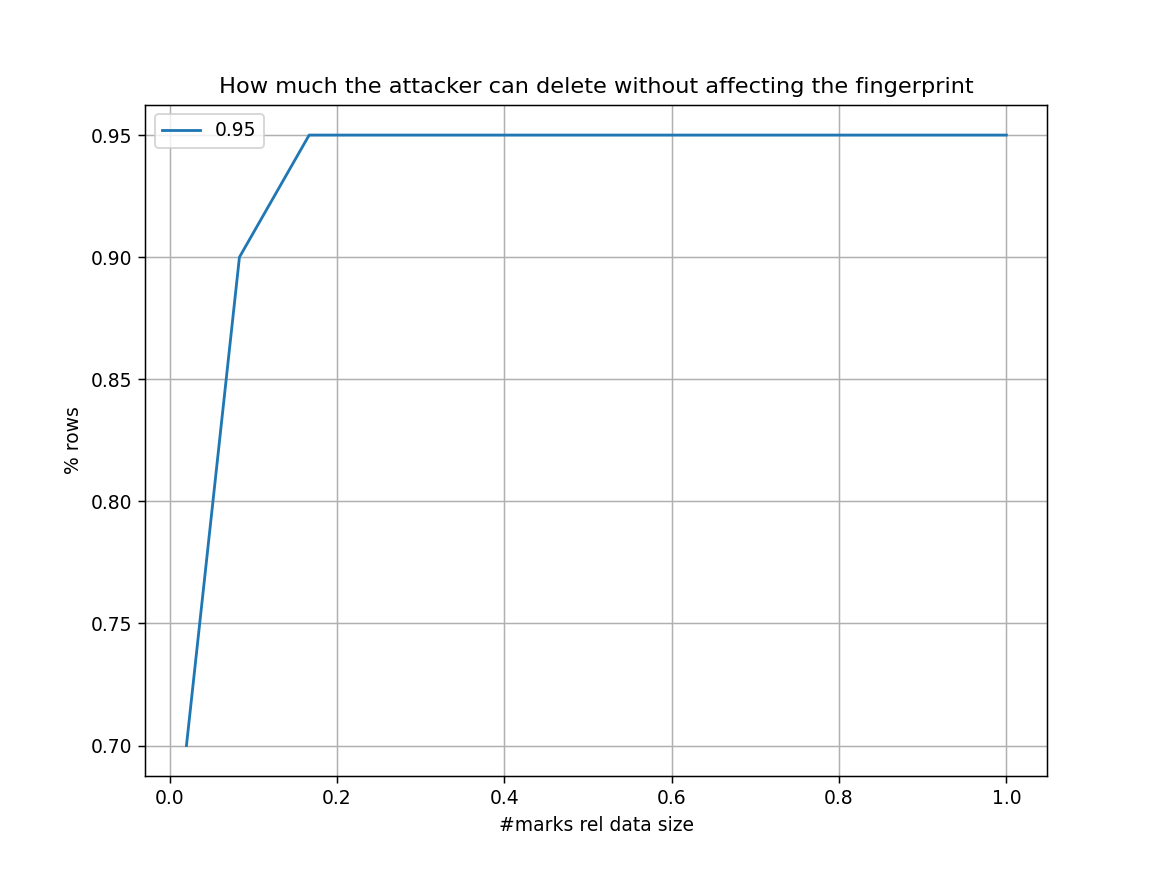

In [29]:
%matplotlib notebook
confidence_rates = [0.95]
attack_granularity = 0.05
n_experiments = 100
for confidence_rate in confidence_rates:
    file_string = 'inverse_robustness_fix_horizontal_universal_c{}_ag{}_e{}.pickle'.format(format(confidence_rate,".2f")[-2:], 
                                                                                       format(attack_granularity,".2f")[-2:], 
                                                                                       n_experiments)
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        resutls = pickle.load(infile)
    plt.plot([1.0/g for g in resutls.keys()], [inv_robustness for inv_robustness in resutls.values()], 
             label= str(format(confidence_rate,".2f")))
plt.title('How much the attacker can delete without affecting the fingerprint')
plt.xlabel('#marks rel data size') 
plt.ylabel('% rows')
plt.legend()
plt.grid()

In [30]:
resutls

{1: 0.95, 2: 0.95, 3: 0.95, 6: 0.95, 12: 0.9, 50: 0.7}

### Vertical subset attack

In [8]:
attack = VerticalSubsetAttack()

In [9]:
robustness_evaluation(attack, data, 'vertical', gammae=[1,2,50], confidence_rate=0.95, target='income', n_experiments=10) 

<IPython.core.display.Javascript object>


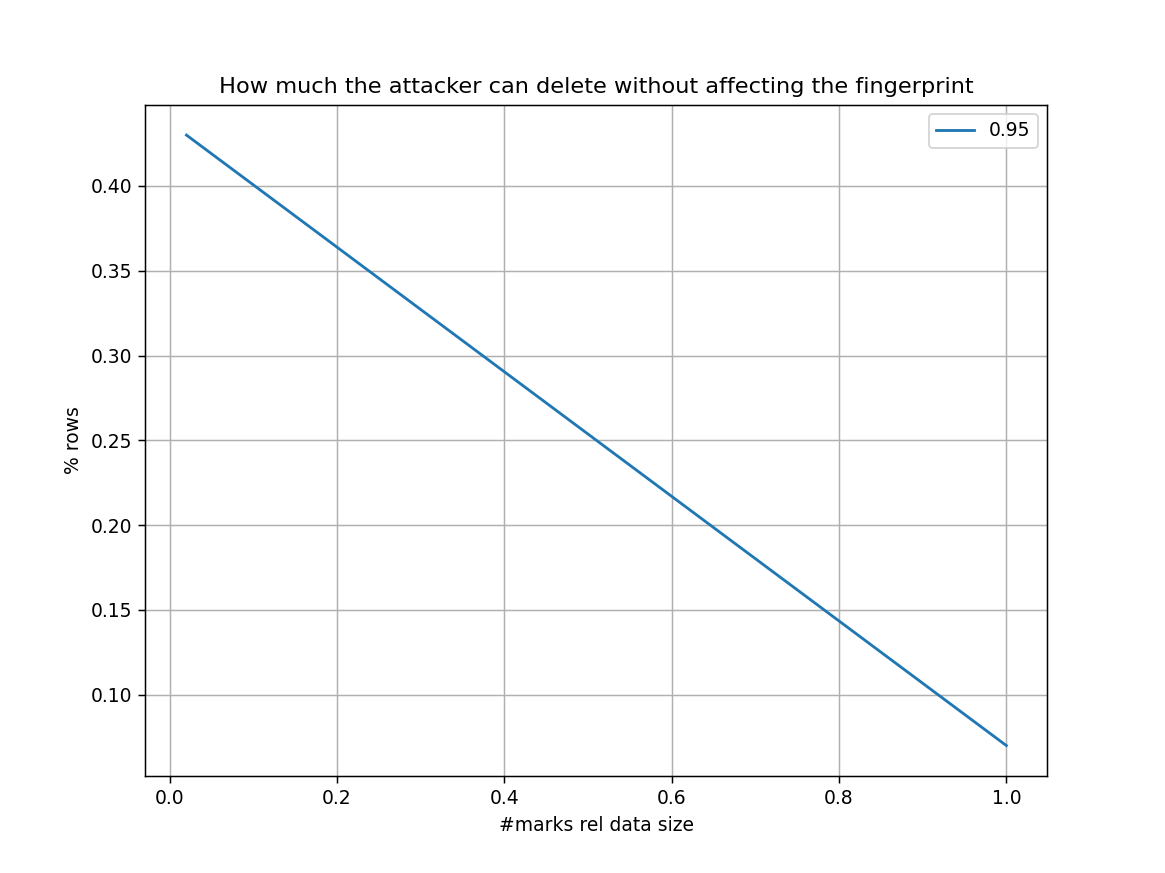

In [10]:
%matplotlib notebook
confidence_rates = [0.95]
n_experiments = 5
for confidence_rate in confidence_rates:
    file_string = 'inverse_robustness_vertical_universal_c{}_e{}.pickle'.format(format(confidence_rate,".2f")[-2:], 
                                                                                       n_experiments)
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        resutls = pickle.load(infile)
    plt.plot([1.0/g for g in resutls.keys()], [1 - inv_robustness for inv_robustness in resutls.values()], 
             label= str(format(confidence_rate,".2f")))
plt.title('How much the attacker can delete without affecting the fingerprint')
plt.xlabel('#marks rel data size') 
plt.ylabel('% rows')
plt.legend()
plt.grid()

In [12]:
resutls

{1: 0.93, 50: 0.57}

## 2. Attack utility decrease

In [15]:
results = {}
attack_granularity = 0.05
n_folds = 5
file_string = 'attack_utility_horizontal_universal_knn_{}_ag{}_nf{}.pickle'.format(target, 
                                                                               format(attack_granularity,".2f")[-2:], 
                                                                                   n_folds)
# check if results exist
# ---------------------- #
if not os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    # returns estimated utility drop for each attack strength
    attack_utility_knn = attack_utility_knn(Adult().preprocessed(), target, attack, attack_granularity=attack_granularity, 
                                            n_folds=n_folds)


    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(attack_utility_knn, outfile)
else:
    print('Results already exist. Not taking any action.')
# ---------------------- #

Results already exist. Not taking any action.


In [71]:
file_string = 'attack_utility_horizontal_universal_knn_{}_ag{}_nf{}.pickle'.format(target, 
                                                                               format(attack_granularity,".2f")[-2:], 
                                                                                   n_folds)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
    attack_utility_knn = pickle.load(infile)
attack_utility_knn = dict(sorted(attack_utility_knn.items()))

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


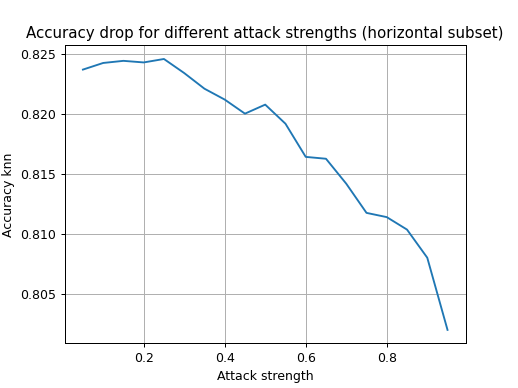

Text(0.5, 1.0, 'Accuracy drop for different attack strengths (horizontal subset)')

In [72]:
%matplotlib
plt.plot(attack_utility_knn.keys(), [np.mean(acc) for acc in attack_utility_knn.values()])
plt.xlabel('Attack strength')
plt.ylabel('Accuracy knn')
plt.title('Accuracy drop for different attack strengths (horizontal subset)')

In [18]:
# original accuracy
file_string = 'utility_knn_{}_nf{}.pickle'.format(target, n_folds)
if not os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    # from how much remaining data can the fingerprint still be extracted?
    original_utility_knn = original_utility_knn(Adult().preprocessed(), target, n_folds=n_folds)

    with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(original_utility_knn, outfile)
else:
    print('Results already exist. Not taking any action.')

Results already exist. Not taking any action.


In [19]:
file_string = 'utility_knn_{}_nf{}.pickle'.format(target, n_folds)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
    original_utility_knn = pickle.load(infile)

In [20]:
#acceptable_utility_drop = 0.01
#utility_preserving_attack_strength = max([strength for strength in attack_utility_knn 
#                                         if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=acceptable_utility_drop])
# alternative
# attacks that yield at least 1% of accuracy loss
#attacks_1p = max([strength for strength in attack_utility_knn 
#                  if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=0.01])
# attacks that yield at least 2% of accuracy loss
#attacks_2p = max([strength for strength in attack_utility_knn 
#                                         if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=0.02])
#
#attacks_3p = max([strength for strength in attack_utility_knn
#                 if np.mean(original_utility_knn)-np.mean(attack_utility_knn[strength])<=0.03])

In [21]:
#max_utility_drop = np.mean(original_utility_knn) - min(np.mean(acc) for acc in attack_utility_knn.values())

In [75]:
# retruns a list [attack_with_1%_loss, attack_with_2%_loss, ... , max_abs_utility_loss]
att_utility_bounds = attack_utility_bounds(original_utility_knn, attack_utility_knn) 

<IPython.core.display.Javascript object>


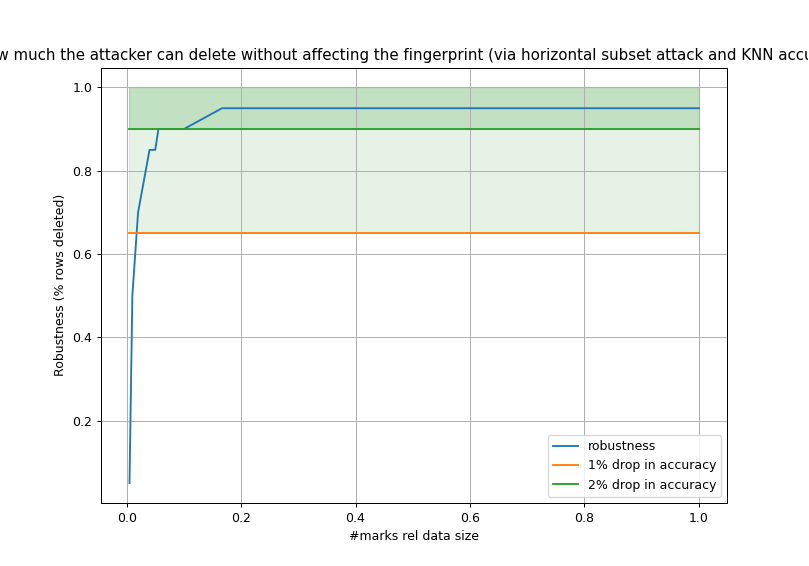

In [76]:
%matplotlib notebook
with open('parameter_guidelines/evaluation/adult/inverse_robustness_horizontal_universal_c95_ag05_e100.pickle', 'rb') as infile:
    resutls = pickle.load(infile)
fig, ax = plt.subplots(figsize=(10, 7))

lines = []
fill = []

lines.append(ax.plot([1.0/g for g in resutls.keys()], [1 - inv_robustness for inv_robustness in resutls.values()], label='robustness'))
lines.append(ax.plot([1.0/g for g in resutls.keys()], [att_utility_bounds[0] for x in resutls], label='1% drop in accuracy'))
fill.append(ax.fill_between([1.0/g for g in resutls.keys()], [att_utility_bounds[0] for x in resutls], 1.0, color='green', alpha=0.1))
lines.append(ax.plot([1.0/g for g in resutls.keys()], [att_utility_bounds[1] for x in resutls], label='2% drop in accuracy'))
fill.append(ax.fill_between([1.0/g for g in resutls.keys()], [att_utility_bounds[1] for x in resutls], 1.0, color='green', alpha=0.15))

plt.title('How much the attacker can delete without affecting the fingerprint (via horizontal subset attack and KNN accuracy)')
plt.xlabel('#marks rel data size') 
plt.ylabel('Robustness (% rows deleted)')

legend = plt.legend()
line_legends = legend.get_lines()
for line in line_legends:
    line.set_picker(True)
    line.set_pickradius(10)
graphs = {}
graphs[line_legends[0]] = [lines[0][0]]
graphs[line_legends[1]] = [lines[1][0], fill[0]]
graphs[line_legends[2]] = [lines[2][0], fill[1]]
   
def on_pick(event):
    legend = event.artist
    isVisible = legend.get_visible()
    for element in graphs[legend]:
        element.set_visible(not isVisible)
    legend.set_visible(not isVisible)
    fig.canvas.draw()
    
plt.connect('pick_event', on_pick)
plt.show()

## 3. Utility after fingerprinting

### 3.1. KNN 

In [86]:
#gammae = [1, 3, 6, 12, 25, 50, 100]
fp_utility_results = {}
n_folds = 5
n_experiments = 10

file_string = 'utility_universal_knn_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)

# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            fp_utility_results = pickle.load(infile)
gammae_new = []
for gamma in gammae:
    if gamma not in fp_utility_results.keys():
        gammae_new.append(gamma)
# ---------------------- #        
# update results
for gamma in gammae_new:
    fp_utility_knn = fingerprint_utility_knn(Adult(), target, gamma, n_folds=n_folds, n_experiments=n_experiments) 
    # [cv_acc_1, cv_acc_2, ..., cv_acc_n_exp]
    fp_utility_results[gamma] = fp_utility_knn
    
fp_utility_results =  dict(sorted(fp_utility_results.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(fp_utility_results, outfile)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


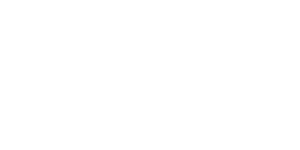

Text(0, 0.5, 'Accuracy knn')

In [87]:
%matplotlib
file_string = 'utility_universal_knn_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        fp_utility_results = pickle.load(infile)
        
x_axis = [1.0/g for g in fp_utility_results.keys()]
y_axis = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results[gamma]]) for gamma in fp_utility_results.keys()]
plt.plot(x_axis, y_axis, label='utility after fingerprint')
plt.title('Utility of fingerprinted data')
plt.xlabel('#marks rel data size')
plt.ylabel('Accuracy knn')

### 3.2. Decision Tree

In [88]:
#gammae = [1, 2, 3, 4, 6, 12, 25, 50, 100]
fp_utility_results_DT = {}
n_folds = 5
n_experiments = 10

file_string = 'utility_universal_dt_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)

# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            fp_utility_results_DT = pickle.load(infile)
    print('Results already exist for gammae: ' + str(fp_utility_results_DT.keys()))
gammae_new = []
for gamma in gammae:
    if gamma not in fp_utility_results_DT.keys():
        gammae_new.append(gamma)
# ---------------------- #        
# update results
for gamma in gammae_new:
    print('Updating results for gamma='+str(gamma))
    fp_utility_dt = fingerprint_utility_dt(Adult(), target, gamma, n_folds=n_folds, n_experiments=n_experiments) 
    # [cv_acc_1, cv_acc_2, ..., cv_acc_n_exp]
    fp_utility_results_DT[gamma] = fp_utility_dt
    
fp_utility_results_DT =  dict(sorted(fp_utility_results_DT.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(fp_utility_results_DT, outfile)

Updating results for gamma=1
Updating results for gamma=2
Updating results for gamma=3
Updating results for gamma=4
Updating results for gamma=5
Updating results for gamma=6
Updating results for gamma=10
Updating results for gamma=12
Updating results for gamma=15
Updating results for gamma=18
Updating results for gamma=20
Updating results for gamma=25
Updating results for gamma=30
Updating results for gamma=50
Updating results for gamma=100
Updating results for gamma=200


<IPython.core.display.Javascript object>


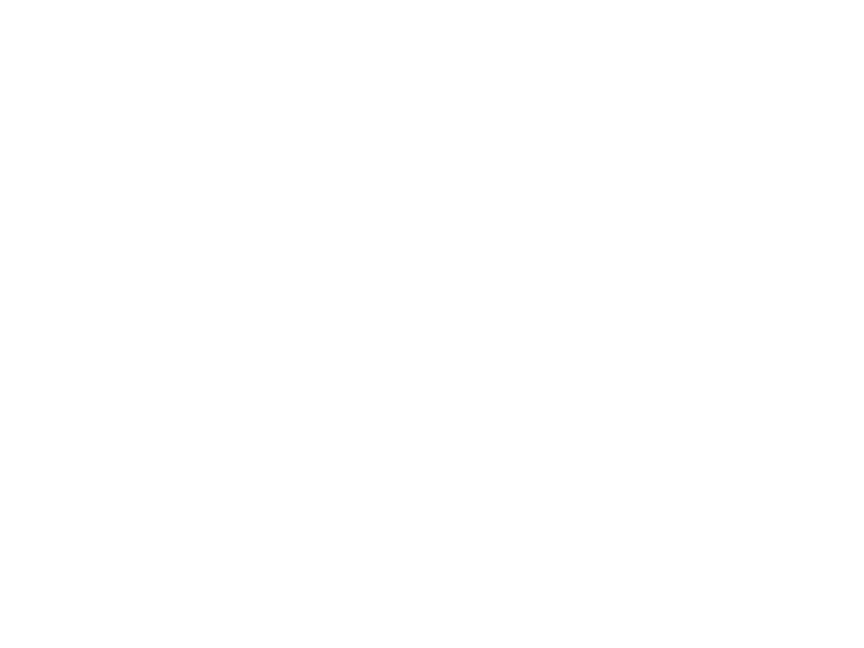

In [89]:
%matplotlib notebook
file_string = 'utility_universal_dt_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        fp_utility_results_DT = pickle.load(infile)
        
x_axis = [1.0/g for g in fp_utility_results_DT.keys()]
y_axis = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_DT[gamma]]) for gamma in fp_utility_results_DT.keys()]
plt.plot(x_axis, y_axis, label='utility after fingerprint')
plt.title('Utility of fingerprinted data')
plt.xlabel('#marks rel data size')
plt.ylabel('Accuracy knn')
plt.show()

### 3.3 Gradient Boosting

In [90]:
#gammae = [1, 2, 3, 4, 6, 12, 25, 50, 100]
fp_utility_results_GB = {}
n_folds = 5
n_experiments = 10

file_string = 'utility_universal_gb_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)

# check if results exist
# ---------------------- #
if os.path.isfile('parameter_guidelines/evaluation/adult/'+file_string):
    with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
            fp_utility_results_GB = pickle.load(infile)
    print('Results already exist for gammae: ' + str(fp_utility_results_GB.keys()))
gammae_new = []
for gamma in gammae:
    if gamma not in fp_utility_results_GB.keys():
        gammae_new.append(gamma)
# ---------------------- #        
# update results
for gamma in gammae_new:
    print('Updating results for gamma='+str(gamma))
    fp_utility_gb = fingerprint_utility_gb(Adult(), target, gamma, n_folds=n_folds, n_experiments=n_experiments) 
    # [cv_acc_1, cv_acc_2, ..., cv_acc_n_exp]
    fp_utility_results_GB[gamma] = fp_utility_gb
    
fp_utility_results_GB =  dict(sorted(fp_utility_results_GB.items()))
with open('parameter_guidelines/evaluation/adult/'+file_string, 'wb') as outfile:
        pickle.dump(fp_utility_results_GB, outfile)

Updating results for gamma=1
Updating results for gamma=2
Updating results for gamma=3
Updating results for gamma=4
Updating results for gamma=5
Updating results for gamma=6
Updating results for gamma=10
Updating results for gamma=12
Updating results for gamma=15
Updating results for gamma=18
Updating results for gamma=20
Updating results for gamma=25
Updating results for gamma=30
Updating results for gamma=50
Updating results for gamma=100
Updating results for gamma=200


<IPython.core.display.Javascript object>


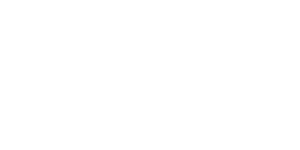

In [91]:
%matplotlib notebook
file_string = 'utility_universal_gb_{}_nf{}_e{}.pickle'.format(target, n_folds, n_experiments)
with open('parameter_guidelines/evaluation/adult/'+file_string, 'rb') as infile:
        fp_utility_results_GB = pickle.load(infile)
        
x_axis = [1.0/g for g in fp_utility_results_GB.keys()]
y_axis = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_GB[gamma]]) for gamma in fp_utility_results_GB.keys()]
plt.plot(x_axis, y_axis, label='utility after fingerprint')
plt.title('Utility of fingerprinted data')
plt.xlabel('#marks rel data size')
plt.ylabel('Accuracy knn')
plt.show()

## COMBINED RESULTS

In [36]:
with open('parameter_guidelines/evaluation/adult/inverse_robustness_horizontal_universal_c95_ag05_e100.pickle', 'rb') as infile:
    resutls = pickle.load(infile)

In [37]:
# interceptions
x_intercept_0 = 1.0/(max([x for x in resutls if 1-resutls[x]>=att_utility_bounds[0]]))
x_intercept_1 = 1.0/(max([x for x in resutls if 1-resutls[x]>=att_utility_bounds[1]]))

<IPython.core.display.Javascript object>


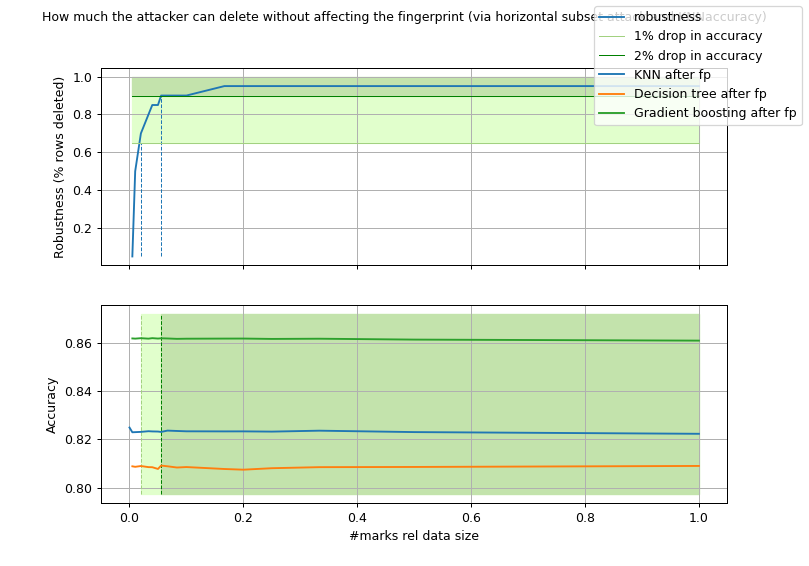

In [98]:
# incorporate in the full analysis
%matplotlib notebook
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 7)) # sharey=True

lines = []
fill = []
helpers = []

x_axis = [1.0/g for g in gammae]

# ---------------------------- #
# robustness
# ---------------------------- #
y_robustness = [1 - inv_robustness for inv_robustness in resutls.values()]
lines.append(ax[0].plot(x_axis, y_robustness, label='robustness'))

# --------------------------- #
# utility (start)
# --------------------------- #
y_utility = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results[g]])
             for g in fp_utility_results.keys()] + [np.mean(original_utility_knn)]
y_utility_DT = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_DT[g]])
                for g in fp_utility_results_DT.keys()]
y_utility_GB = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results_GB[g]])
                for g in fp_utility_results_GB.keys()]
y_utility_all = y_utility + y_utility_DT + y_utility_GB

# --------------------------- #
# attack utility
# --------------------------- #
lw = 0.8
bound_patch = 0.01

lines.append(ax[0].plot(x_axis, [att_utility_bounds[0] for x in resutls], label='1% drop in accuracy', linewidth=lw, 
                        color='#a2d180'))
fill.append(ax[0].fill_between(x_axis, [att_utility_bounds[0] for x in resutls], 1.0, color='#e1ffcc'))
helpers.append(ax[0].vlines(x=x_intercept_0, ymin=min(y_robustness), ymax=att_utility_bounds[0], linewidth=lw, 
                            linestyles='dashed'))
helpers.append(ax[1].vlines(x=x_intercept_0, ymin=min(y_utility_all)-bound_patch, ymax=max(y_utility_all)+bound_patch, 
                            linewidth=lw, linestyles='dashed', color='#a2d180'))
fill.append(ax[1].fill_between([x for x in x_axis if x>=x_intercept_0], min(y_utility_all)-bound_patch,
                               max(y_utility_all)+bound_patch, color='#e1ffcc'))

lines.append(ax[0].plot(x_axis, [att_utility_bounds[1] for x in resutls], label='2% drop in accuracy', linewidth=lw, 
                        color='green'))
fill.append(ax[0].fill_between(x_axis, [att_utility_bounds[1] for x in resutls], 1.0, color='#c3e3ac'))
helpers.append(ax[0].vlines(x=x_intercept_1, ymin=min(y_robustness), ymax=att_utility_bounds[1], linewidth=lw, 
                            linestyles='dashed'))
helpers.append(ax[1].vlines(x=x_intercept_1, ymin=min(y_utility_all)-bound_patch, ymax=max(y_utility_all)+bound_patch, 
                            linewidth=lw, linestyles='dashed', color='green'))
fill.append(ax[1].fill_between([x for x in x_axis if x>=x_intercept_1], min(y_utility_all)-bound_patch,
                               max(y_utility_all)+bound_patch, color='#c3e3ac'))

# todo: mark on the first subplot (ax[0]) when the utility gets way too low; eg. -1%, -2% etc

# ---------------------------- #
# utility
# ---------------------------- #
# KNN
y_utility = [np.mean([np.mean(cv_res) for cv_res in fp_utility_results[g]]) 
                                    for g in fp_utility_results.keys()] + [np.mean(original_utility_knn)]
lines.append(ax[1].plot(x_axis+[0.0], y_utility, label='KNN after fp'))
# Decision Tree
lines.append(ax[1].plot(x_axis, y_utility_DT, label='Decision tree after fp'))
# Gradient Boosting
lines.append(ax[1].plot(x_axis, y_utility_GB, label='Gradient boosting after fp'))
ax[1].set_ylabel('Accuracy')
# ---------------------------- #

fig.suptitle('How much the attacker can delete without affecting the fingerprint (via horizontal subset attack and KNN' + 
             'accuracy)', size=10)
plt.xlabel('#marks rel data size') 
ax[0].set_ylabel('Robustness (% rows deleted)')

plt.rcParams['axes.grid'] = True

legend = fig.legend()
line_legends = legend.get_lines()
for line in line_legends:
    line.set_picker(True)
    line.set_pickradius(10)
graphs = {}
graphs[line_legends[0]] = [lines[0][0]] # -> robustness
graphs[line_legends[1]] = [lines[1][0], fill[0], helpers[0], fill[1], helpers[1]] # -> attack utility 
graphs[line_legends[2]] = [lines[2][0], fill[2], helpers[2], fill[3], helpers[3]]
graphs[line_legends[3]] = [lines[3][0]] # -> utility
graphs[line_legends[4]] = [lines[4][0]]
graphs[line_legends[5]] = [lines[5][0]]

   
def on_pick(event):
    legend = event.artist
    isVisible = legend.get_visible()
    for element in graphs[legend]:
        element.set_visible(not isVisible)
    legend.set_visible(not isVisible)
    fig.canvas.draw()
    
plt.connect('pick_event', on_pick)
plt.show()

Robustness plot (above):
- in the dark green area, the utility of the attacker's data is expected to drop at least 2% for the observed attacks, in addition to the increased robustness for that area. This helps determining the lower boundary on what is considered a robust scheme. Therefore, on the one hand, while choosing the number of marks (x axis), the user can say "if the attacker needs to modify at least 50% of data (i.e. robustness=50%), the scheme is robust", or on the other hand "if the attacker loses more than 2% of accuracy by modifying the data, the scheme is considered robust", or a combination of both. 
- the light green area represents where the utility is expected to drop at least 1% due to the attack strength

Utility plot (below):
- the dark and light green areas are transposed to help find the lower boundary of number of marks that the user wants to chose
- users wants to choose the #marks (x axis) with the highest accuracy
- the idea for the alternative plot regarding utility might be to plot relative delta accuracy (real_acc-original_acc)/original_acc -> for each classifier and cumulative